

## Entrenamientos con distintas configuraciones: número de hidden nodes, regularización y temperatura


In [7]:
import torch
import numpy as np
import torchvision.datasets as datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import h5py
import rbm
import rbmg
from plyer import notification
from scipy.optimize import linear_sum_assignment


In [8]:
Ns = 10000
device = 'cpu'
mnist_trainset = datasets.MNIST('dataset/', train=True, download=True)
D = mnist_trainset.data[:Ns,:,:].reshape(Ns,28*28).float().to(device) / 255.0
D = (D > 0.3) * 1.0
D = D.t()
time = [0,1,2]
for n in range (1,40):
    for m in range (1,40):
        t = 2**n + 2**m
        time.append(t)

time = np.array(list(set(time)))
time = np.sort(time)


In [9]:
n_vis = D.shape[0]
n_hid = 50
dtype = torch.float
batch_size = 50
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 1000
T = 0

filename = 'files/RDM_n50_b50_l01_k10_e2k.h5'
f = h5py.File(filename,'r') #w - escribir


myRBM_RDM = rbm.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

Text(0.5, 1.0, 'SVD Weights $\\to$ epocs=1000, $\\eta$ = 0.01, $N_h$ = 50 gs = 10')

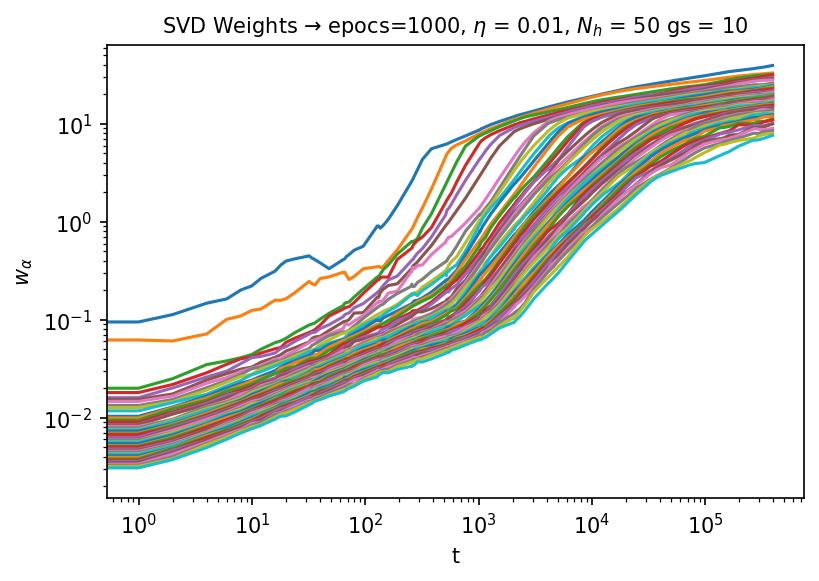

In [12]:
myRBM_RDM.PlotW()
plt.xlabel('t')
plt.ylabel(r'$w_\alpha$')
plt.title(r'SVD Weights $\to$ epocs=1000, $\eta$ = 0.01, $N_h$ = 50 gs = 10',fontsize = 10)

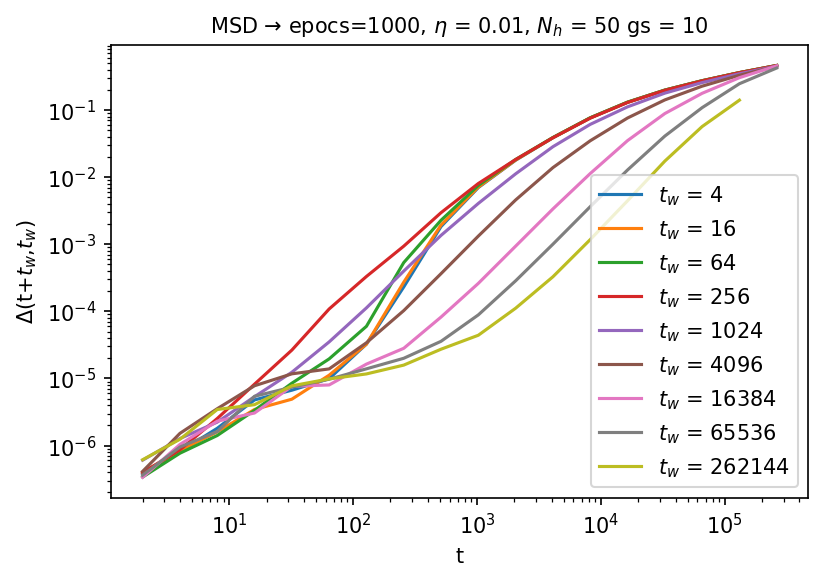

In [21]:
plt.figure(dpi=150)

timew = []
for n in range (1,30):
    tw = 2**(2*n) #para coger un medio de los tw
    timew.append(tw)    
timew = np.array(list(set(timew)))
timew = np.sort(timew)  
Nh = 50
Nv = 784
for ttw in timew:
    alls = []
    epw = int(ttw)
    
    if not(('W'+str(epw)) in f): # check for last time
        break    
            
    W_tw = torch.tensor(f['W'+str(epw)]) 
    W_tw = np.array(W_tw) #W(tw)
    
    alltime = []
    allt = []
            
    for m in range (1,30):
        tt = ttw + 2**m
        alltime.append(tt) 
                
    alltime = np.array(list(set(alltime)))
    alltime = np.sort(alltime)
    
    for t in alltime: #t=t+tw
        ep = int(t) # epoch to which retrieve the RBM

        if not(('W'+str(ep)) in f): # check for last time
            break
        
        Wt = torch.tensor(f['W'+str(ep)]) 
        Wt = np.array(Wt) #W(t+tw)
        
        W = Wt
                
        cc = (W-W_tw)**2

        alls.append(np.sum(cc)/(Nh*Nv))
        allt.append(ep-ttw)
        
    allt = np.array(allt)

    plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
    
plt.legend()
plt.title(r'MSD $\to$ epocs=1000, $\eta$ = 0.01, $N_h$ = 50 gs = 10',fontsize = 10)
plt.xlabel('t')
plt.ylabel('$\Delta$(t+$t_w$,$t_w$)')
plt.show()

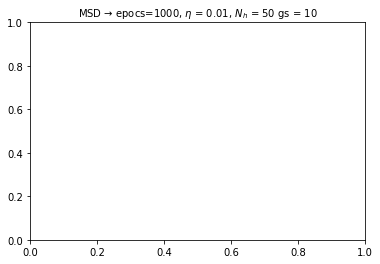

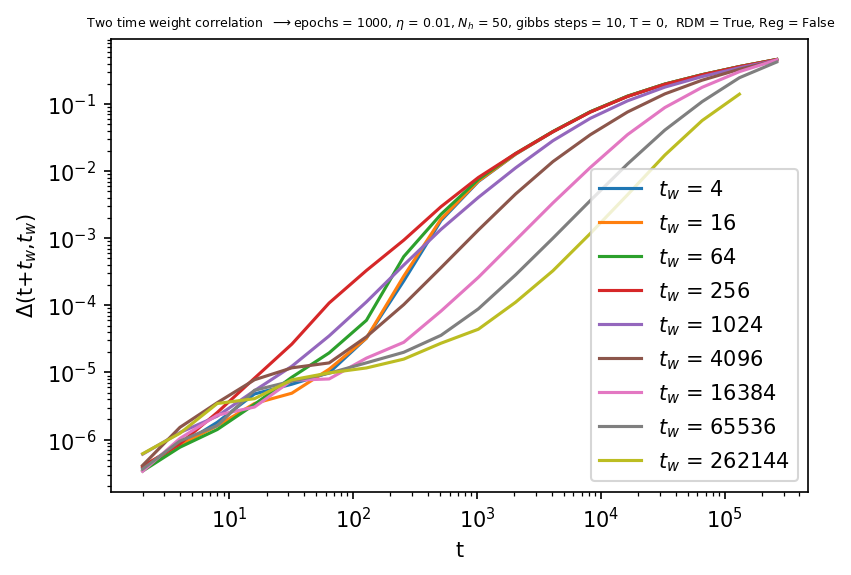

In [17]:
plt.title()
myRBM_RDM.PlotMSDW(False)
plt.show()

In [23]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 50
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 1000
T = 0

filename = 'files/RDM_n800_b50_l01_k10_ek.h5'
f = h5py.File(filename,'w') #w - escribir
f.create_dataset('alltime',data=time)
f.close()

myRBM_RDM = rbm.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

In [24]:
myRBM_RDM.SetVisBias(D)

myRBM_RDM.train(D)

It =  0 loss tensor(36.5457)
It =  1 loss tensor(18.2709)
It =  2 loss tensor(12.1575)
It =  3 loss tensor(9.1249)
It =  4 loss tensor(7.2894)
It =  5 loss tensor(6.0957)
It =  6 loss tensor(5.1968)
It =  7 loss tensor(4.5680)
It =  8 loss tensor(4.0519)
It =  9 loss tensor(3.6448)
It =  10 loss tensor(3.3099)
It =  11 loss tensor(3.0378)
It =  12 loss tensor(2.8200)
It =  13 loss tensor(2.6034)
It =  14 loss tensor(2.4326)
It =  15 loss tensor(2.2798)
It =  16 loss tensor(2.1518)
It =  17 loss tensor(2.0246)
It =  18 loss tensor(1.9195)
It =  19 loss tensor(1.8260)
It =  20 loss tensor(1.7362)
It =  21 loss tensor(1.6604)
It =  22 loss tensor(1.5836)
It =  23 loss tensor(1.5215)
It =  24 loss tensor(1.4584)
It =  25 loss tensor(1.3995)
It =  26 loss tensor(1.3469)
It =  27 loss tensor(1.3001)
It =  28 loss tensor(1.2600)
It =  29 loss tensor(1.2168)
It =  30 loss tensor(1.1769)
It =  31 loss tensor(1.1412)
It =  32 loss tensor(1.1055)
It =  33 loss tensor(1.0728)
It =  34 loss tensor(

It =  277 loss tensor(0.1316)
It =  278 loss tensor(0.1314)
It =  279 loss tensor(0.1309)
It =  280 loss tensor(0.1299)
It =  281 loss tensor(0.1299)
It =  282 loss tensor(0.1293)
It =  283 loss tensor(0.1290)
It =  284 loss tensor(0.1286)
It =  285 loss tensor(0.1277)
It =  286 loss tensor(0.1279)
It =  287 loss tensor(0.1270)
It =  288 loss tensor(0.1268)
It =  289 loss tensor(0.1260)
It =  290 loss tensor(0.1256)
It =  291 loss tensor(0.1250)
It =  292 loss tensor(0.1248)
It =  293 loss tensor(0.1241)
It =  294 loss tensor(0.1237)
It =  295 loss tensor(0.1234)
It =  296 loss tensor(0.1232)
It =  297 loss tensor(0.1225)
It =  298 loss tensor(0.1225)
It =  299 loss tensor(0.1221)
It =  300 loss tensor(0.1214)
It =  301 loss tensor(0.1210)
It =  302 loss tensor(0.1209)
It =  303 loss tensor(0.1207)
It =  304 loss tensor(0.1197)
It =  305 loss tensor(0.1198)
It =  306 loss tensor(0.1191)
It =  307 loss tensor(0.1189)
It =  308 loss tensor(0.1181)
It =  309 loss tensor(0.1178)
It =  310 

It =  551 loss tensor(0.0665)
It =  552 loss tensor(0.0661)
It =  553 loss tensor(0.0662)
It =  554 loss tensor(0.0661)
It =  555 loss tensor(0.0659)
It =  556 loss tensor(0.0658)
It =  557 loss tensor(0.0658)
It =  558 loss tensor(0.0655)
It =  559 loss tensor(0.0656)
It =  560 loss tensor(0.0653)
It =  561 loss tensor(0.0651)
It =  562 loss tensor(0.0648)
It =  563 loss tensor(0.0649)
It =  564 loss tensor(0.0648)
It =  565 loss tensor(0.0647)
It =  566 loss tensor(0.0648)
It =  567 loss tensor(0.0647)
It =  568 loss tensor(0.0645)
It =  569 loss tensor(0.0643)
It =  570 loss tensor(0.0641)
It =  571 loss tensor(0.0639)
It =  572 loss tensor(0.0640)
It =  573 loss tensor(0.0638)
It =  574 loss tensor(0.0637)
It =  575 loss tensor(0.0636)
It =  576 loss tensor(0.0635)
It =  577 loss tensor(0.0635)
It =  578 loss tensor(0.0634)
It =  579 loss tensor(0.0632)
It =  580 loss tensor(0.0631)
It =  581 loss tensor(0.0629)
It =  582 loss tensor(0.0629)
It =  583 loss tensor(0.0626)
It =  584 

It =  825 loss tensor(0.0444)
It =  826 loss tensor(0.0444)
It =  827 loss tensor(0.0443)
It =  828 loss tensor(0.0443)
It =  829 loss tensor(0.0442)
It =  830 loss tensor(0.0442)
It =  831 loss tensor(0.0441)
It =  832 loss tensor(0.0441)
It =  833 loss tensor(0.0439)
It =  834 loss tensor(0.0439)
It =  835 loss tensor(0.0439)
It =  836 loss tensor(0.0438)
It =  837 loss tensor(0.0438)
It =  838 loss tensor(0.0436)
It =  839 loss tensor(0.0436)
It =  840 loss tensor(0.0435)
It =  841 loss tensor(0.0436)
It =  842 loss tensor(0.0435)
It =  843 loss tensor(0.0434)
It =  844 loss tensor(0.0433)
It =  845 loss tensor(0.0435)
It =  846 loss tensor(0.0433)
It =  847 loss tensor(0.0433)
It =  848 loss tensor(0.0430)
It =  849 loss tensor(0.0432)
It =  850 loss tensor(0.0431)
It =  851 loss tensor(0.0430)
It =  852 loss tensor(0.0430)
It =  853 loss tensor(0.0429)
It =  854 loss tensor(0.0430)
It =  855 loss tensor(0.0429)
It =  856 loss tensor(0.0428)
It =  857 loss tensor(0.0428)
It =  858 

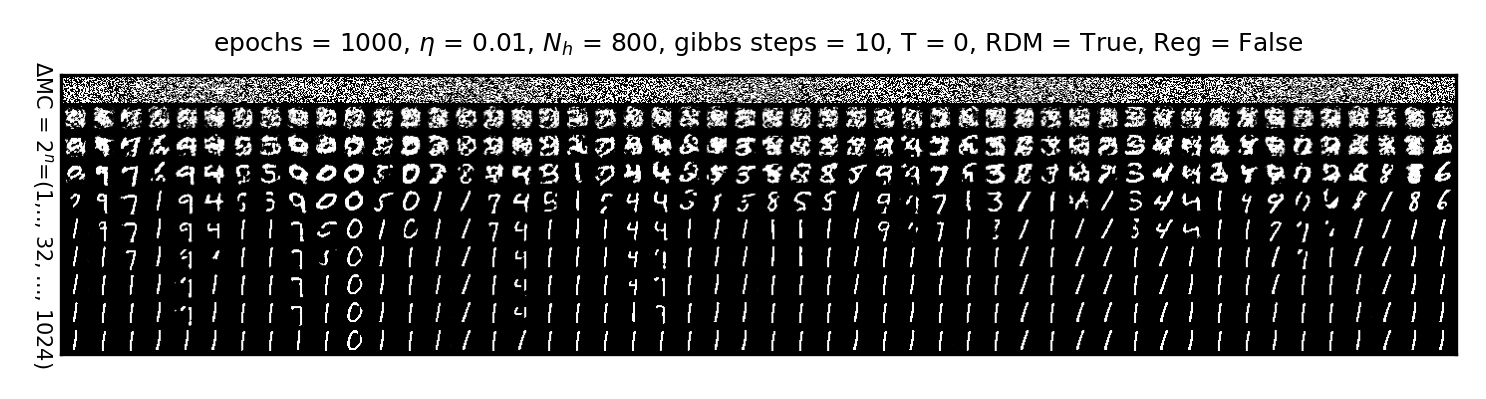

In [25]:
myRBM_RDM.PlotSampling(10)

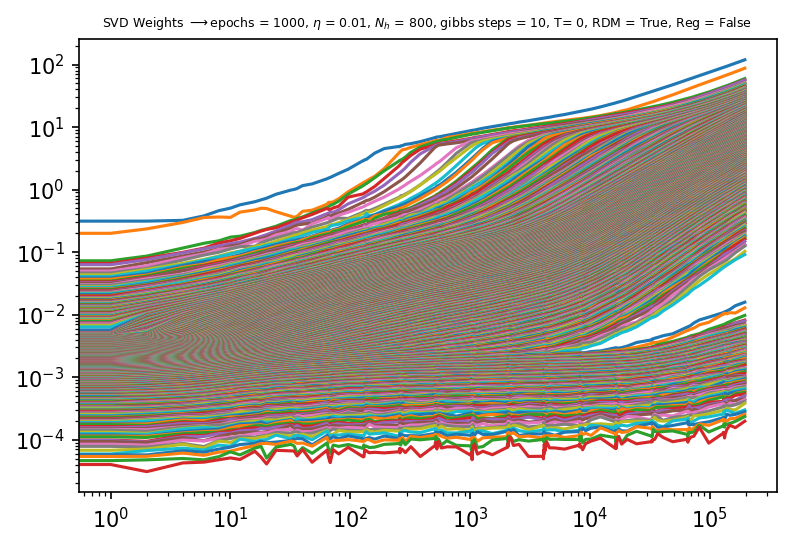

In [26]:
myRBM_RDM.PlotW()

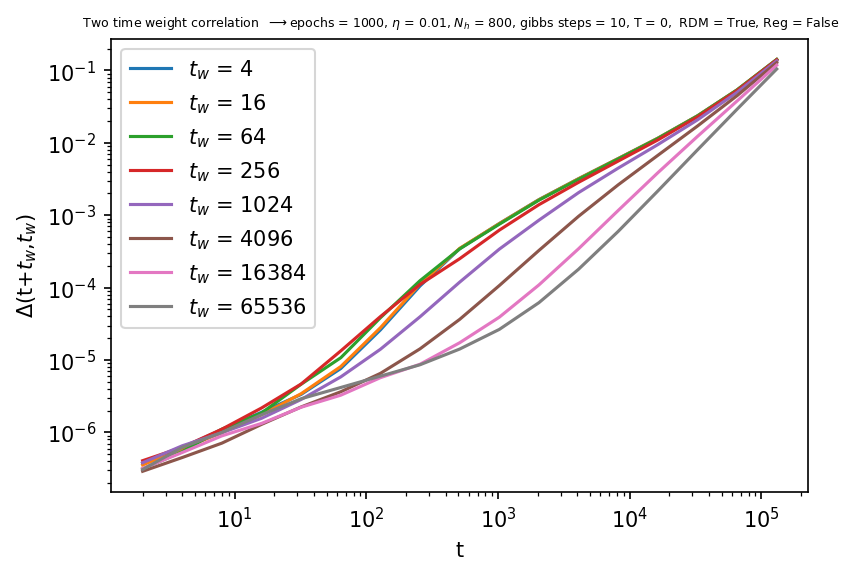

In [27]:
myRBM_RDM.PlotMSDW(False)

- 50 es un tamaño muy pequeño para el batch, vemos si cambia la cosa con 200

In [28]:
time = [0,1,2]
for n in range (1,50):
    for m in range (1,50):
        t = 2**n + 2**m
        time.append(t)

time = np.array(list(set(time)))
time = np.sort(time)

n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 200
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 1000
T = 0

filename = 'files/RDM_n800_b200_l01_k10_ek.h5'
f = h5py.File(filename,'w') #w - escribir
f.create_dataset('alltime',data=time)
f.close()

myRBM_RDM2 = rbm.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

In [29]:
myRBM_RDM2.SetVisBias(D)

myRBM_RDM2.train(D)

It =  0 loss tensor(9.1828)
It =  1 loss tensor(4.5941)
It =  2 loss tensor(3.0642)
It =  3 loss tensor(2.2988)
It =  4 loss tensor(1.8331)
It =  5 loss tensor(1.5293)
It =  6 loss tensor(1.3090)
It =  7 loss tensor(1.1472)
It =  8 loss tensor(1.0234)
It =  9 loss tensor(0.9163)
It =  10 loss tensor(0.8335)
It =  11 loss tensor(0.7631)
It =  12 loss tensor(0.7073)
It =  13 loss tensor(0.6568)
It =  14 loss tensor(0.6139)
It =  15 loss tensor(0.5728)
It =  16 loss tensor(0.5406)
It =  17 loss tensor(0.5091)
It =  18 loss tensor(0.4837)
It =  19 loss tensor(0.4593)
It =  20 loss tensor(0.4358)
It =  21 loss tensor(0.4182)
It =  22 loss tensor(0.3981)
It =  23 loss tensor(0.3836)
It =  24 loss tensor(0.3659)
It =  25 loss tensor(0.3521)
It =  26 loss tensor(0.3403)
It =  27 loss tensor(0.3281)
It =  28 loss tensor(0.3158)
It =  29 loss tensor(0.3059)
It =  30 loss tensor(0.2972)
It =  31 loss tensor(0.2866)
It =  32 loss tensor(0.2785)
It =  33 loss tensor(0.2701)
It =  34 loss tensor(0.2

It =  277 loss tensor(0.0330)
It =  278 loss tensor(0.0330)
It =  279 loss tensor(0.0328)
It =  280 loss tensor(0.0326)
It =  281 loss tensor(0.0326)
It =  282 loss tensor(0.0325)
It =  283 loss tensor(0.0323)
It =  284 loss tensor(0.0322)
It =  285 loss tensor(0.0321)
It =  286 loss tensor(0.0320)
It =  287 loss tensor(0.0318)
It =  288 loss tensor(0.0317)
It =  289 loss tensor(0.0318)
It =  290 loss tensor(0.0316)
It =  291 loss tensor(0.0315)
It =  292 loss tensor(0.0313)
It =  293 loss tensor(0.0313)
It =  294 loss tensor(0.0312)
It =  295 loss tensor(0.0310)
It =  296 loss tensor(0.0309)
It =  297 loss tensor(0.0308)
It =  298 loss tensor(0.0306)
It =  299 loss tensor(0.0305)
It =  300 loss tensor(0.0306)
It =  301 loss tensor(0.0304)
It =  302 loss tensor(0.0303)
It =  303 loss tensor(0.0302)
It =  304 loss tensor(0.0301)
It =  305 loss tensor(0.0301)
It =  306 loss tensor(0.0299)
It =  307 loss tensor(0.0299)
It =  308 loss tensor(0.0297)
It =  309 loss tensor(0.0296)
It =  310 

It =  551 loss tensor(0.0166)
It =  552 loss tensor(0.0166)
It =  553 loss tensor(0.0166)
It =  554 loss tensor(0.0165)
It =  555 loss tensor(0.0165)
It =  556 loss tensor(0.0164)
It =  557 loss tensor(0.0165)
It =  558 loss tensor(0.0164)
It =  559 loss tensor(0.0164)
It =  560 loss tensor(0.0164)
It =  561 loss tensor(0.0164)
It =  562 loss tensor(0.0163)
It =  563 loss tensor(0.0163)
It =  564 loss tensor(0.0163)
It =  565 loss tensor(0.0162)
It =  566 loss tensor(0.0162)
It =  567 loss tensor(0.0162)
It =  568 loss tensor(0.0162)
It =  569 loss tensor(0.0161)
It =  570 loss tensor(0.0161)
It =  571 loss tensor(0.0161)
It =  572 loss tensor(0.0160)
It =  573 loss tensor(0.0160)
It =  574 loss tensor(0.0160)
It =  575 loss tensor(0.0159)
It =  576 loss tensor(0.0159)
It =  577 loss tensor(0.0159)
It =  578 loss tensor(0.0159)
It =  579 loss tensor(0.0159)
It =  580 loss tensor(0.0158)
It =  581 loss tensor(0.0158)
It =  582 loss tensor(0.0158)
It =  583 loss tensor(0.0157)
It =  584 

It =  825 loss tensor(0.0111)
It =  826 loss tensor(0.0111)
It =  827 loss tensor(0.0111)
It =  828 loss tensor(0.0111)
It =  829 loss tensor(0.0111)
It =  830 loss tensor(0.0110)
It =  831 loss tensor(0.0110)
It =  832 loss tensor(0.0110)
It =  833 loss tensor(0.0110)
It =  834 loss tensor(0.0110)
It =  835 loss tensor(0.0110)
It =  836 loss tensor(0.0109)
It =  837 loss tensor(0.0110)
It =  838 loss tensor(0.0109)
It =  839 loss tensor(0.0110)
It =  840 loss tensor(0.0110)
It =  841 loss tensor(0.0109)
It =  842 loss tensor(0.0109)
It =  843 loss tensor(0.0109)
It =  844 loss tensor(0.0109)
It =  845 loss tensor(0.0109)
It =  846 loss tensor(0.0109)
It =  847 loss tensor(0.0108)
It =  848 loss tensor(0.0108)
It =  849 loss tensor(0.0108)
It =  850 loss tensor(0.0108)
It =  851 loss tensor(0.0108)
It =  852 loss tensor(0.0108)
It =  853 loss tensor(0.0108)
It =  854 loss tensor(0.0107)
It =  855 loss tensor(0.0107)
It =  856 loss tensor(0.0107)
It =  857 loss tensor(0.0107)
It =  858 

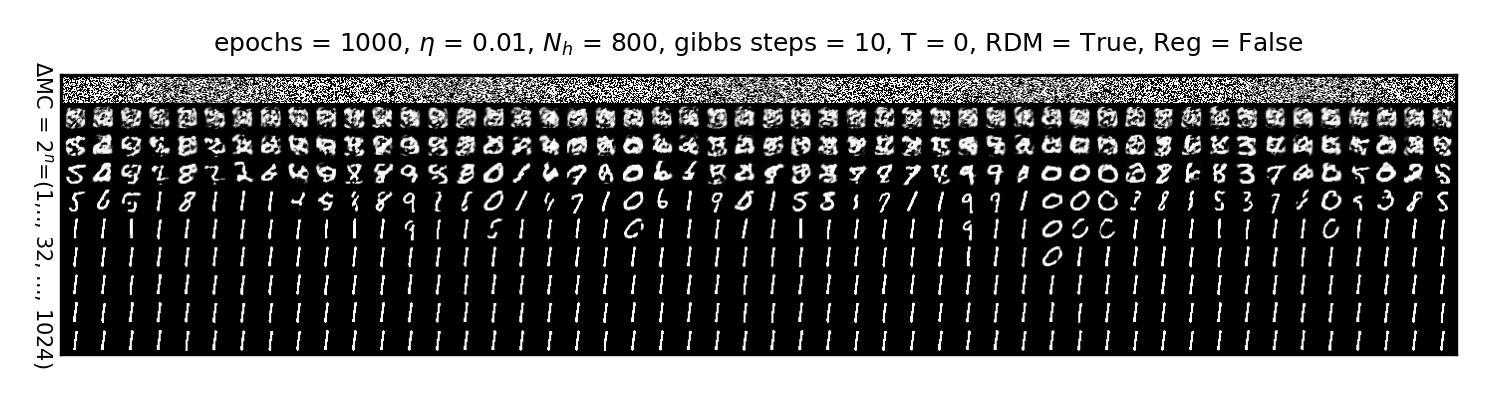

In [30]:
myRBM_RDM2.PlotSampling(10)

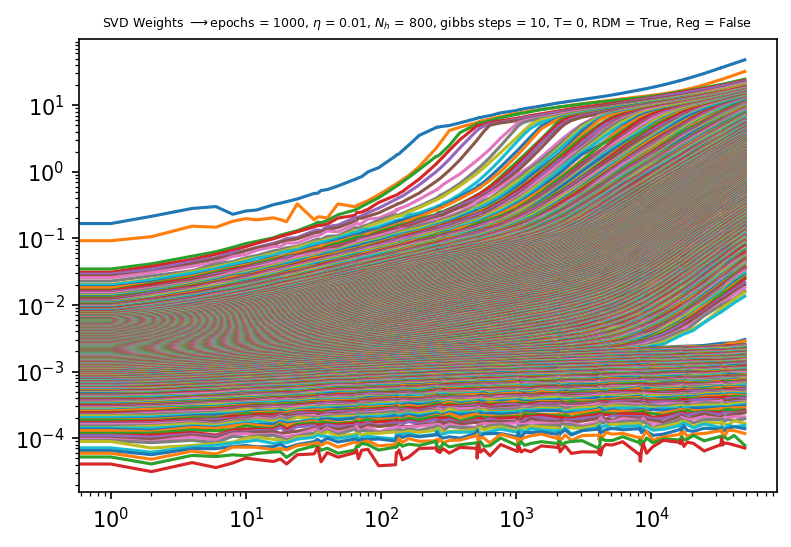

In [31]:
myRBM_RDM2.PlotW()

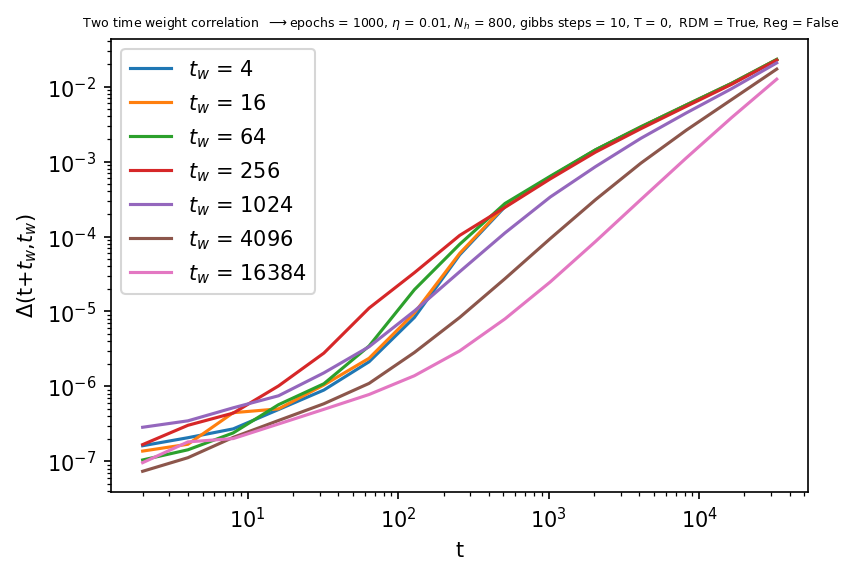

In [32]:
myRBM_RDM2.PlotMSDW(False)

- Parece que cuanto más grande sea hd y cuanto mas grande sea el tamaño del batch, menos puntos temporales tenemos. ¿Por que?

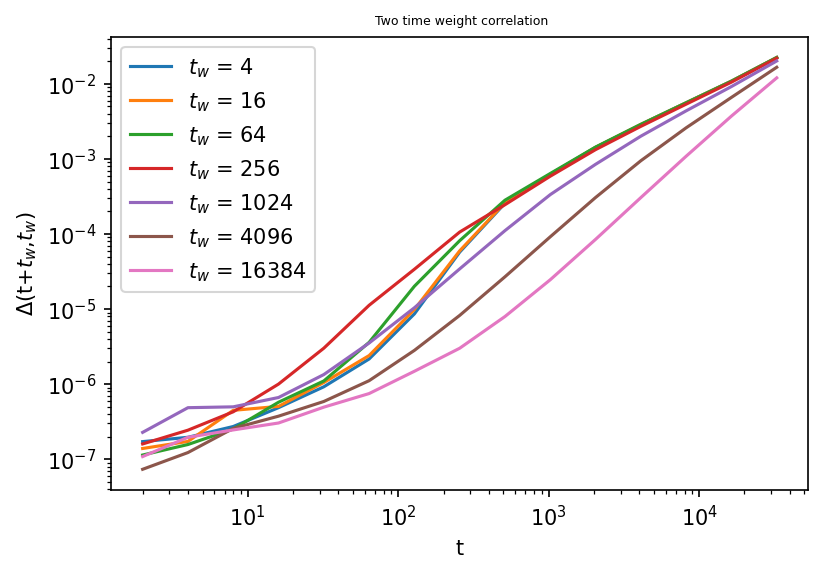

In [20]:
plt.figure(dpi=150)
filename = 'files/RDM_n800_b200_l01_k10_ek.h5'

f = h5py.File(filename,'r')
Nh=800
Nv=784
timew = []
for n in range (1,30):
    tw = 2**(2*n) #para coger un medio de los tw
    timew.append(tw)    
    
timew = np.array(list(set(timew)))
timew = np.sort(timew)  

for ttw in timew:
    alls = []
    epw = int(ttw)
    
    if not(('W'+str(epw)) in f): # check for last time
        break    
            
    W_tw = torch.tensor(f['W'+str(epw)]) 
    W_tw = np.array(W_tw) #W(tw)
    
    alltime = []
    allt = []
            
    for m in range (1,30):
        tt = ttw + 2**m
        alltime.append(tt) 
                
    alltime = np.array(list(set(alltime)))
    alltime = np.sort(alltime)
    
    for t in alltime: #t=t+tw
        ep = int(t) # epoch to which retrieve the RBM

        if not(('W'+str(ep)) in f): # check for last time
            break
        
        Wt = torch.tensor(f['W'+str(ep)]) 
        Wt = np.array(Wt) #W(t+tw)
        W = Wt
 
        cc = (W-W_tw)**2

        alls.append(np.sum(cc)/(Nh*Nv))
        allt.append(ep-ttw)
        
    allt = np.array(allt)

    plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
    
plt.legend()
plt.title(' Two time weight correlation', fontsize = 6)
plt.xlabel('t')
plt.ylabel('$\Delta$(t+$t_w$,$t_w$)')
plt.show()

## 24 de Enero
**Mejora de algunos trainings**

In [33]:
Ns = 10000
device = 'cpu'
mnist_trainset = datasets.MNIST('dataset/', train=True, download=True)
D = mnist_trainset.data[:Ns,:,:].reshape(Ns,28*28).float().to(device) / 255.0
D = (D > 0.3) * 1.0
D = D.t()
time = [0,1,2]
for n in range (1,30):
    for m in range (1,30):
        t = 2**n + 2**m
        time.append(t)

time = np.array(list(set(time)))
time = np.sort(time)


- training con 800 hidden y regularización L2

In [34]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 50
rdm = True
regu = True
lr = 0.01
gibbs_steps = 10
epoch_max = 1000
T = 0

filename = 'files/RDMr_n800_b50_l01_k10_ek.h5'
f = h5py.File(filename,'w') #w - escribir
f.create_dataset('alltime',data=time)
f.close()

myRBM_RDMr = rbm.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

In [35]:
myRBM_RDMr.SetVisBias(D)

myRBM_RDMr.train(D)

It =  0 loss tensor(36.5536)
It =  1 loss tensor(18.2871)
It =  2 loss tensor(12.1505)
It =  3 loss tensor(9.1076)
It =  4 loss tensor(7.2988)
It =  5 loss tensor(6.0708)
It =  6 loss tensor(5.1931)
It =  7 loss tensor(4.5578)
It =  8 loss tensor(4.0515)
It =  9 loss tensor(3.6418)
It =  10 loss tensor(3.3136)
It =  11 loss tensor(3.0334)
It =  12 loss tensor(2.7997)
It =  13 loss tensor(2.6012)
It =  14 loss tensor(2.4280)
It =  15 loss tensor(2.2779)
It =  16 loss tensor(2.1415)
It =  17 loss tensor(2.0269)
It =  18 loss tensor(1.9210)
It =  19 loss tensor(1.8220)
It =  20 loss tensor(1.7366)
It =  21 loss tensor(1.6564)
It =  22 loss tensor(1.5834)
It =  23 loss tensor(1.5194)
It =  24 loss tensor(1.4571)
It =  25 loss tensor(1.4025)
It =  26 loss tensor(1.3508)
It =  27 loss tensor(1.3027)
It =  28 loss tensor(1.2558)
It =  29 loss tensor(1.2174)
It =  30 loss tensor(1.1750)
It =  31 loss tensor(1.1369)
It =  32 loss tensor(1.1043)
It =  33 loss tensor(1.0722)
It =  34 loss tensor(

It =  277 loss tensor(0.1311)
It =  278 loss tensor(0.1306)
It =  279 loss tensor(0.1302)
It =  280 loss tensor(0.1300)
It =  281 loss tensor(0.1290)
It =  282 loss tensor(0.1287)
It =  283 loss tensor(0.1282)
It =  284 loss tensor(0.1281)
It =  285 loss tensor(0.1276)
It =  286 loss tensor(0.1270)
It =  287 loss tensor(0.1266)
It =  288 loss tensor(0.1264)
It =  289 loss tensor(0.1257)
It =  290 loss tensor(0.1252)
It =  291 loss tensor(0.1250)
It =  292 loss tensor(0.1247)
It =  293 loss tensor(0.1237)
It =  294 loss tensor(0.1239)
It =  295 loss tensor(0.1233)
It =  296 loss tensor(0.1228)
It =  297 loss tensor(0.1226)
It =  298 loss tensor(0.1219)
It =  299 loss tensor(0.1216)
It =  300 loss tensor(0.1213)
It =  301 loss tensor(0.1208)
It =  302 loss tensor(0.1204)
It =  303 loss tensor(0.1198)
It =  304 loss tensor(0.1195)
It =  305 loss tensor(0.1191)
It =  306 loss tensor(0.1184)
It =  307 loss tensor(0.1184)
It =  308 loss tensor(0.1181)
It =  309 loss tensor(0.1176)
It =  310 

It =  551 loss tensor(0.0661)
It =  552 loss tensor(0.0660)
It =  553 loss tensor(0.0659)
It =  554 loss tensor(0.0657)
It =  555 loss tensor(0.0656)
It =  556 loss tensor(0.0655)
It =  557 loss tensor(0.0653)
It =  558 loss tensor(0.0652)
It =  559 loss tensor(0.0652)
It =  560 loss tensor(0.0651)
It =  561 loss tensor(0.0650)
It =  562 loss tensor(0.0649)
It =  563 loss tensor(0.0646)
It =  564 loss tensor(0.0644)
It =  565 loss tensor(0.0645)
It =  566 loss tensor(0.0644)
It =  567 loss tensor(0.0642)
It =  568 loss tensor(0.0641)
It =  569 loss tensor(0.0639)
It =  570 loss tensor(0.0638)
It =  571 loss tensor(0.0637)
It =  572 loss tensor(0.0637)
It =  573 loss tensor(0.0635)
It =  574 loss tensor(0.0633)
It =  575 loss tensor(0.0634)
It =  576 loss tensor(0.0632)
It =  577 loss tensor(0.0631)
It =  578 loss tensor(0.0630)
It =  579 loss tensor(0.0629)
It =  580 loss tensor(0.0628)
It =  581 loss tensor(0.0626)
It =  582 loss tensor(0.0625)
It =  583 loss tensor(0.0624)
It =  584 

It =  825 loss tensor(0.0442)
It =  826 loss tensor(0.0441)
It =  827 loss tensor(0.0441)
It =  828 loss tensor(0.0440)
It =  829 loss tensor(0.0439)
It =  830 loss tensor(0.0438)
It =  831 loss tensor(0.0439)
It =  832 loss tensor(0.0437)
It =  833 loss tensor(0.0438)
It =  834 loss tensor(0.0437)
It =  835 loss tensor(0.0436)
It =  836 loss tensor(0.0436)
It =  837 loss tensor(0.0435)
It =  838 loss tensor(0.0435)
It =  839 loss tensor(0.0435)
It =  840 loss tensor(0.0433)
It =  841 loss tensor(0.0433)
It =  842 loss tensor(0.0433)
It =  843 loss tensor(0.0432)
It =  844 loss tensor(0.0431)
It =  845 loss tensor(0.0431)
It =  846 loss tensor(0.0431)
It =  847 loss tensor(0.0430)
It =  848 loss tensor(0.0430)
It =  849 loss tensor(0.0429)
It =  850 loss tensor(0.0429)
It =  851 loss tensor(0.0427)
It =  852 loss tensor(0.0428)
It =  853 loss tensor(0.0428)
It =  854 loss tensor(0.0426)
It =  855 loss tensor(0.0426)
It =  856 loss tensor(0.0426)
It =  857 loss tensor(0.0425)
It =  858 

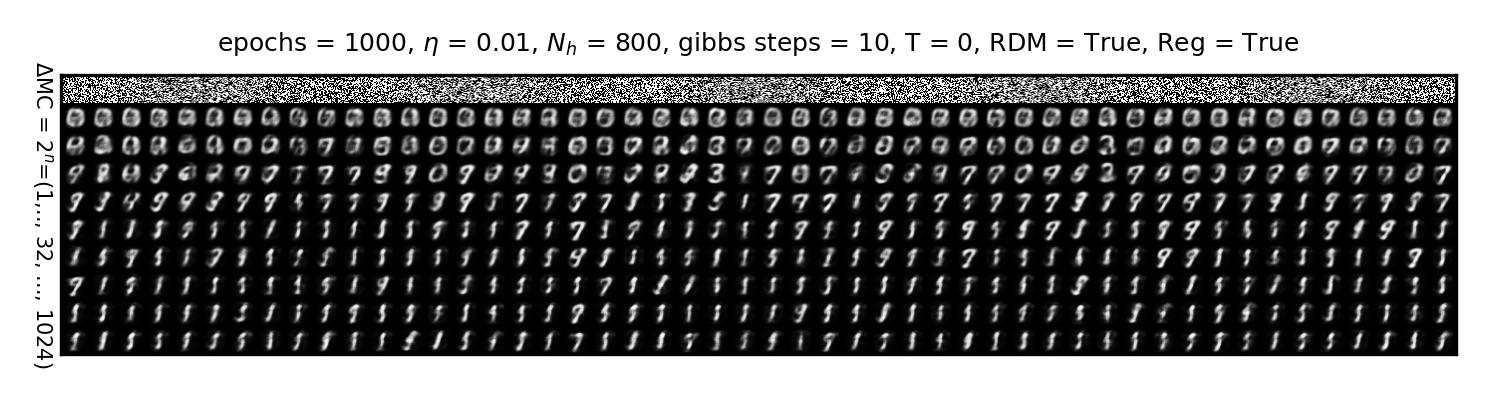

In [36]:
myRBM_RDMr.PlotSampling(10)

- training con 800 hidden y temperatura

In [37]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 50
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 1000
T = 0.1

filename = 'files/RDM_n800_b50_l01_k10_ek_T01.h5'
f = h5py.File(filename,'w') #w - escribir
f.create_dataset('alltime',data=time)
f.close()

RDM_T01 = rbm.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

In [38]:
RDM_T01.SetVisBias(D)

RDM_T01.train(D)

It =  0 loss tensor(42.6763)
It =  1 loss tensor(21.1105)
It =  2 loss tensor(13.9587)
It =  3 loss tensor(10.3619)
It =  4 loss tensor(8.2320)
It =  5 loss tensor(6.8509)
It =  6 loss tensor(5.8155)
It =  7 loss tensor(5.0423)
It =  8 loss tensor(4.4748)
It =  9 loss tensor(4.0084)
It =  10 loss tensor(3.6515)
It =  11 loss tensor(3.3547)
It =  12 loss tensor(3.1061)
It =  13 loss tensor(2.8535)
It =  14 loss tensor(2.6583)
It =  15 loss tensor(2.4953)
It =  16 loss tensor(2.3450)
It =  17 loss tensor(2.2103)
It =  18 loss tensor(2.0965)
It =  19 loss tensor(1.9818)
It =  20 loss tensor(1.8774)
It =  21 loss tensor(1.7942)
It =  22 loss tensor(1.7117)
It =  23 loss tensor(1.6439)
It =  24 loss tensor(1.5722)
It =  25 loss tensor(1.5120)
It =  26 loss tensor(1.4603)
It =  27 loss tensor(1.4084)
It =  28 loss tensor(1.3540)
It =  29 loss tensor(1.3017)
It =  30 loss tensor(1.2558)
It =  31 loss tensor(1.2185)
It =  32 loss tensor(1.1827)
It =  33 loss tensor(1.1504)
It =  34 loss tensor

It =  277 loss tensor(0.1359)
It =  278 loss tensor(0.1356)
It =  279 loss tensor(0.1351)
It =  280 loss tensor(0.1346)
It =  281 loss tensor(0.1334)
It =  282 loss tensor(0.1336)
It =  283 loss tensor(0.1328)
It =  284 loss tensor(0.1323)
It =  285 loss tensor(0.1319)
It =  286 loss tensor(0.1318)
It =  287 loss tensor(0.1312)
It =  288 loss tensor(0.1307)
It =  289 loss tensor(0.1303)
It =  290 loss tensor(0.1297)
It =  291 loss tensor(0.1292)
It =  292 loss tensor(0.1288)
It =  293 loss tensor(0.1289)
It =  294 loss tensor(0.1278)
It =  295 loss tensor(0.1276)
It =  296 loss tensor(0.1276)
It =  297 loss tensor(0.1264)
It =  298 loss tensor(0.1258)
It =  299 loss tensor(0.1256)
It =  300 loss tensor(0.1253)
It =  301 loss tensor(0.1249)
It =  302 loss tensor(0.1245)
It =  303 loss tensor(0.1246)
It =  304 loss tensor(0.1244)
It =  305 loss tensor(0.1237)
It =  306 loss tensor(0.1234)
It =  307 loss tensor(0.1221)
It =  308 loss tensor(0.1217)
It =  309 loss tensor(0.1216)
It =  310 

It =  551 loss tensor(0.0676)
It =  552 loss tensor(0.0676)
It =  553 loss tensor(0.0679)
It =  554 loss tensor(0.0677)
It =  555 loss tensor(0.0674)
It =  556 loss tensor(0.0674)
It =  557 loss tensor(0.0674)
It =  558 loss tensor(0.0673)
It =  559 loss tensor(0.0670)
It =  560 loss tensor(0.0670)
It =  561 loss tensor(0.0666)
It =  562 loss tensor(0.0663)
It =  563 loss tensor(0.0665)
It =  564 loss tensor(0.0662)
It =  565 loss tensor(0.0664)
It =  566 loss tensor(0.0663)
It =  567 loss tensor(0.0663)
It =  568 loss tensor(0.0661)
It =  569 loss tensor(0.0658)
It =  570 loss tensor(0.0656)
It =  571 loss tensor(0.0656)
It =  572 loss tensor(0.0656)
It =  573 loss tensor(0.0655)
It =  574 loss tensor(0.0650)
It =  575 loss tensor(0.0651)
It =  576 loss tensor(0.0648)
It =  577 loss tensor(0.0651)
It =  578 loss tensor(0.0646)
It =  579 loss tensor(0.0646)
It =  580 loss tensor(0.0644)
It =  581 loss tensor(0.0643)
It =  582 loss tensor(0.0641)
It =  583 loss tensor(0.0640)
It =  584 

It =  825 loss tensor(0.0452)
It =  826 loss tensor(0.0454)
It =  827 loss tensor(0.0452)
It =  828 loss tensor(0.0451)
It =  829 loss tensor(0.0450)
It =  830 loss tensor(0.0450)
It =  831 loss tensor(0.0450)
It =  832 loss tensor(0.0451)
It =  833 loss tensor(0.0451)
It =  834 loss tensor(0.0449)
It =  835 loss tensor(0.0449)
It =  836 loss tensor(0.0446)
It =  837 loss tensor(0.0446)
It =  838 loss tensor(0.0447)
It =  839 loss tensor(0.0446)
It =  840 loss tensor(0.0446)
It =  841 loss tensor(0.0446)
It =  842 loss tensor(0.0444)
It =  843 loss tensor(0.0444)
It =  844 loss tensor(0.0442)
It =  845 loss tensor(0.0442)
It =  846 loss tensor(0.0443)
It =  847 loss tensor(0.0442)
It =  848 loss tensor(0.0441)
It =  849 loss tensor(0.0441)
It =  850 loss tensor(0.0441)
It =  851 loss tensor(0.0440)
It =  852 loss tensor(0.0439)
It =  853 loss tensor(0.0438)
It =  854 loss tensor(0.0438)
It =  855 loss tensor(0.0437)
It =  856 loss tensor(0.0436)
It =  857 loss tensor(0.0435)
It =  858 

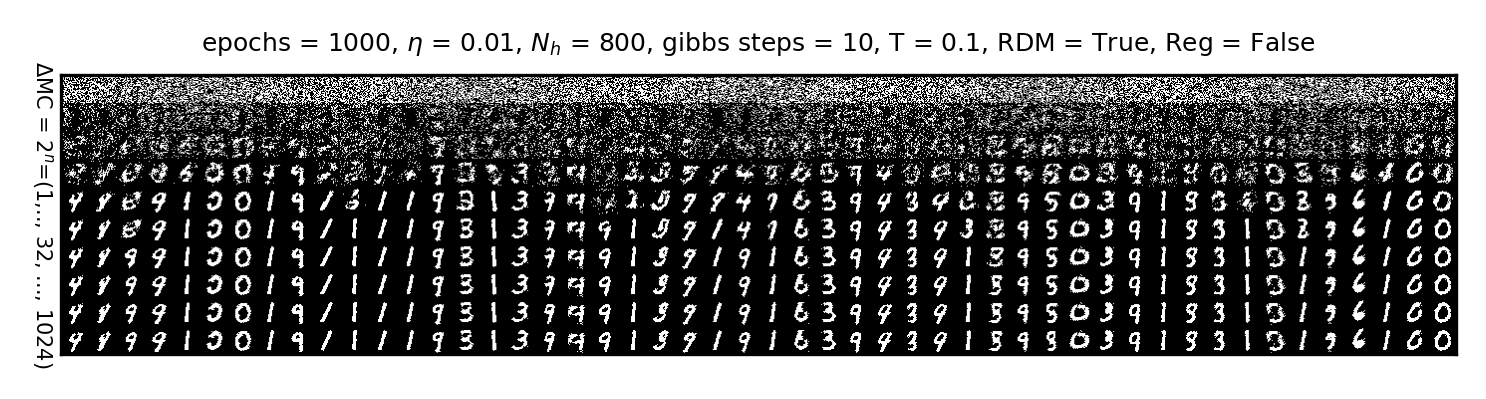

In [39]:
RDM_T01.PlotSampling(10)

- Para la temperatura si es muy importante tener un número grande de nodos ocultos - correl de largo alcance
- Ya decíamos que temperatura (ruido) no impide a la máquina aprender, pero evidentemente si se cogen minibatches muy pequeños la combinación de ruido por temperatura + ruido estocástico puede ser demasiado
- Veamos si el sampling mejora metiéndole un mb más grande

In [40]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 200
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 1000
T = 0.1

filename = 'files/RDM_n800_b200_l01_k10_ek_T01.h5'
f = h5py.File(filename,'w') #w - escribir
f.create_dataset('alltime',data=time)
f.close()

RDM_T01b = rbm.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

In [41]:
RDM_T01b.SetVisBias(D)

RDM_T01b.train(D)

It =  0 loss tensor(10.5060)
It =  1 loss tensor(5.3897)
It =  2 loss tensor(3.5640)
It =  3 loss tensor(2.6842)
It =  4 loss tensor(2.1148)
It =  5 loss tensor(1.7760)
It =  6 loss tensor(1.5090)
It =  7 loss tensor(1.3152)
It =  8 loss tensor(1.1697)
It =  9 loss tensor(1.0483)
It =  10 loss tensor(0.9543)
It =  11 loss tensor(0.8719)
It =  12 loss tensor(0.8012)
It =  13 loss tensor(0.7406)
It =  14 loss tensor(0.6918)
It =  15 loss tensor(0.6474)
It =  16 loss tensor(0.6050)
It =  17 loss tensor(0.5732)
It =  18 loss tensor(0.5426)
It =  19 loss tensor(0.5133)
It =  20 loss tensor(0.4907)
It =  21 loss tensor(0.4671)
It =  22 loss tensor(0.4447)
It =  23 loss tensor(0.4253)
It =  24 loss tensor(0.4084)
It =  25 loss tensor(0.3934)
It =  26 loss tensor(0.3782)
It =  27 loss tensor(0.3655)
It =  28 loss tensor(0.3515)
It =  29 loss tensor(0.3388)
It =  30 loss tensor(0.3270)
It =  31 loss tensor(0.3163)
It =  32 loss tensor(0.3078)
It =  33 loss tensor(0.2988)
It =  34 loss tensor(0.

It =  277 loss tensor(0.0348)
It =  278 loss tensor(0.0348)
It =  279 loss tensor(0.0345)
It =  280 loss tensor(0.0345)
It =  281 loss tensor(0.0343)
It =  282 loss tensor(0.0344)
It =  283 loss tensor(0.0341)
It =  284 loss tensor(0.0340)
It =  285 loss tensor(0.0339)
It =  286 loss tensor(0.0338)
It =  287 loss tensor(0.0334)
It =  288 loss tensor(0.0333)
It =  289 loss tensor(0.0332)
It =  290 loss tensor(0.0331)
It =  291 loss tensor(0.0330)
It =  292 loss tensor(0.0329)
It =  293 loss tensor(0.0328)
It =  294 loss tensor(0.0327)
It =  295 loss tensor(0.0324)
It =  296 loss tensor(0.0324)
It =  297 loss tensor(0.0323)
It =  298 loss tensor(0.0323)
It =  299 loss tensor(0.0321)
It =  300 loss tensor(0.0319)
It =  301 loss tensor(0.0319)
It =  302 loss tensor(0.0319)
It =  303 loss tensor(0.0317)
It =  304 loss tensor(0.0315)
It =  305 loss tensor(0.0314)
It =  306 loss tensor(0.0312)
It =  307 loss tensor(0.0311)
It =  308 loss tensor(0.0312)
It =  309 loss tensor(0.0310)
It =  310 

It =  551 loss tensor(0.0174)
It =  552 loss tensor(0.0173)
It =  553 loss tensor(0.0174)
It =  554 loss tensor(0.0174)
It =  555 loss tensor(0.0173)
It =  556 loss tensor(0.0173)
It =  557 loss tensor(0.0173)
It =  558 loss tensor(0.0173)
It =  559 loss tensor(0.0172)
It =  560 loss tensor(0.0171)
It =  561 loss tensor(0.0171)
It =  562 loss tensor(0.0171)
It =  563 loss tensor(0.0171)
It =  564 loss tensor(0.0170)
It =  565 loss tensor(0.0171)
It =  566 loss tensor(0.0170)
It =  567 loss tensor(0.0169)
It =  568 loss tensor(0.0169)
It =  569 loss tensor(0.0169)
It =  570 loss tensor(0.0168)
It =  571 loss tensor(0.0168)
It =  572 loss tensor(0.0168)
It =  573 loss tensor(0.0168)
It =  574 loss tensor(0.0168)
It =  575 loss tensor(0.0166)
It =  576 loss tensor(0.0166)
It =  577 loss tensor(0.0166)
It =  578 loss tensor(0.0165)
It =  579 loss tensor(0.0166)
It =  580 loss tensor(0.0165)
It =  581 loss tensor(0.0165)
It =  582 loss tensor(0.0165)
It =  583 loss tensor(0.0164)
It =  584 

It =  825 loss tensor(0.0115)
It =  826 loss tensor(0.0115)
It =  827 loss tensor(0.0115)
It =  828 loss tensor(0.0114)
It =  829 loss tensor(0.0114)
It =  830 loss tensor(0.0114)
It =  831 loss tensor(0.0115)
It =  832 loss tensor(0.0114)
It =  833 loss tensor(0.0114)
It =  834 loss tensor(0.0114)
It =  835 loss tensor(0.0114)
It =  836 loss tensor(0.0113)
It =  837 loss tensor(0.0114)
It =  838 loss tensor(0.0113)
It =  839 loss tensor(0.0113)
It =  840 loss tensor(0.0113)
It =  841 loss tensor(0.0113)
It =  842 loss tensor(0.0113)
It =  843 loss tensor(0.0113)
It =  844 loss tensor(0.0113)
It =  845 loss tensor(0.0113)
It =  846 loss tensor(0.0112)
It =  847 loss tensor(0.0112)
It =  848 loss tensor(0.0112)
It =  849 loss tensor(0.0112)
It =  850 loss tensor(0.0112)
It =  851 loss tensor(0.0111)
It =  852 loss tensor(0.0111)
It =  853 loss tensor(0.0111)
It =  854 loss tensor(0.0111)
It =  855 loss tensor(0.0111)
It =  856 loss tensor(0.0111)
It =  857 loss tensor(0.0111)
It =  858 

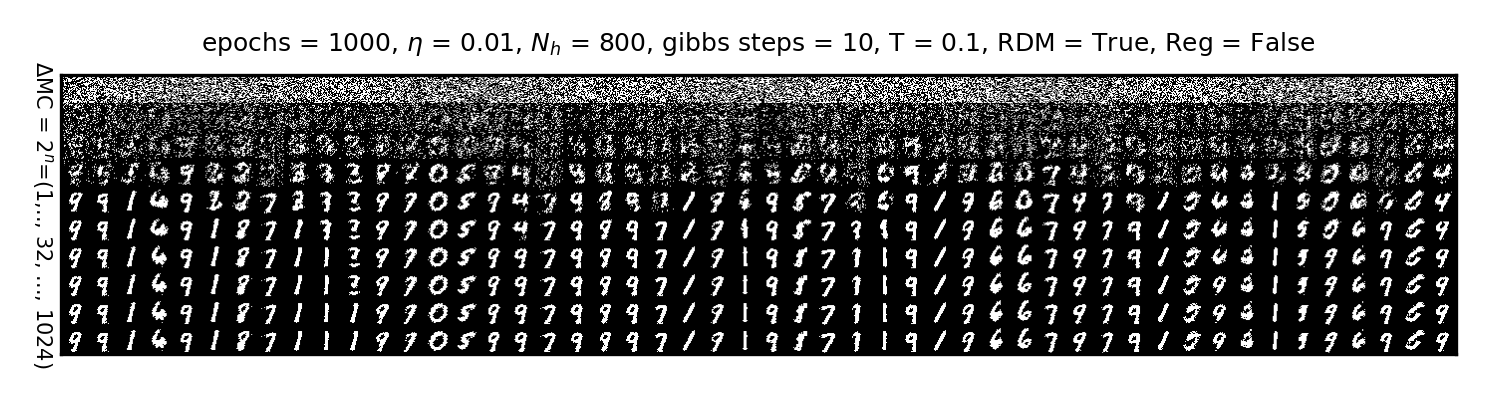

In [42]:
RDM_T01b.PlotSampling(10)

- Tampoco demasiado. Estudiemos con el primero el MSD, los pesos etc

In [81]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 50
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 1000
T = 0.1

filename = 'files/RDM_n800_b50_l01_k10_ek_T01.h5'
RDM_T01 = rbm.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

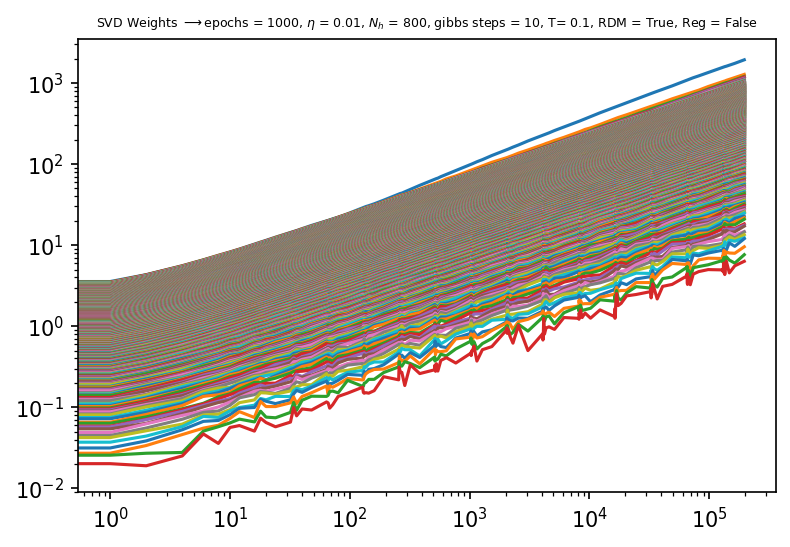

In [82]:
RDM_T01.PlotW()

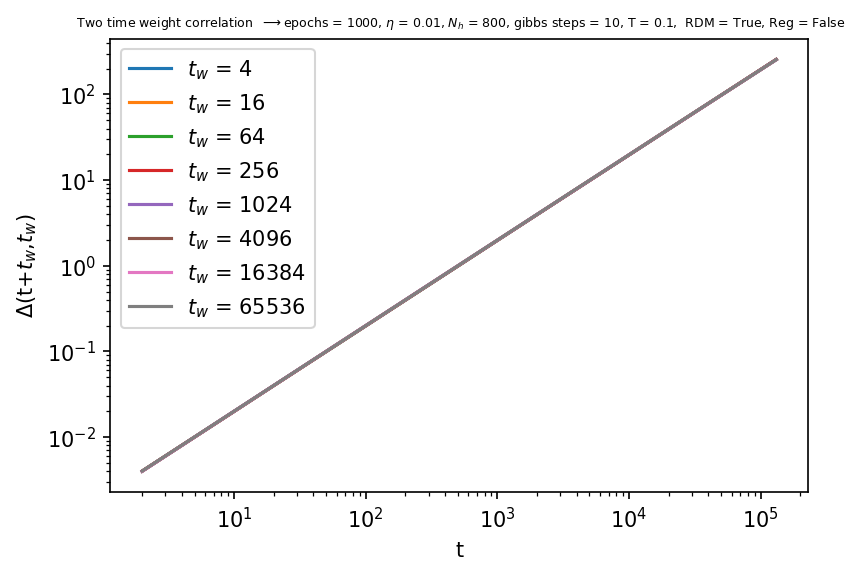

In [84]:
RDM_T01.PlotMSDW(False)

# permutación de features
- empezamos comprobando que lo hace bien para el dataset
- recordemos que la manera en que están organizados el dataset y los pesos es diferente! Permutamos el tensor del dataset por ello

In [2]:
def PermMatrix(W1,W2): 
    #parto de W1 y W2 - tensores tamaño (j,784)
    # ''recuperar W1 a partir de W2''
        W1 = np.array(W1)
        W2 = np.array(W2)
        C_ab = np.sum((W1[:, np.newaxis, :] - W2[np.newaxis, :, :]) ** 2, axis=2)
        row,col = linear_sum_assignment(C_ab)
        	
        M = W2[col,:] #ordeno 2 para parecerse a 1
        return torch.tensor(M)
    
def transf(X):
    #para hacer el imshow
    tile_X = []
    nrow=X.size()[0]
    sx=28
    sy=28
    ch=1
    ncol=1
    R = []
    for c in range(nrow):
        L = torch.cat((tuple(X[i,:].reshape(sx,sy) for i in np.arange(c*ncol,(c+1)*ncol))))
        tile_X.append(L)
    R.append(torch.cat(tile_X,1))
    AllIm0=torch.cat(tuple(R))
    
    return AllIm0


In [110]:
X1 = D[:,4:15]

num_columnas = X1.shape[1]

columnas_permutadas = np.random.permutation(num_columnas)
X2 = X1[:, columnas_permutadas, ...]


X1 = torch.transpose(X1,0,1)
X2 = torch.transpose(X2,0,1)

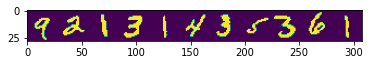

torch.Size([11, 784])
torch.Size([28, 308])


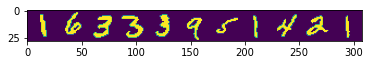

torch.Size([11, 784])


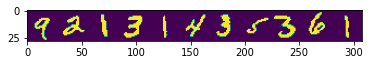

In [111]:

A = transf(X1)
plt.imshow(A)
plt.show()

print(X1.shape)
print(A.shape)

B = transf(X2)
plt.imshow(B)
plt.show()

X3 = PermMatrix(X1,X2)
print(X3.shape)
C = transf(X3)
plt.imshow(C)
plt.show()


- Hace lo que queremos, pero hay que tener cuidado en todo momento del tipo de dato que estamos tratando!!
- Cargamos los pesos de una máquina para ver si los permuta guay

In [3]:
filename = 'files/RDM_n50_b50_l01_k10_e2k.h5'
f = h5py.File(filename,'r')

alltime = np.sort(f['alltime'])
alls = []
allt = []
        
for t in alltime:
    ep = int(t) # epoch to which retrieve the RBM
            
    if not(('W'+str(ep)) in f): # check for last time
        break
        
    W = torch.tensor(f['W'+str(ep)])    
            

/tmp/ipykernel_5996/3728405565.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  W = torch.tensor(f['W'+str(ep)])


- Permutamos unos pocos pesos:

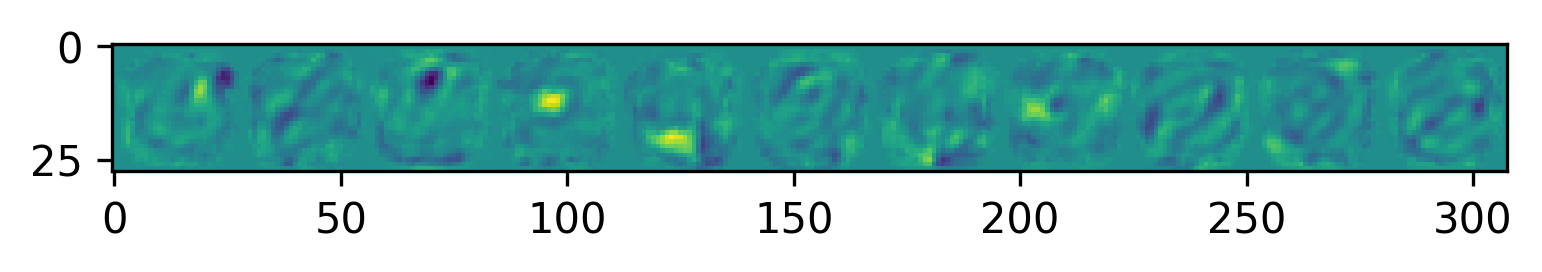

torch.Size([11, 784])
torch.Size([28, 308])


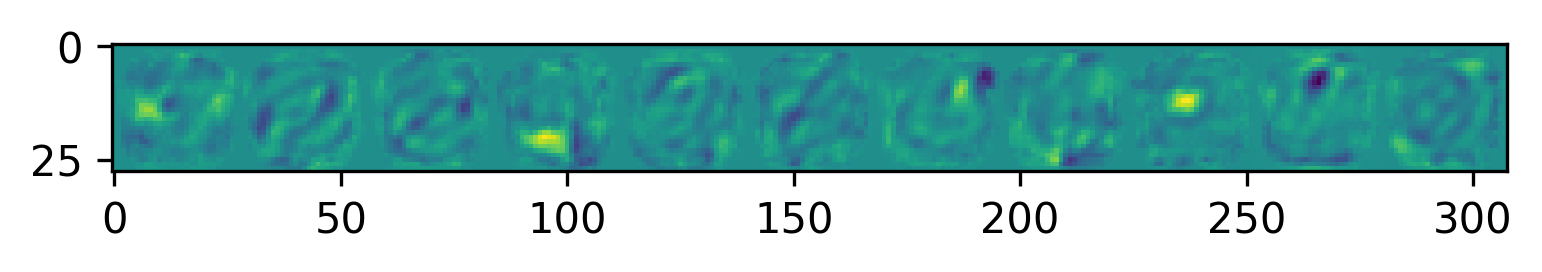

torch.Size([11, 784])


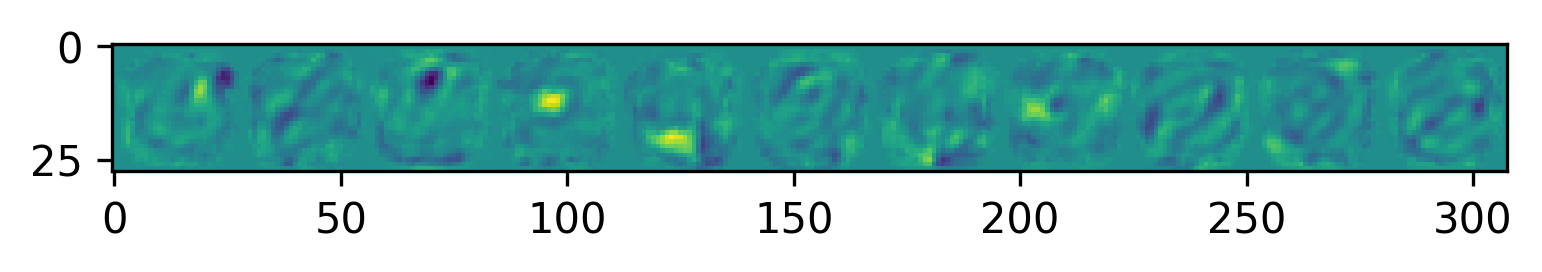

In [4]:
X1 = W[10:21,:] #cogemos solo algunos para verlo bien

num = X1.shape[0]


permutadas = np.random.permutation(num)
X2 = X1[permutadas, :, ...]

plt.figure(dpi=300)

A = transf(X1)
plt.imshow(A)
plt.show()

print(X1.shape)
print(A.shape)


plt.figure(dpi=300)
B = transf(X2)
plt.imshow(B)
plt.show()


plt.figure(dpi=300)
X3 = PermMatrix(X1,X2)
print(X3.shape)
C = transf(X3)
plt.imshow(C)
plt.show()


- Permutamos todos y mostramos solo algunos para ver que se están recolocando adecuadamente:

Matrices 1:


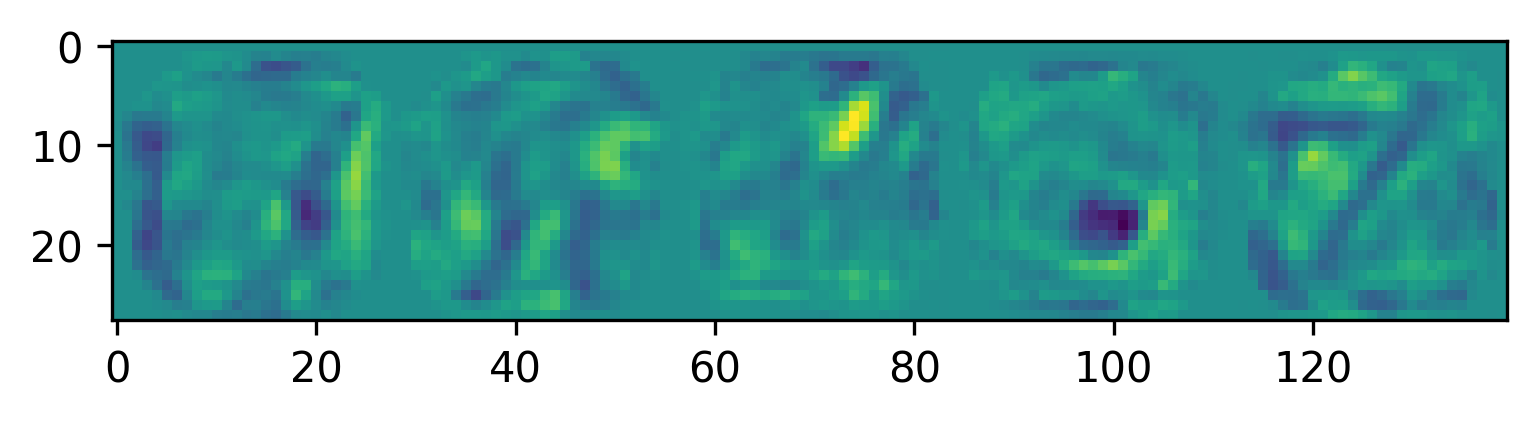

Matrices 2:


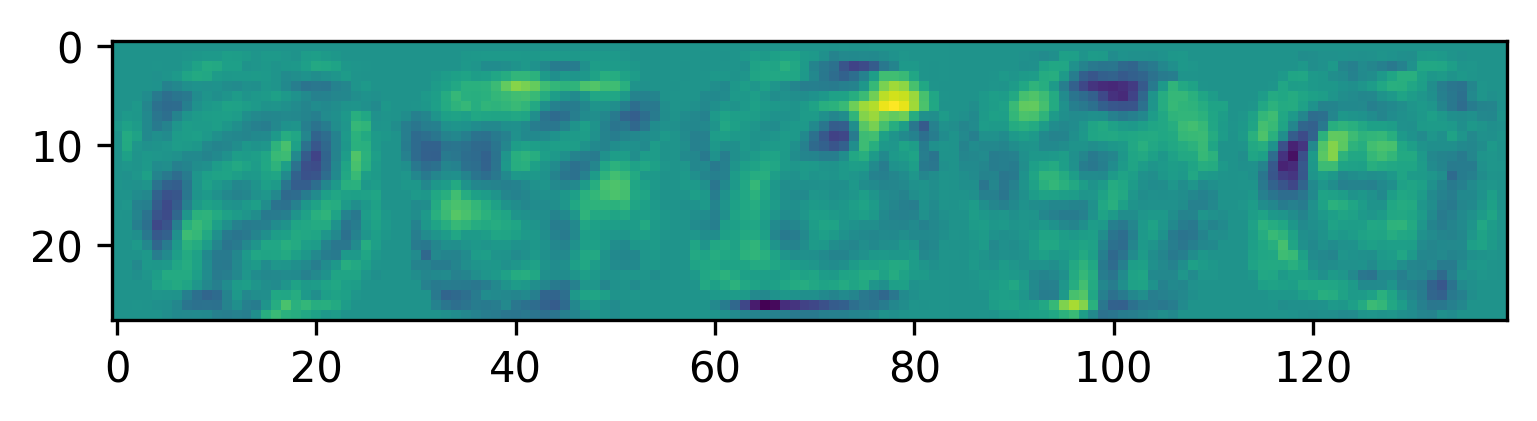

Matrices 2 permutadas para parecerse a 1:


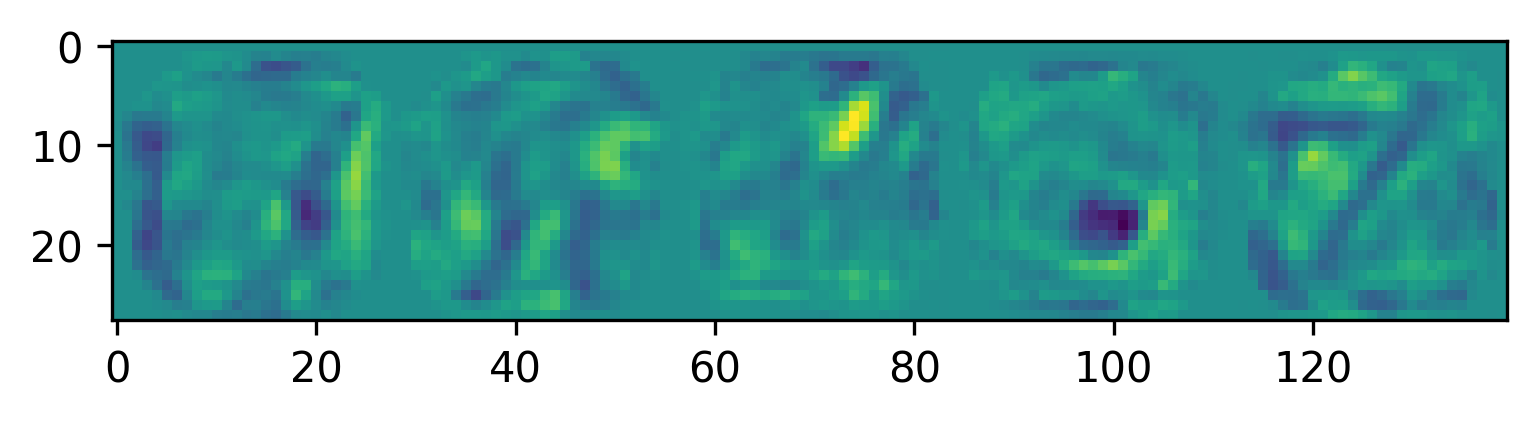

In [7]:
X1 = W #cogemos todos pero vemos solo algunos

num = X1.shape[0]


permutadas = np.random.permutation(num)
X2 = X1[permutadas, :, ...]


X3 = PermMatrix(X1,X2)


plt.figure(dpi=300)

print('Matrices 1:')
A = transf(X1[2:7,:])
plt.imshow(A)
plt.show()


print('Matrices 2:')
plt.figure(dpi=300)
B = transf(X2[2:7,:])
plt.imshow(B)
plt.show()

print('Matrices 2 permutadas para parecerse a 1:')
plt.figure(dpi=300)
C = transf(X3[2:7,:])
plt.imshow(C)
plt.show()

- Hagámoslo ahora dentro del propio calculo del MSD
- Hay que tener cuidado de meter los datos correctamente en todo momento.
- Ahora no son permutaciones exactas (las matrices de W1 y W2 no son las mismas)

In [7]:
n_vis = D.shape[0]
n_hid = 50
dtype = torch.float
batch_size = 50
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 2000
T = 0

filename = 'files/RDM_n50_b50_l01_k10_e2k.h5'
f = h5py.File(filename,'r')

myRBM_RDM = rbm.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

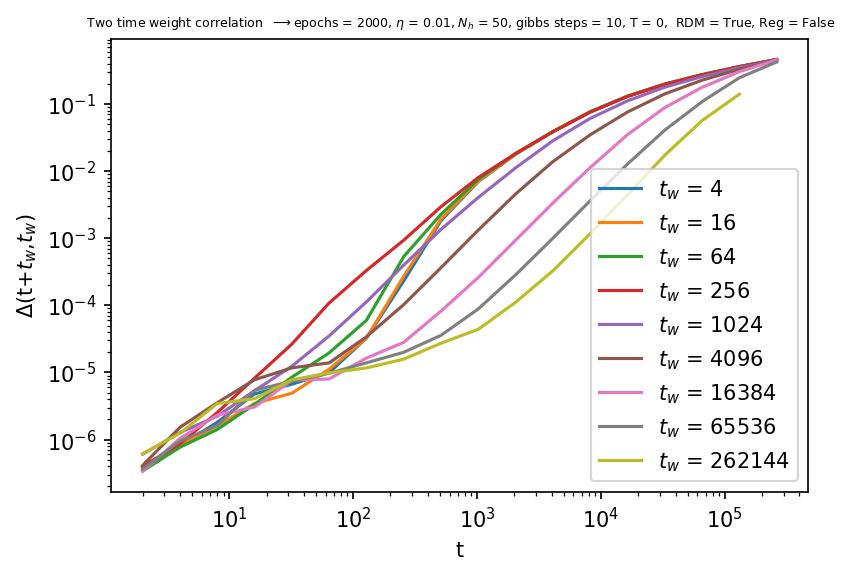

In [8]:
myRBM_RDM.PlotMSDW(False)

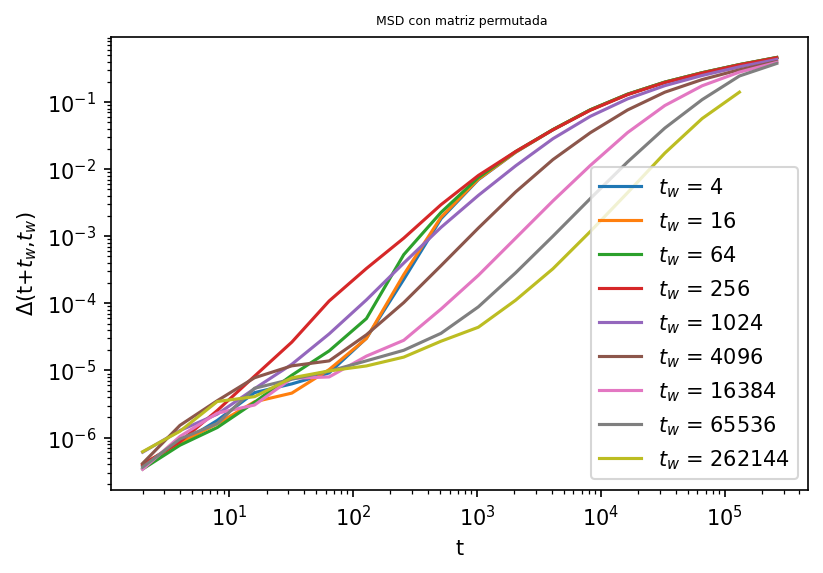

In [10]:
Nv = D.shape[0]
Nh = 50
plt.figure(dpi=150)
perm = True

timew = []
for n in range (1,30):
    tw = 2**(2*n) #para coger un medio de los tw
    timew.append(tw)    
timew = np.array(list(set(timew)))
timew = np.sort(timew)  

for ttw in timew:
    alls = []
    epw = int(ttw)
    
    if not(('W'+str(epw)) in f): # check for last time
        break    
            
    W_tw = torch.tensor(f['W'+str(epw)]) 
    W_tw = np.array(W_tw) #W(tw)
    
    alltime = []
    allt = []
            
    for m in range (1,30):
        tt = ttw + 2**m
        alltime.append(tt) 
                
    alltime = np.array(list(set(alltime)))
    alltime = np.sort(alltime)
    
    for t in alltime: #t=t+tw
        ep = int(t) # epoch to which retrieve the RBM

        if not(('W'+str(ep)) in f): # check for last time
            break
        
        Wt = torch.tensor(f['W'+str(ep)]) 
        Wt = np.array(Wt) #W(t+tw)
                
        if perm:
            W = np.array(PermMatrix(W_tw,Wt)) 
        else:
            W = Wt
 
        cc = (W-W_tw)**2

        alls.append(np.sum(cc)/(Nh*Nv))
        allt.append(ep-ttw)
        
    allt = np.array(allt)

    plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
    
plt.legend()
plt.title(' MSD con matriz permutada', fontsize = 6)
plt.xlabel('t')
plt.ylabel('$\Delta$(t+$t_w$,$t_w$)')
plt.show()
        

- Parece el miosmo gráfico, ¿no está permutando?
- Veamos si los pesos cambian: cogemos una columna de un tw y vemos los pesos en dos tiempos lo más alejados posible:

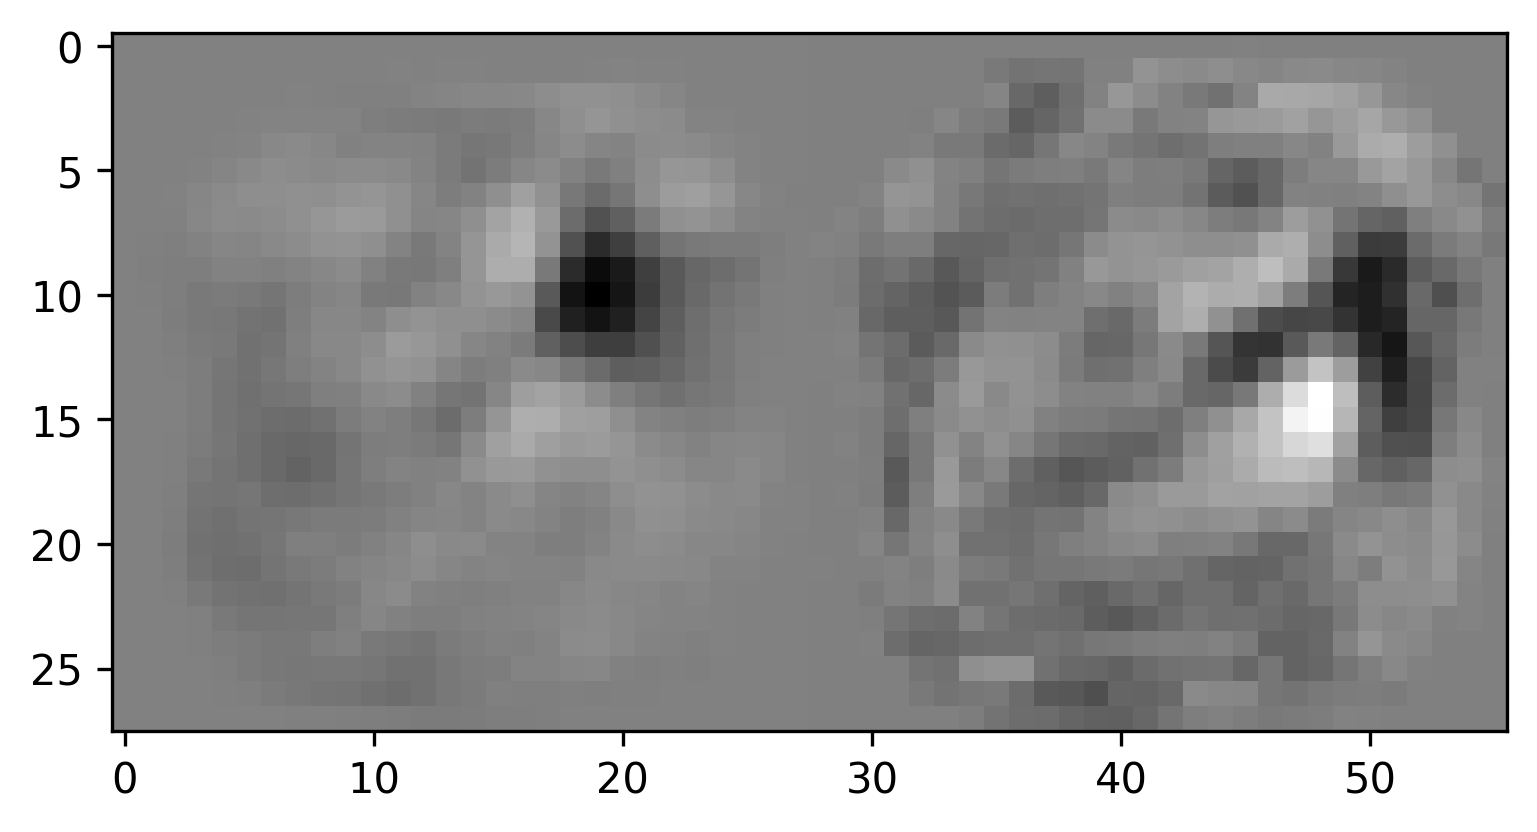

In [166]:
plt.figure(dpi=300)
columnas = [1]
nc = len(columnas)
col = 1
time = [16384,16384+2**(18)]
allt = []
W = []
for t in time:
    ep = int(t) # epoch to which retrieve the RBM
    if not(('W'+str(ep)) in f): # check for last time
        break
    W_t = np.array(f['W'+str(t)])
    #Wtw = np.array(f['W'+str(time[0])])
    W.append(W_t[col,:])
    allt.append(t)
    

#r = ImConcat(torch.tensor(W),ncol=len(columnas),nrow=nr)
nr = int(np.shape(W)[0]/len(columnas)) #nrow - nro tiempos válidos    		
r = myRBM_RDM.ImConcat(torch.tensor(W),ncol=nc,nrow=nr)
#vmin = 0.00001
#vmax = 0.01

plt.imshow(r,cmap = 'gray')

- Se ve que sí que están cambiando, veamos solo los ultimos tres puntos y comparemos el MSD con y sin permutar:

W(tw)


<Figure size 900x600 with 0 Axes>

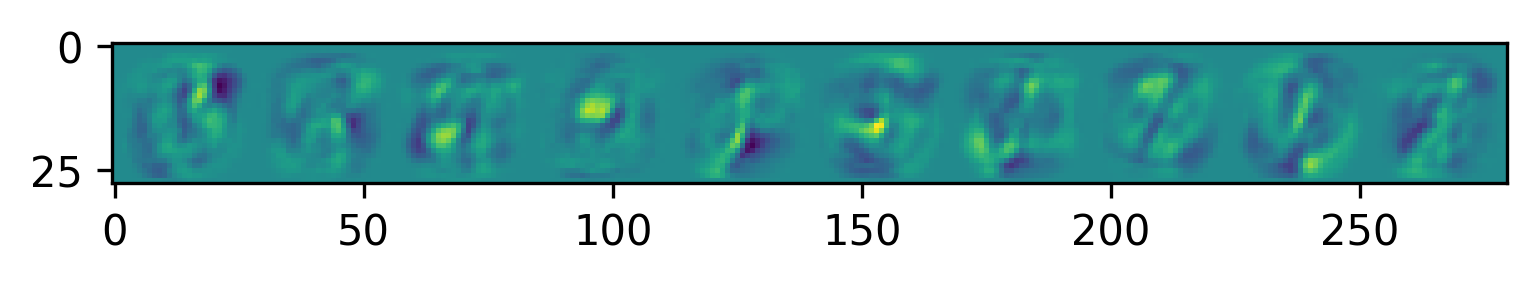

W(t+tw)


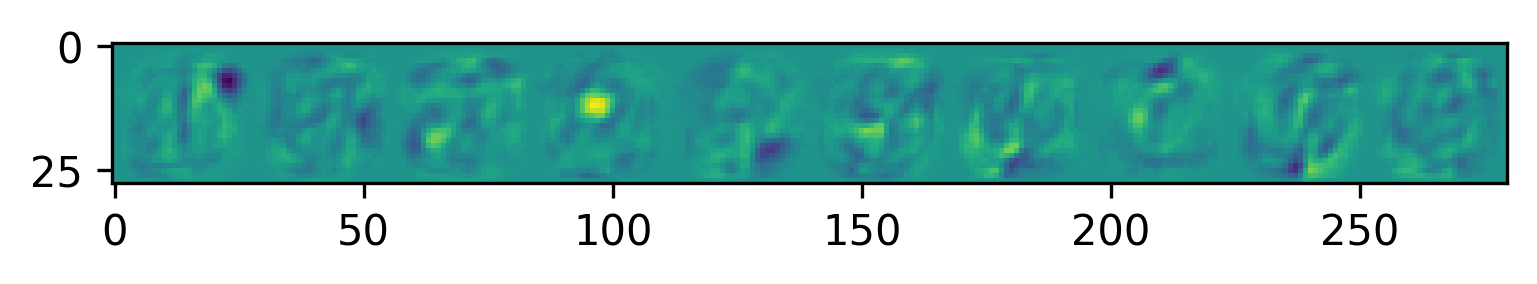

W(t+tw) permutada


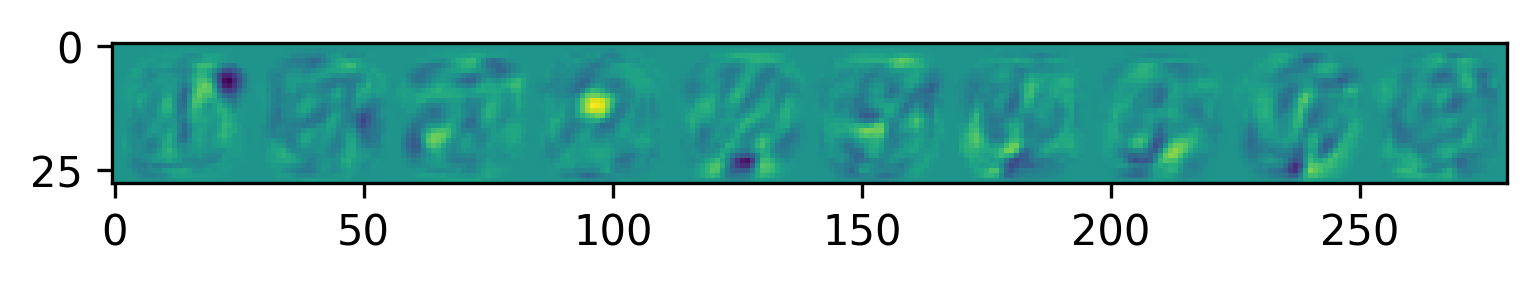

W(t+tw)


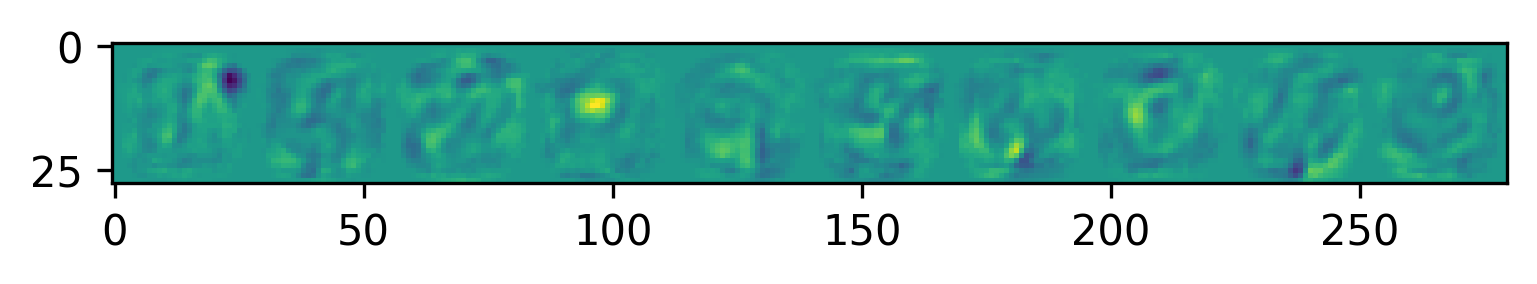

W(t+tw) permutada


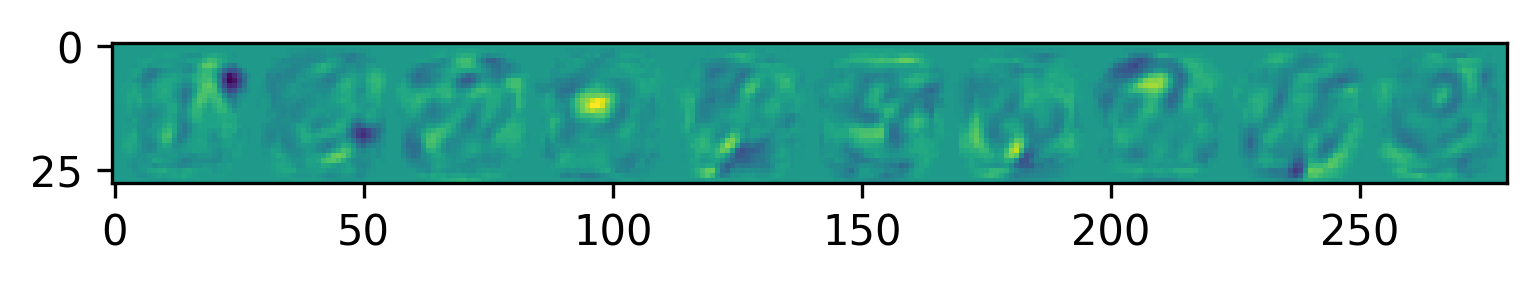

W(t+tw)


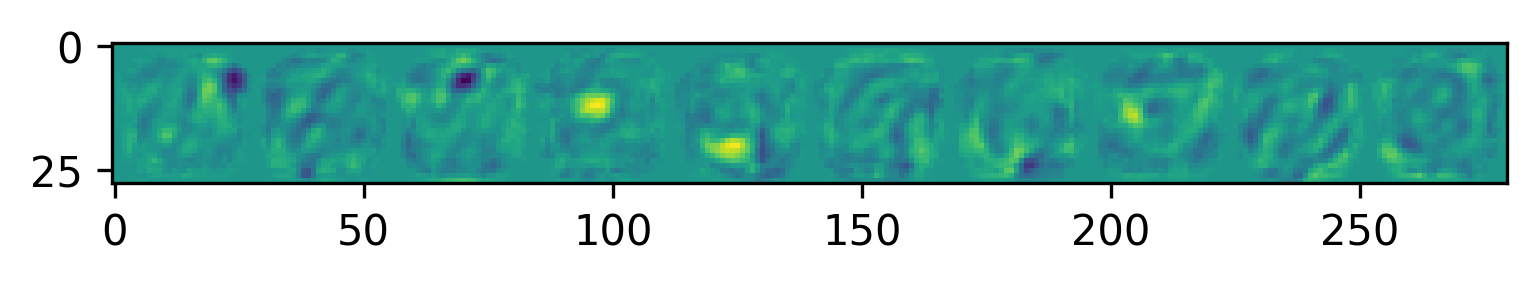

W(t+tw) permutada


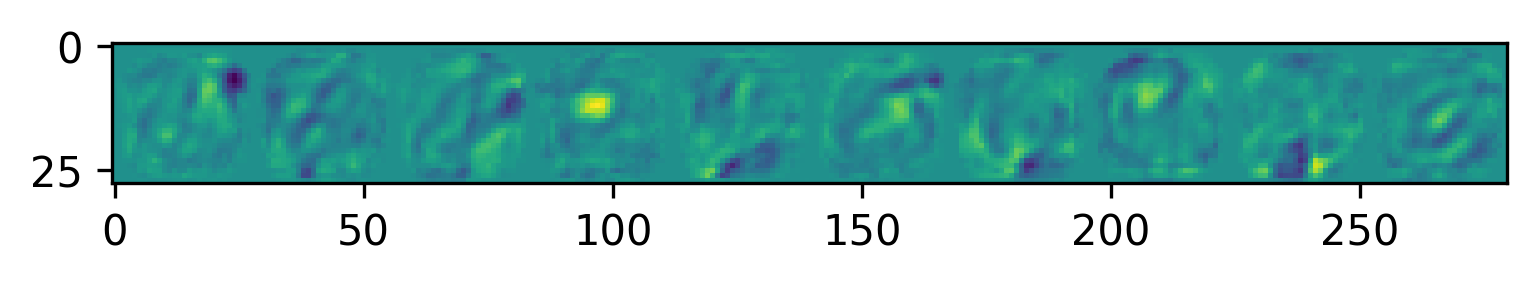

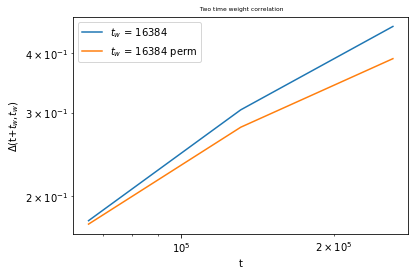

In [12]:
Nv = D.shape[0]
Nh = 50
plt.figure(dpi=150)
perm = True

ttw = 16384

alls = []
allsp = []
epw = int(ttw)


            
W_tw = torch.tensor(f['W'+str(epw)])
print('W(tw)')
plt.figure(dpi=300)
plt.imshow(transf(W_tw[10:20,:]))
plt.show()

W_tw = np.array(W_tw) #W(tw)

alltime = [ttw + 2**(16),ttw + 2**(17),ttw + 2**(18)]
allt = []
            
for t in alltime: #t=t+tw
    ep = int(t) # epoch to which retrieve the RBM

    if not(('W'+str(ep)) in f): # check for last time
        break
        
    Wt = torch.tensor(f['W'+str(ep)]) 
    
    print('W(t+tw)')
    plt.figure(dpi=300)
    plt.imshow(transf(Wt[10:20,:]))
    plt.show()
    
    Wt = np.array(Wt) #W(t+tw)

    W = PermMatrix(W_tw,Wt) 
    
    print('W(t+tw) permutada')
    plt.figure(dpi=300)
    plt.imshow(transf(W[10:20,:]))
    plt.show()

 
    W = np.array(W)
    ccp = (W-W_tw)**2 #permutada

    cc = (Wt-W_tw)**2 #sin permutar


    alls.append(np.sum(cc)/(Nh*Nv))
    allsp.append(np.sum(ccp)/(Nh*Nv))
    allt.append(ep-ttw)

        
allt = np.array(allt)

plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
plt.loglog(np.array(allt),allsp,label='$t_w$ = {} perm'.format(ttw))
    
plt.legend()
plt.title(' Two time weight correlation', fontsize = 6)
plt.xlabel('t')
plt.ylabel('$\Delta$(t+$t_w$,$t_w$)')
plt.show()
        

- Sí que está cambiando!! Efectivamente se está permutando, pero a tiempos grandes (y t-waiting grandes). Recordemos que este es un caso sesgado (pocos hidden nodes). Veamos el caso optimo (recordemos que tenemos menos tiempos al final):

In [45]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 100
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 3000
T = 0

filename = 'files/RDM_n800_b100_l01_k10_e3k.h5'
f = h5py.File(filename,'w')
f.create_dataset('alltime',data=time)
f.close()

RDM3k = rbm.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

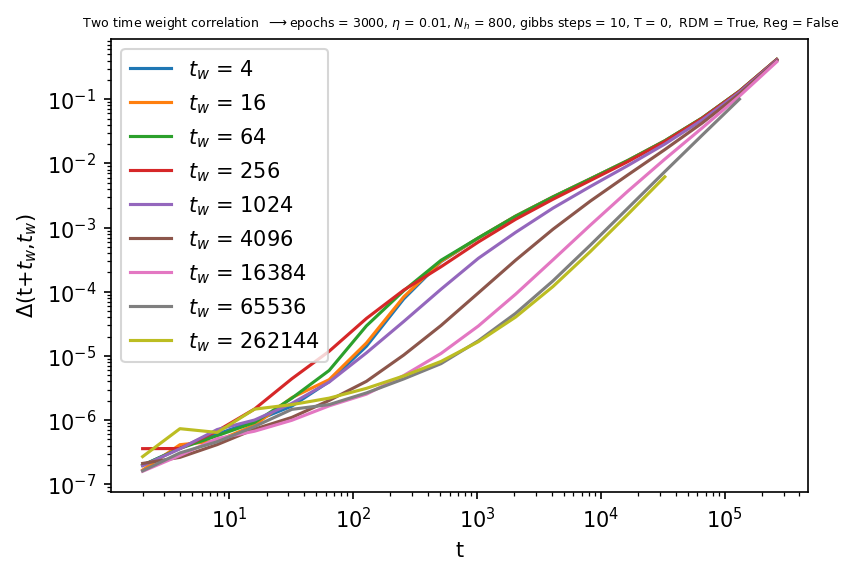

In [51]:
RDM3k.PlotMSDW(False)

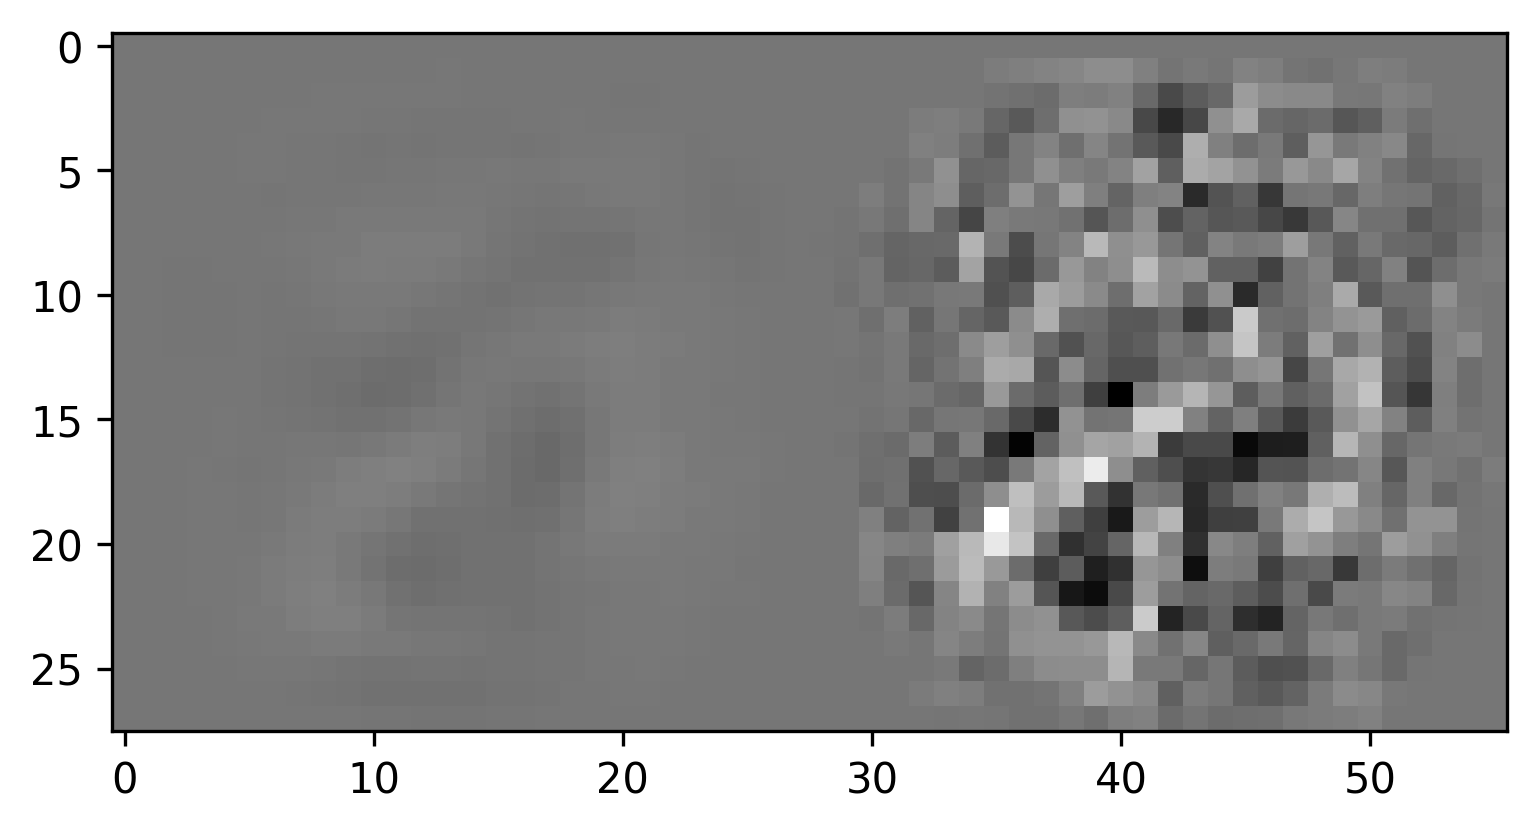

In [89]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 100
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 3000
T = 0

filename = 'files/RDM_n800_b100_l01_k10_e3k.h5'
f = h5py.File(filename,'r')
 
plt.figure(dpi=300)
columnas = [1]
nc = len(columnas)
col = 10
time = [4096,4096+2**(18)]
allt = []
W = []
for t in time:
    ep = int(t) # epoch to which retrieve the RBM
    if not(('W'+str(ep)) in f): # check for last time
        break
    W_t = np.array(f['W'+str(t)])
    #Wtw = np.array(f['W'+str(time[0])])
    W.append(W_t[col,:])
    allt.append(t)
    

#r = ImConcat(torch.tensor(W),ncol=len(columnas),nrow=nr)
nr = int(np.shape(W)[0]/len(columnas)) #nrow - nro tiempos válidos    		
r = myRBM_RDM.ImConcat(torch.tensor(W),ncol=nc,nrow=nr)
#vmin = 0.00001
#vmax = 0.01

plt.imshow(r,cmap = 'gray')

W(tw)


<Figure size 900x600 with 0 Axes>

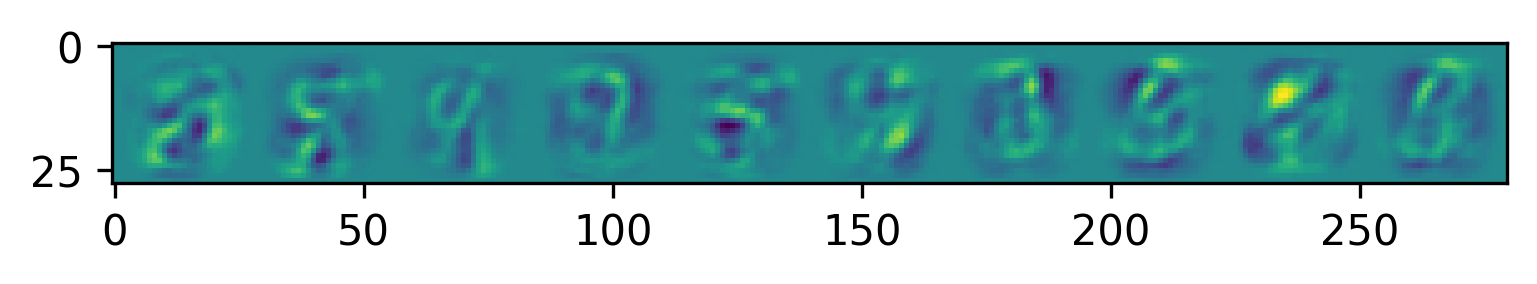

W(t+tw)


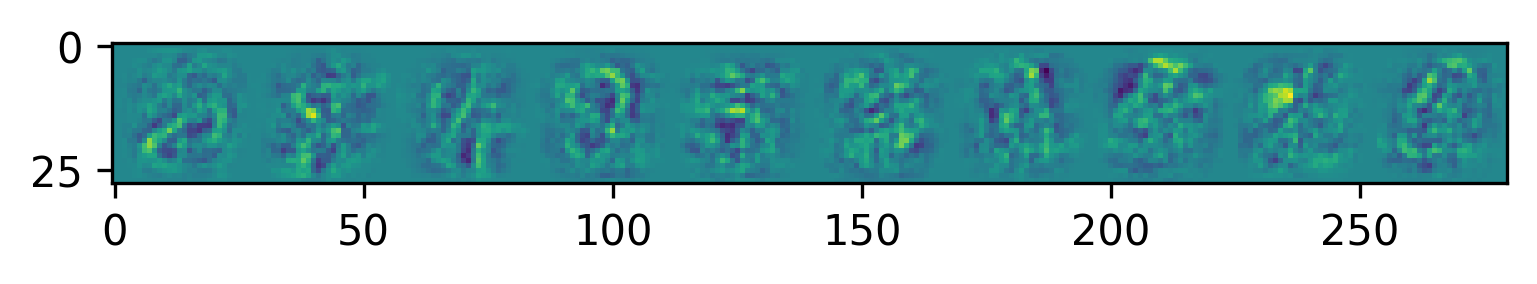

W(t+tw) permutada


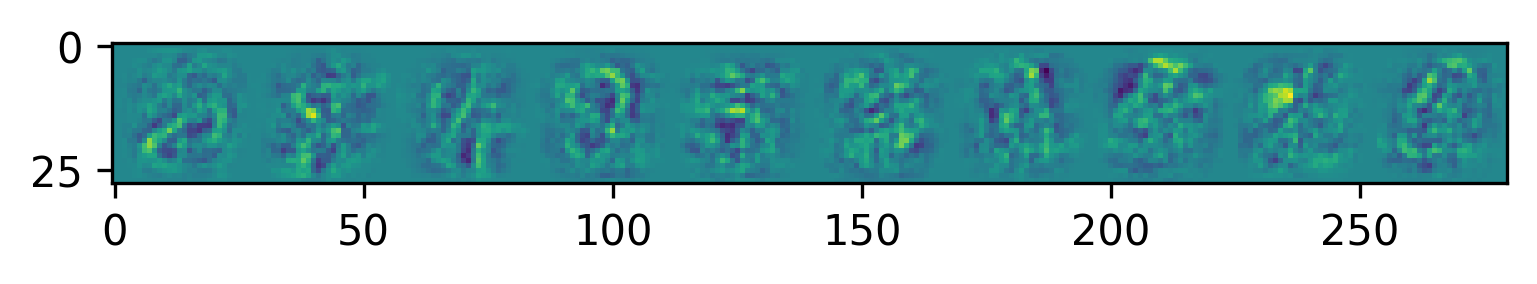

W(t+tw)


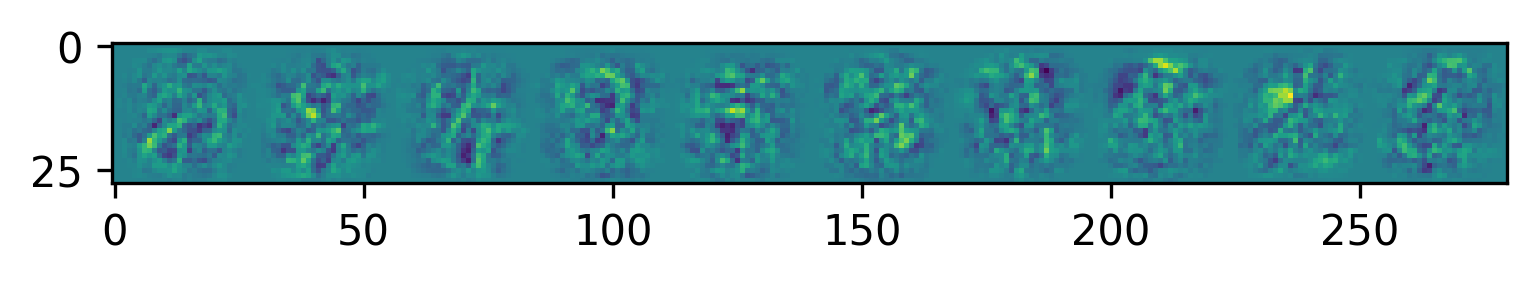

W(t+tw) permutada


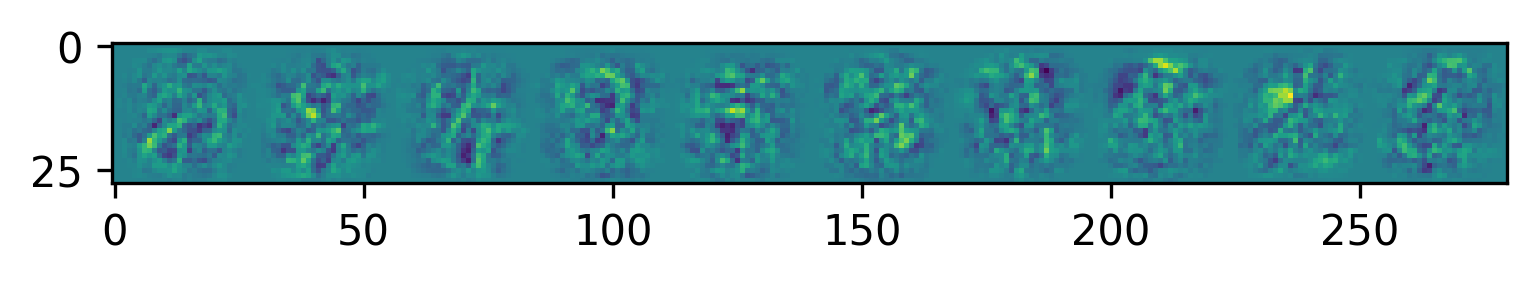

W(t+tw)


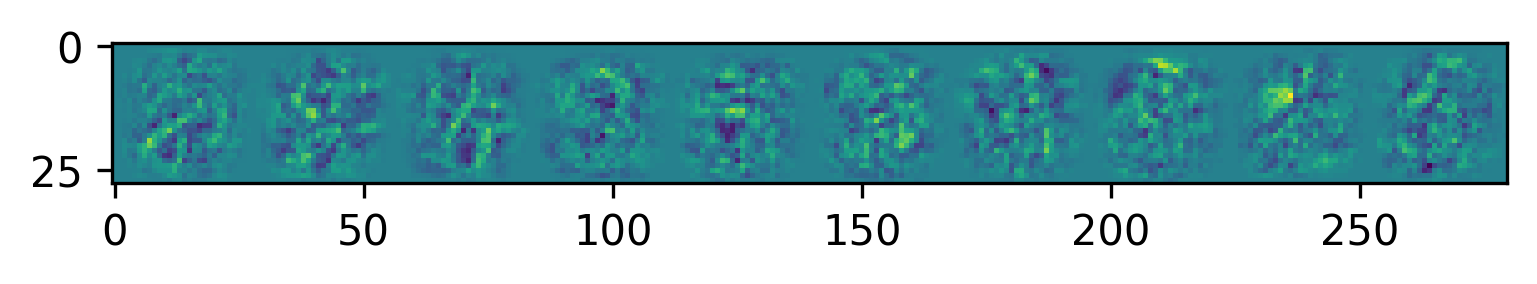

W(t+tw) permutada


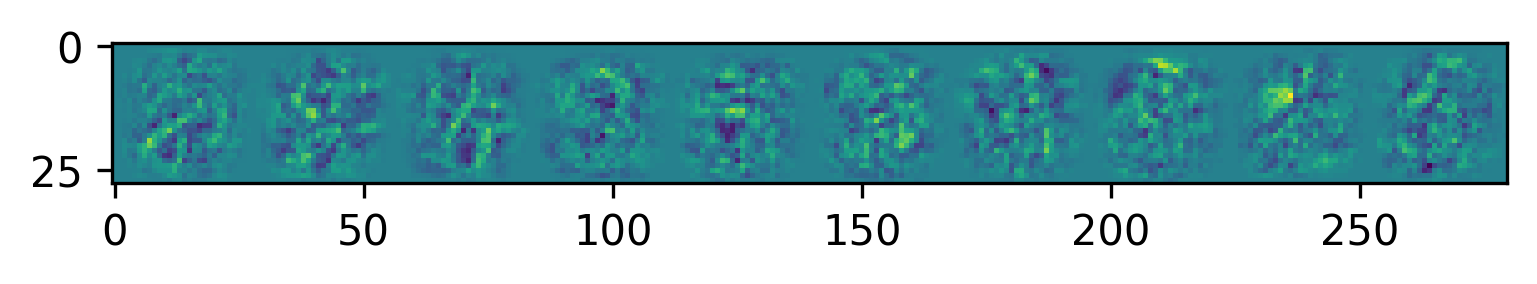

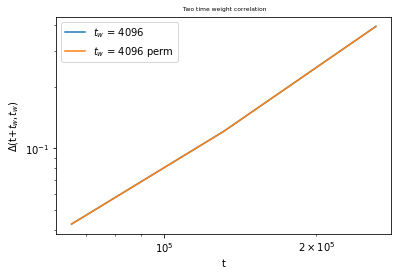

In [90]:
Nv = D.shape[0]
Nh = 800
plt.figure(dpi=150)
perm = True

ttw = 4096

alls = []
allsp = []
epw = int(ttw)


            
W_tw = torch.tensor(f['W'+str(epw)])
print('W(tw)')
plt.figure(dpi=300)
plt.imshow(transf(W_tw[10:20,:]))
plt.show()

W_tw = np.array(W_tw) #W(tw)

alltime = [ttw + 2**(16),ttw + 2**(17),ttw + 2**(18)]
allt = []
            
for t in alltime: #t=t+tw
    ep = int(t) # epoch to which retrieve the RBM

    if not(('W'+str(ep)) in f): # check for last time
        break
        
    Wt = torch.tensor(f['W'+str(ep)]) 
    
    print('W(t+tw)')
    plt.figure(dpi=300)
    plt.imshow(transf(Wt[10:20,:]))
    plt.show()
    
    Wt = np.array(Wt) #W(t+tw)

    W = PermMatrix(W_tw,Wt) 
    
    print('W(t+tw) permutada')
    plt.figure(dpi=300)
    plt.imshow(transf(W[10:20,:]))
    plt.show()

 
    W = np.array(W)
    ccp = (W-W_tw)**2 #permutada

    cc = (Wt-W_tw)**2 #sin permutar


    alls.append(np.sum(cc)/(Nh*Nv))
    allsp.append(np.sum(ccp)/(Nh*Nv))
    allt.append(ep-ttw)

        
allt = np.array(allt)

plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
plt.loglog(np.array(allt),allsp,label='$t_w$ = {} perm'.format(ttw))
    
plt.legend()
plt.title(' Two time weight correlation', fontsize = 6)
plt.xlabel('t')
plt.ylabel('$\Delta$(t+$t_w$,$t_w$)')
plt.show()
        

(...)

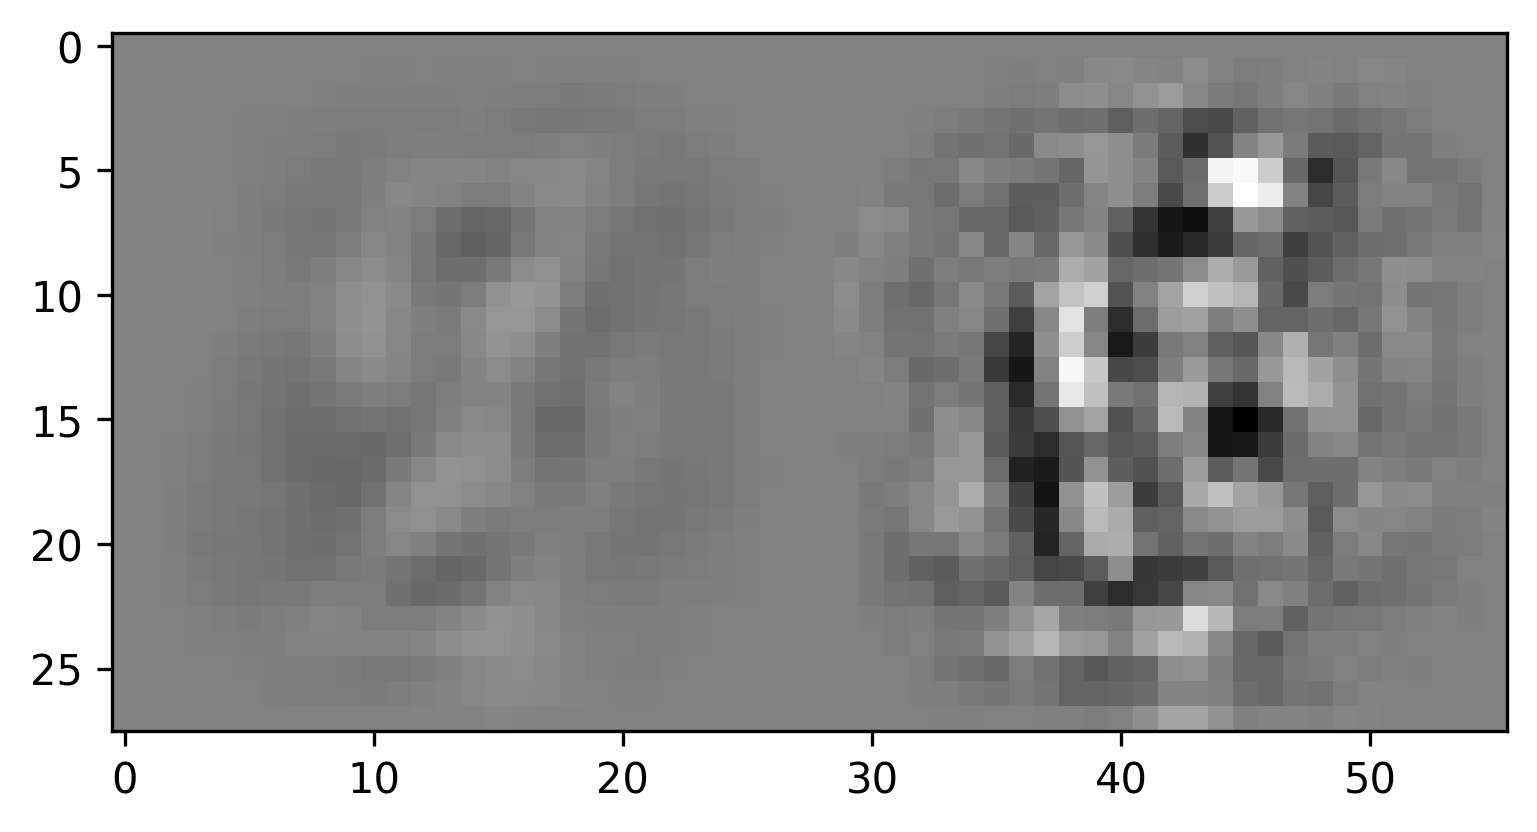

In [17]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 200
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 1000
T = 0

filename = 'files/RDM_n800_b200_l01_k10_ek.h5'
f = h5py.File(filename,'r')
 
plt.figure(dpi=300)
columnas = [1]
nc = len(columnas)
col = 10
time = [4096,4096+2**(15)]
allt = []
W = []
for t in time:
    ep = int(t) # epoch to which retrieve the RBM
    if not(('W'+str(ep)) in f): # check for last time
        break
    W_t = np.array(f['W'+str(t)])
    #Wtw = np.array(f['W'+str(time[0])])
    W.append(W_t[col,:])
    allt.append(t)
    

#r = ImConcat(torch.tensor(W),ncol=len(columnas),nrow=nr)
nr = int(np.shape(W)[0]/len(columnas)) #nrow - nro tiempos válidos    		
r = myRBM_RDM.ImConcat(torch.tensor(W),ncol=nc,nrow=nr)
#vmin = 0.00001
#vmax = 0.01

plt.imshow(r,cmap = 'gray')

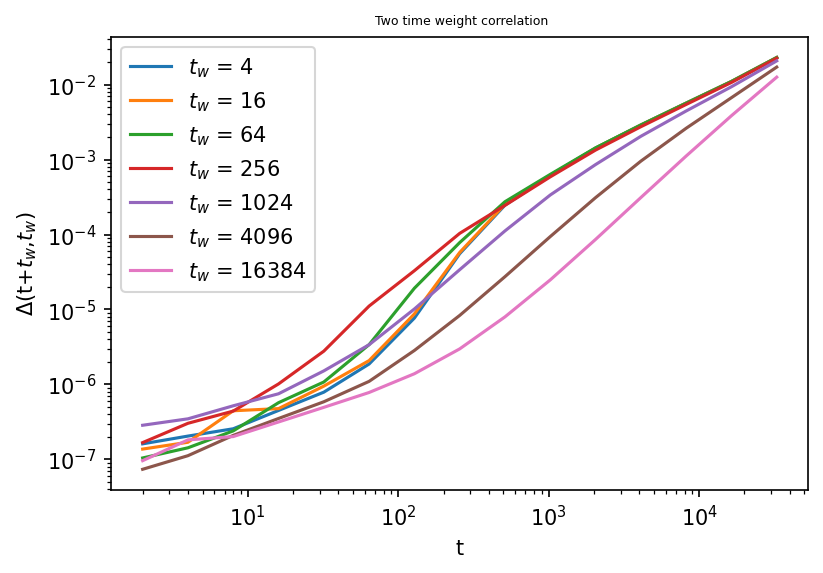

In [14]:
Nv = D.shape[0]
Nh = 800
plt.figure(dpi=150)
perm = True

timew = []
for n in range (1,30):
    tw = 2**(2*n) #para coger un medio de los tw
    timew.append(tw)  
    
timew = np.array(list(set(timew)))
timew = np.sort(timew)  

for ttw in timew:
    alls = []
    epw = int(ttw)
    
    if not(('W'+str(epw)) in f): # check for last time
        break    
            
    W_tw = torch.tensor(f['W'+str(epw)]) 
    W_tw = np.array(W_tw) #W(tw)
    
    alltime = []
    allt = []
            
    for m in range (1,30):
        tt = ttw + 2**m
        alltime.append(tt) 
                
    alltime = np.array(list(set(alltime)))
    alltime = np.sort(alltime)
    
    for t in alltime: #t=t+tw
        ep = int(t) # epoch to which retrieve the RBM

        if not(('W'+str(ep)) in f): # check for last time
            break
        
        Wt = torch.tensor(f['W'+str(ep)]) 
        Wt = np.array(Wt) #W(t+tw)
                
        if perm:
            W = np.array(PermMatrix(W_tw,Wt))
        else:
            W = Wt
 
        cc = (W-W_tw)**2

        alls.append(np.sum(cc)/(Nh*Nv))
        allt.append(ep-ttw)
        
    allt = np.array(allt)

    plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
    
plt.legend()
plt.title(' Two time weight correlation', fontsize = 6)
plt.xlabel('t')
plt.ylabel('$\Delta$(t+$t_w$,$t_w$)')
plt.show()
        

W(tw)


<Figure size 900x600 with 0 Axes>

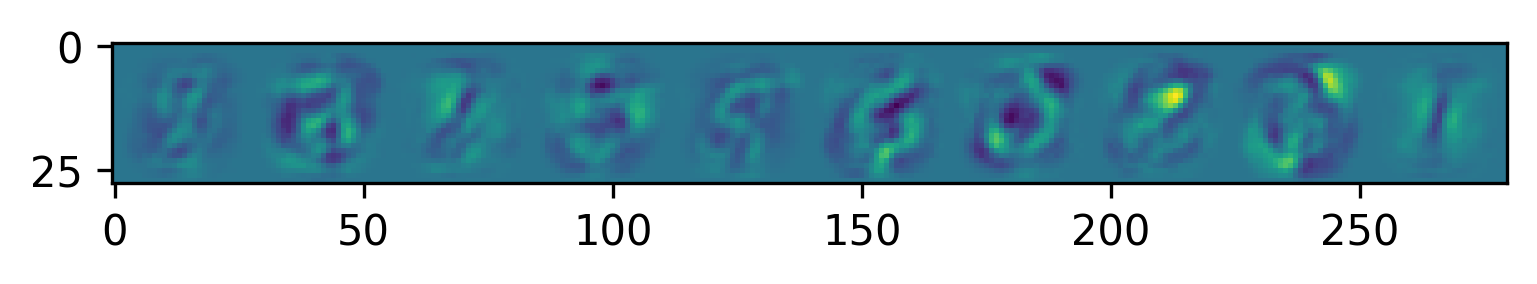

W(t+tw)


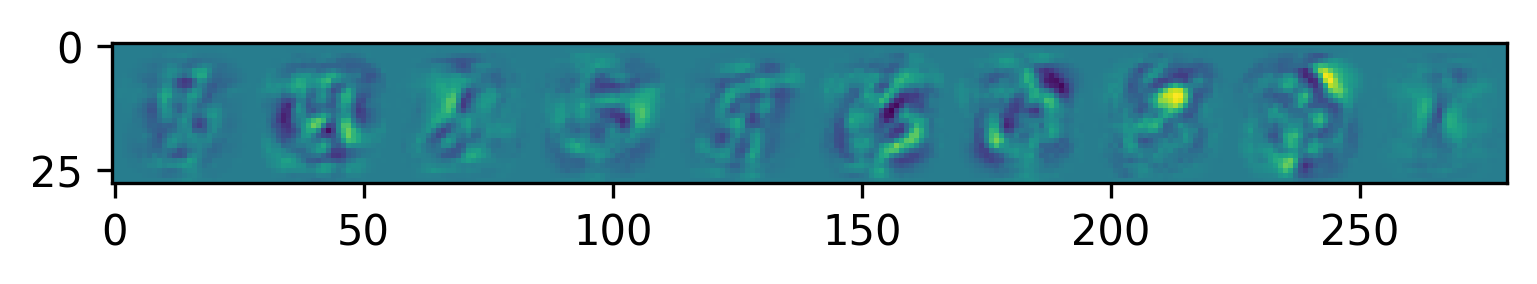

W(t+tw) permutada


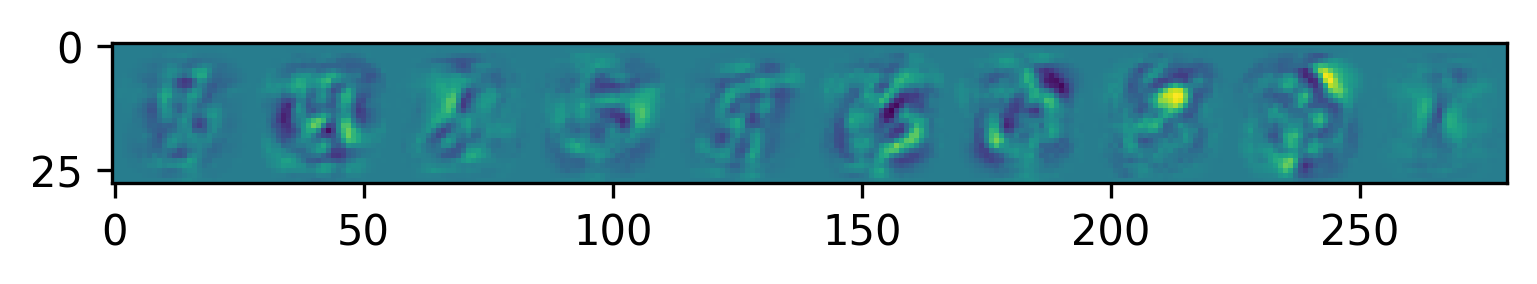

W(t+tw)


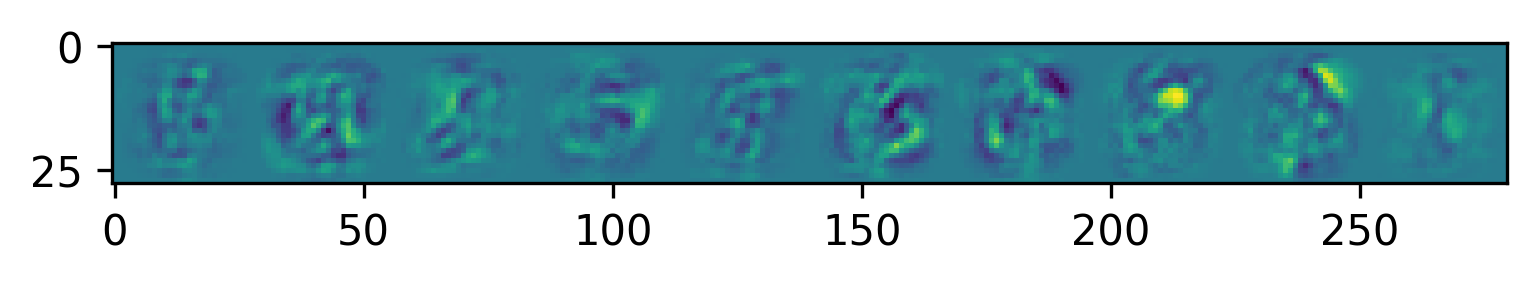

W(t+tw) permutada


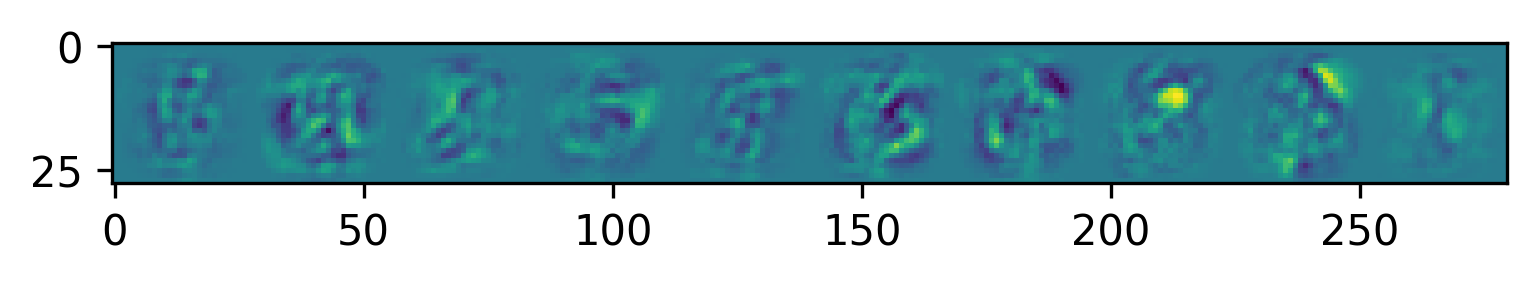

W(t+tw)


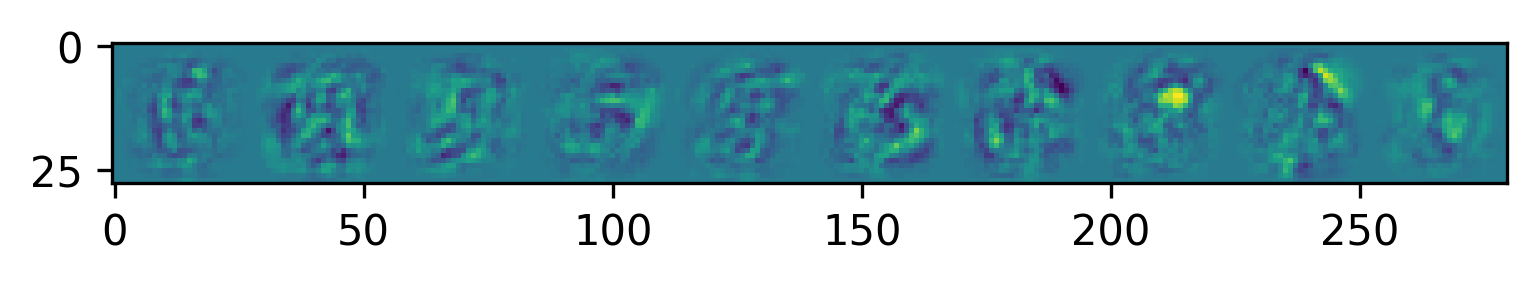

W(t+tw) permutada


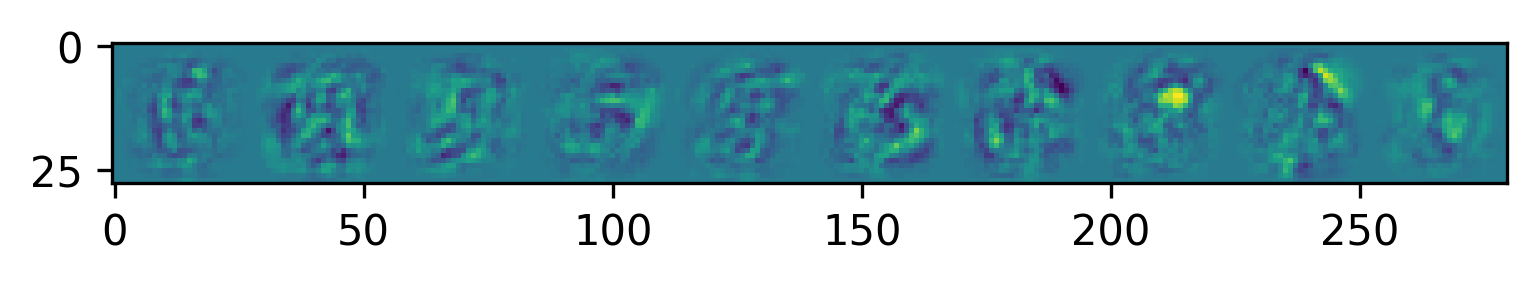

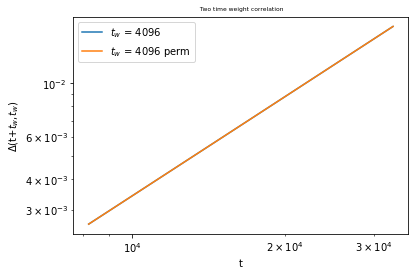

In [15]:
Nv = D.shape[0]
Nh = 800
plt.figure(dpi=150)
perm = True

ttw = 4096

alls = []
allsp = []
epw = int(ttw)


            
W_tw = torch.tensor(f['W'+str(epw)])
print('W(tw)')
plt.figure(dpi=300)
plt.imshow(transf(W_tw[10:20,:]))
plt.show()

W_tw = np.array(W_tw) #W(tw)

alltime = [ttw + 2**(13),ttw + 2**(14),ttw + 2**(15)]
allt = []
            
for t in alltime: #t=t+tw
    ep = int(t) # epoch to which retrieve the RBM

    if not(('W'+str(ep)) in f): # check for last time
        break
        
    Wt = torch.tensor(f['W'+str(ep)]) 
    
    print('W(t+tw)')
    plt.figure(dpi=300)
    plt.imshow(transf(Wt[10:20,:]))
    plt.show()
    
    Wt = np.array(Wt) #W(t+tw)

    W = PermMatrix(W_tw,Wt) 
    
    print('W(t+tw) permutada')
    plt.figure(dpi=300)
    plt.imshow(transf(W[10:20,:]))
    plt.show()

 
    W = np.array(W)
    ccp = (W-W_tw)**2 #permutada

    cc = (Wt-W_tw)**2 #sin permutar


    alls.append(np.sum(cc)/(Nh*Nv))
    allsp.append(np.sum(ccp)/(Nh*Nv))
    allt.append(ep-ttw)

        
allt = np.array(allt)

plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
plt.loglog(np.array(allt),allsp,label='$t_w$ = {} perm'.format(ttw))
    
plt.legend()
plt.title(' Two time weight correlation', fontsize = 6)
plt.xlabel('t')
plt.ylabel('$\Delta$(t+$t_w$,$t_w$)')
plt.show()
        

- parece que no permuta
- cojamos las matrices y veamos

In [23]:
filename = 'files/RDM_n800_b200_l01_k10_ek.h5'
f = h5py.File(filename,'r')

alltime = np.sort(f['alltime'])
alls = []
allt = []
        
for t in alltime:
    ep = int(t) # epoch to which retrieve the RBM
            
    if not(('W'+str(ep)) in f): # check for last time
        break
        
    W = torch.tensor(f['W'+str(ep)])    
            

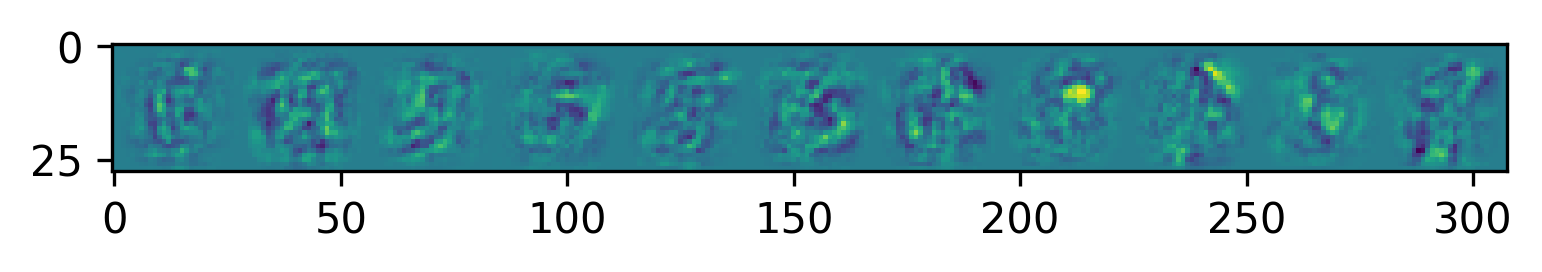

torch.Size([11, 784])
torch.Size([28, 308])


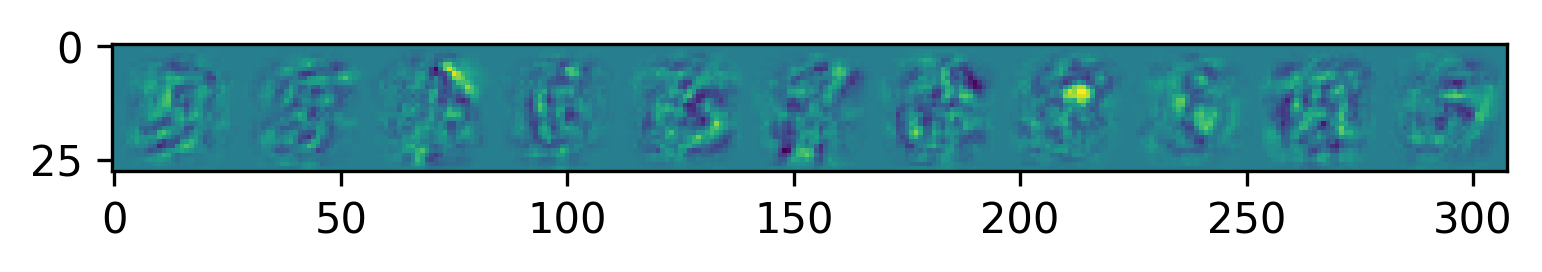

torch.Size([11, 784])


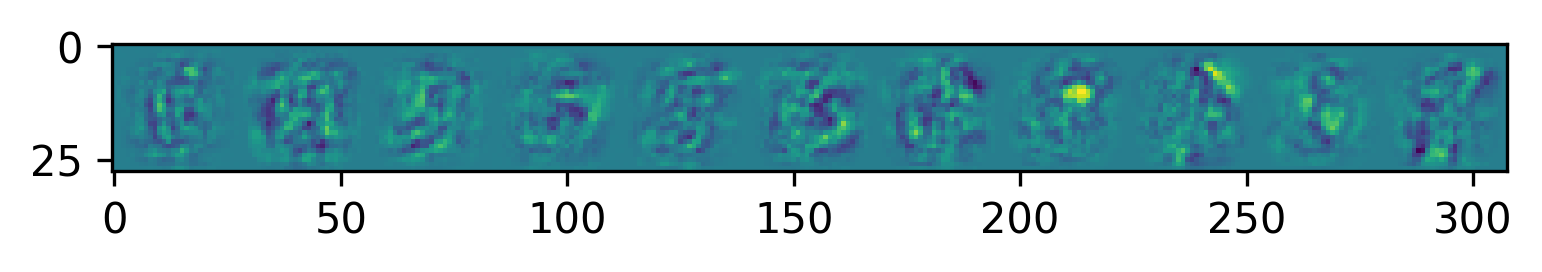

In [24]:
X1 = W[10:21,:] #cogemos solo algunos para verlo bien

num = X1.shape[0]


permutadas = np.random.permutation(num)
X2 = X1[permutadas, :, ...]

plt.figure(dpi=300)

A = transf(X1)
plt.imshow(A)
plt.show()

print(X1.shape)
print(A.shape)


plt.figure(dpi=300)
B = transf(X2)
plt.imshow(B)
plt.show()


plt.figure(dpi=300)
X3 = PermMatrix(X1,X2)
print(X3.shape)
C = transf(X3)
plt.imshow(C)
plt.show()


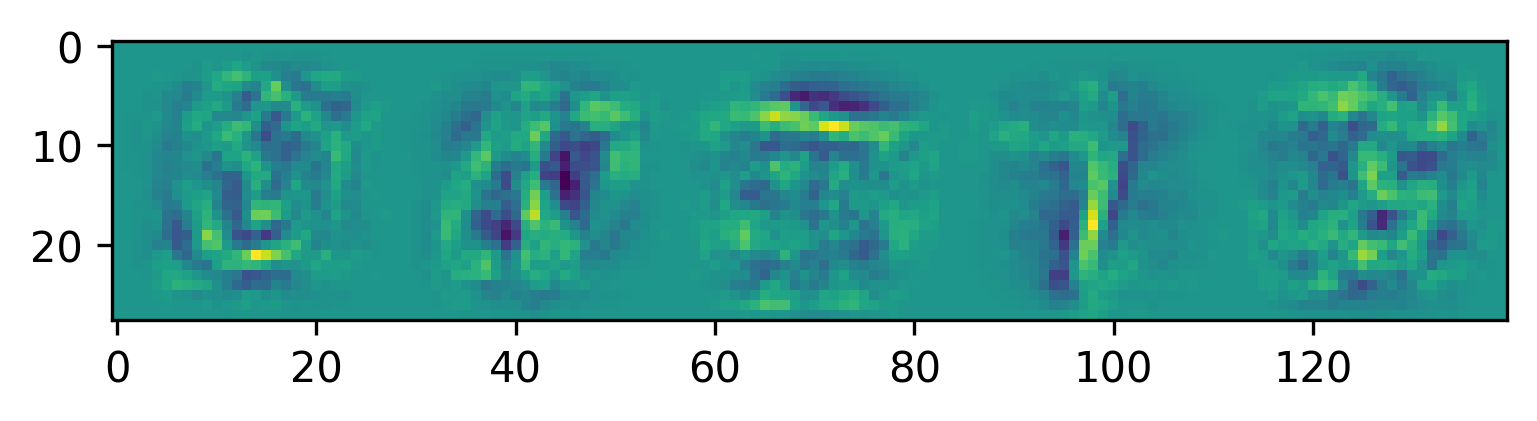

torch.Size([800, 784])
torch.Size([28, 140])


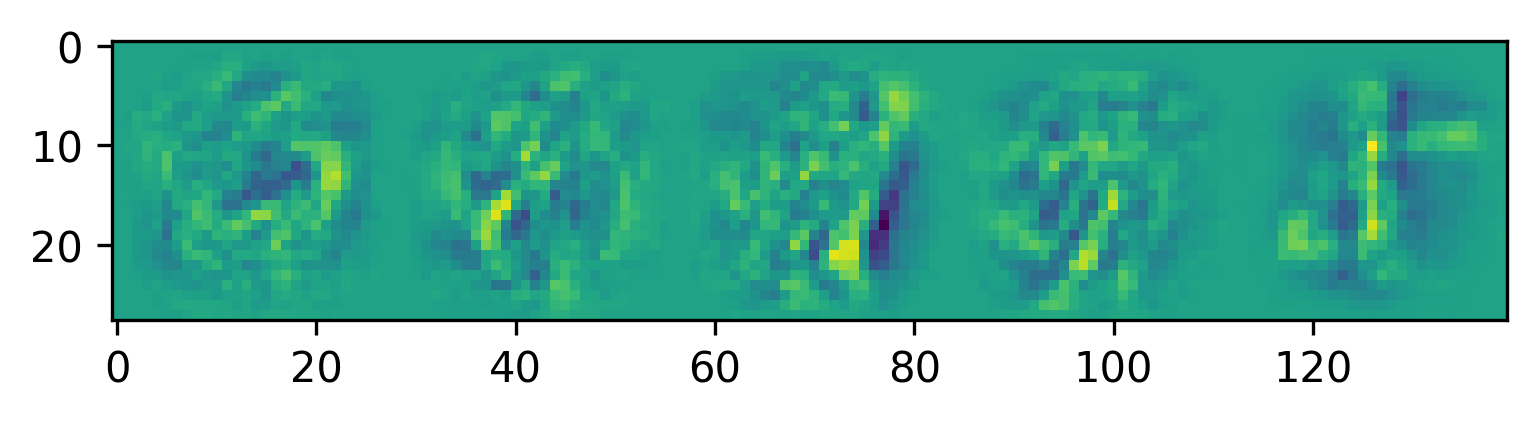

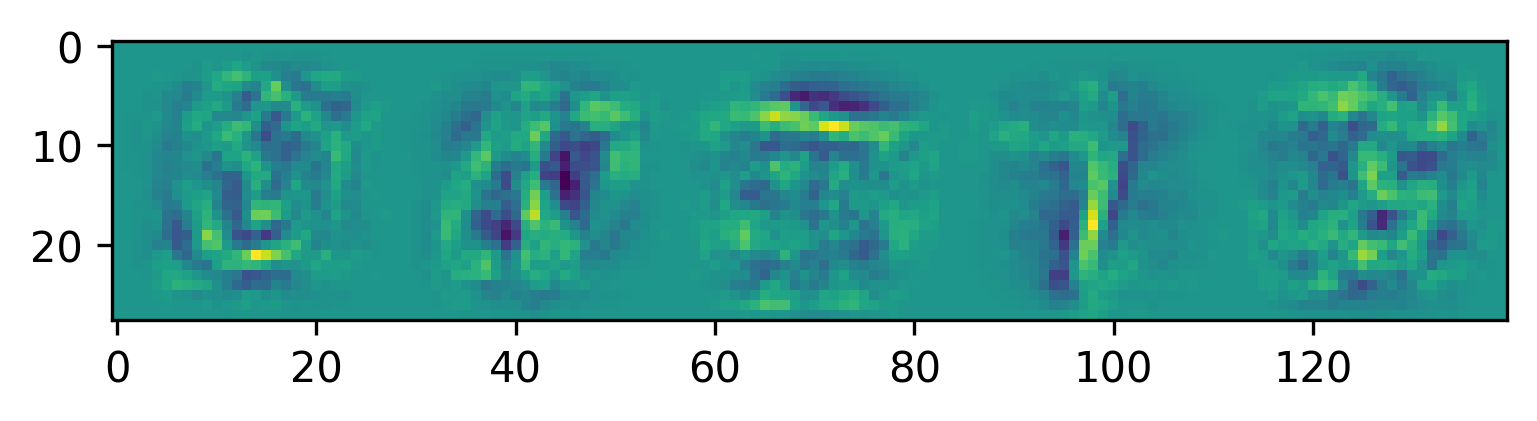

In [25]:
X1 = W #cogemos todos pero vemos solo algunos

num = X1.shape[0]


permutadas = np.random.permutation(num)
X2 = X1[permutadas, :, ...]


X3 = PermMatrix(X1,X2)


plt.figure(dpi=300)

A = transf(X1[2:7,:])
plt.imshow(A)
plt.show()

print(X1.shape)
print(A.shape)


plt.figure(dpi=300)
B = transf(X2[2:7,:])
plt.imshow(B)
plt.show()


plt.figure(dpi=300)
C = transf(X3[2:7,:])
plt.imshow(C)
plt.show()


## Susceptibilidad exponencial


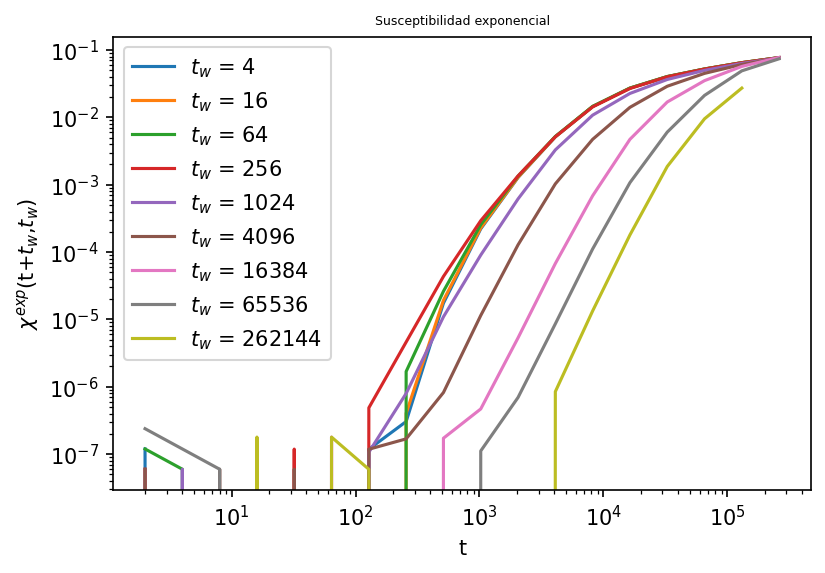

In [40]:
plt.figure(dpi=150)
filename = 'files/RDM_n50_b50_l01_k10_e2k.h5'

f = h5py.File(filename,'r')

Nh=50
Nv=784
timew = []

for n in range (1,30):
    tw = 2**(2*n) #para coger un medio de los tw
    timew.append(tw)    
    
timew = np.array(list(set(timew)))
timew = np.sort(timew)  

for ttw in timew:
    alls = []
    epw = int(ttw)
    
    if not(('W'+str(epw)) in f): # check for last time
        break    
            
    W_tw = torch.tensor(f['W'+str(epw)]) 
    W_tw = np.array(W_tw) #W(tw)
    
    alltime = []
    allt = []
            
    for m in range (1,30):
        tt = ttw + 2**m
        alltime.append(tt) 
                
    alltime = np.array(list(set(alltime)))
    alltime = np.sort(alltime)
    
    for t in alltime: #t=t+tw
        ep = int(t) # epoch to which retrieve the RBM

        if not(('W'+str(ep)) in f): # check for last time
            break
        
        Wt = torch.tensor(f['W'+str(ep)]) 
        Wt = np.array(Wt) #W(t+tw)
        W = Wt
 
        c = np.exp(-(W-W_tw)**2) #c_{ia}
        xi = np.mean(c**2)-np.mean(c)**2

        alls.append(xi)
        allt.append(ep-ttw)
        
    allt = np.array(allt)

    plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
    
plt.legend()
plt.title('Susceptibilidad exponencial', fontsize = 6)
plt.xlabel('t')
plt.ylabel('$\chi^{exp}$(t+$t_w$,$t_w$)')
plt.show()

In [43]:
import torch
import numpy as np
import torchvision.datasets as datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import h5py
import rbm
from plyer import notification
from scipy.optimize import linear_sum_assignment


In [44]:
Ns = 10000
device = 'cpu'
mnist_trainset = datasets.MNIST('dataset/', train=True, download=True)
D = mnist_trainset.data[:Ns,:,:].reshape(Ns,28*28).float().to(device) / 255.0
D = (D > 0.3) * 1.0
D = D.t()
time = [0,1,2]
for n in range (1,40):
    for m in range (1,40):
        t = 2**n + 2**m
        time.append(t)

time = np.array(list(set(time)))
time = np.sort(time)


In [45]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 100
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 3000
T = 0

filename = 'files/RDM_n800_b100_l01_k10_e3k.h5'
f = h5py.File(filename,'w') #w - escribir
f.create_dataset('alltime',data=time)
f.close()

RDM3k = rbm.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

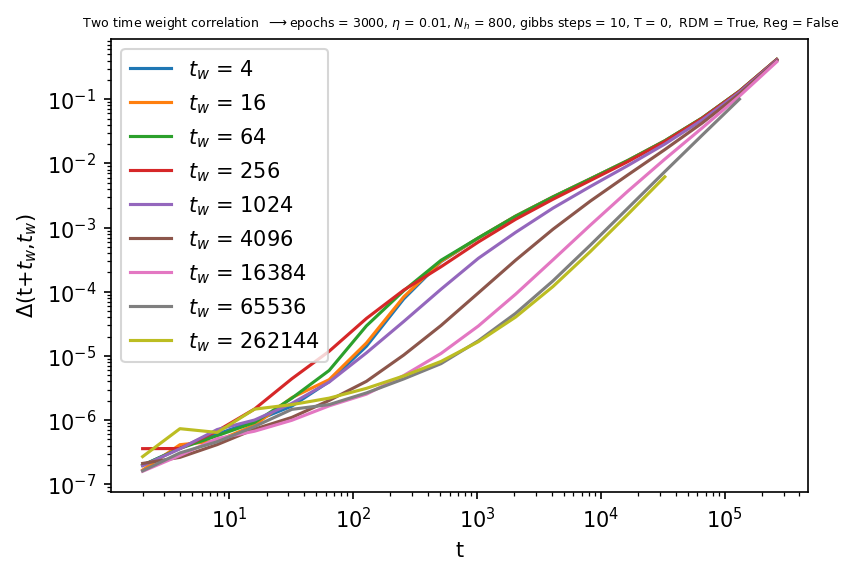

In [51]:
RDM3k.PlotMSDW(False)

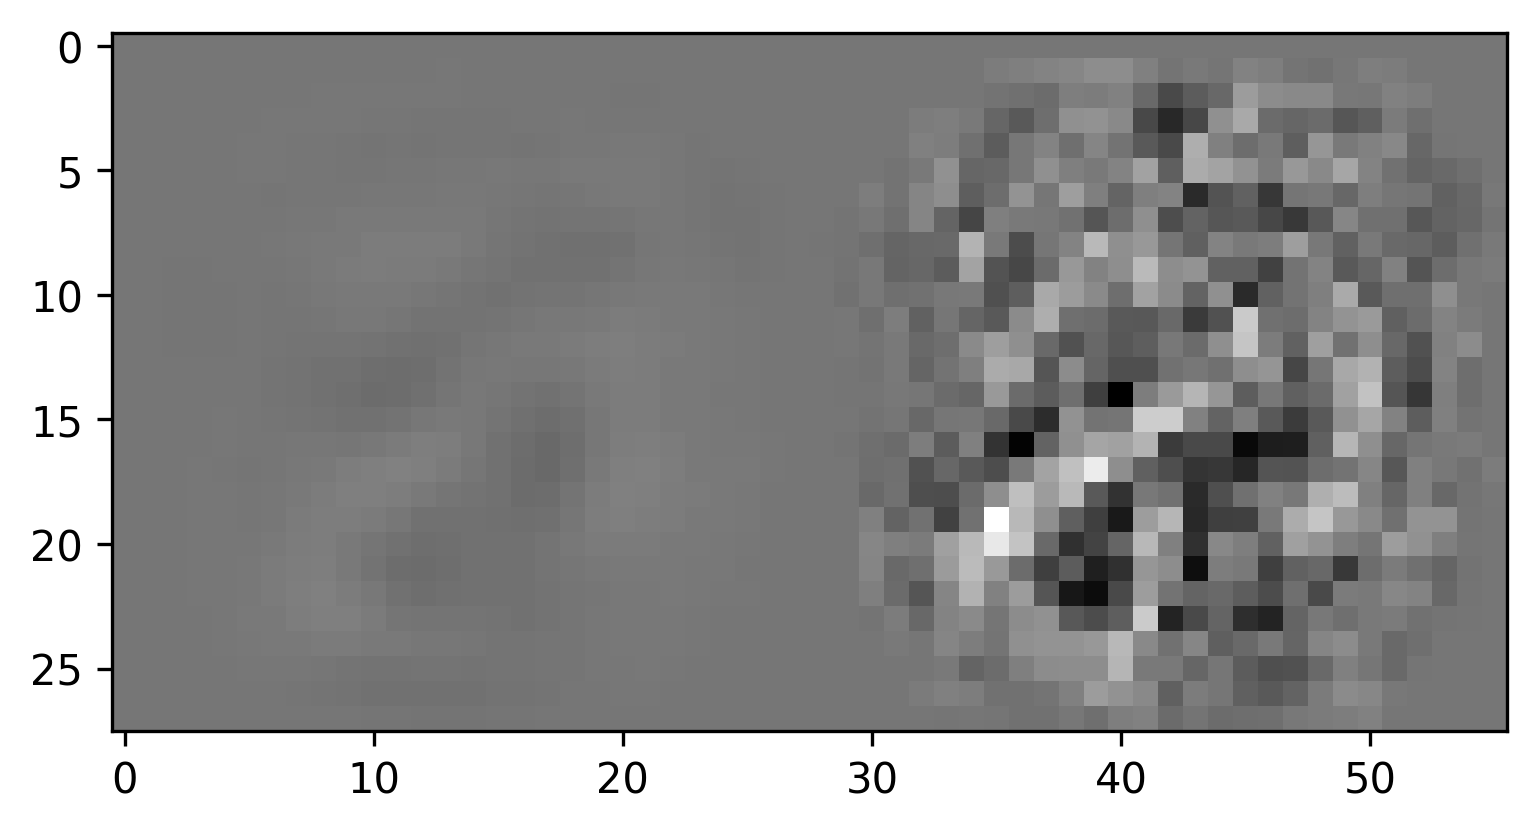

In [89]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 100
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 3000
T = 0

filename = 'files/RDM_n800_b100_l01_k10_e3k.h5'
f = h5py.File(filename,'r')
 
plt.figure(dpi=300)
columnas = [1]
nc = len(columnas)
col = 10
time = [4096,4096+2**(18)]
allt = []
W = []
for t in time:
    ep = int(t) # epoch to which retrieve the RBM
    if not(('W'+str(ep)) in f): # check for last time
        break
    W_t = np.array(f['W'+str(t)])
    #Wtw = np.array(f['W'+str(time[0])])
    W.append(W_t[col,:])
    allt.append(t)
    

#r = ImConcat(torch.tensor(W),ncol=len(columnas),nrow=nr)
nr = int(np.shape(W)[0]/len(columnas)) #nrow - nro tiempos válidos    		
r = myRBM_RDM.ImConcat(torch.tensor(W),ncol=nc,nrow=nr)
#vmin = 0.00001
#vmax = 0.01

plt.imshow(r,cmap = 'gray')

W(tw)


<Figure size 900x600 with 0 Axes>

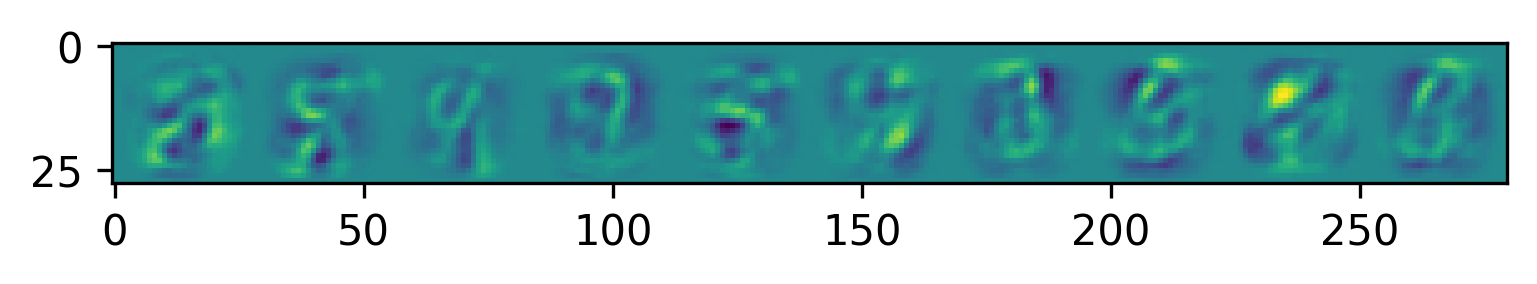

W(t+tw)


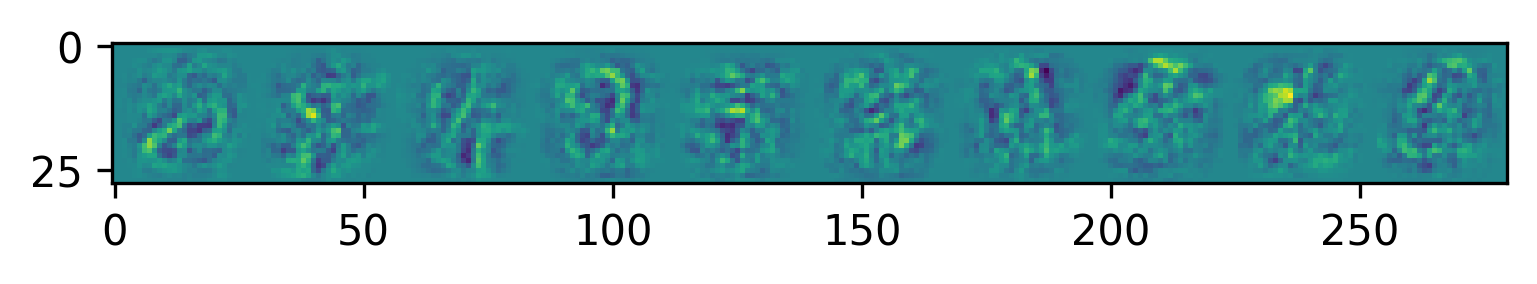

W(t+tw) permutada


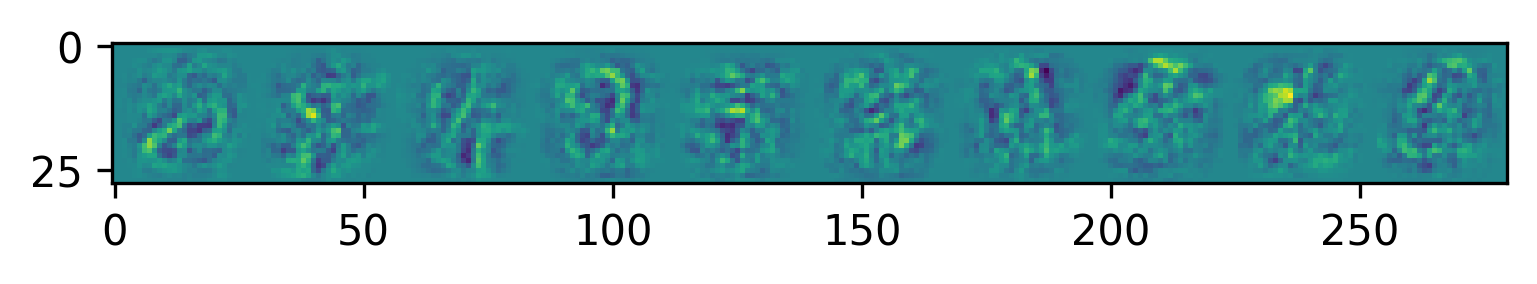

W(t+tw)


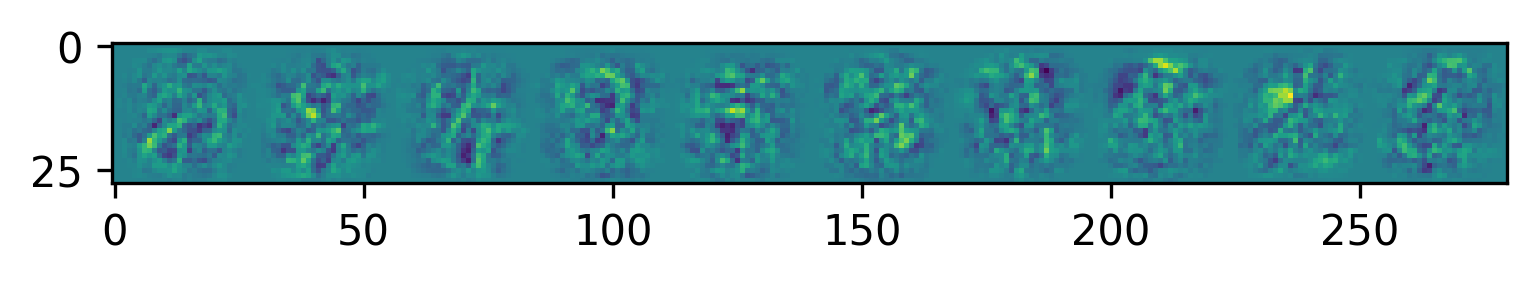

W(t+tw) permutada


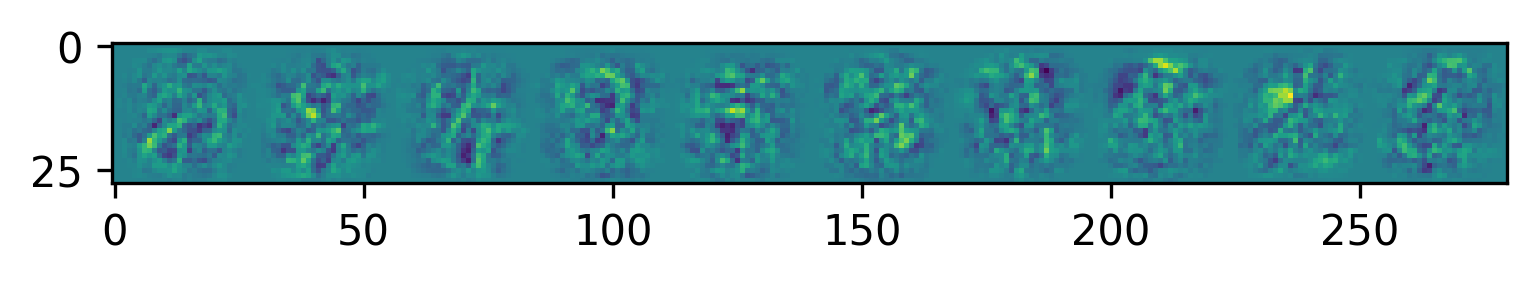

W(t+tw)


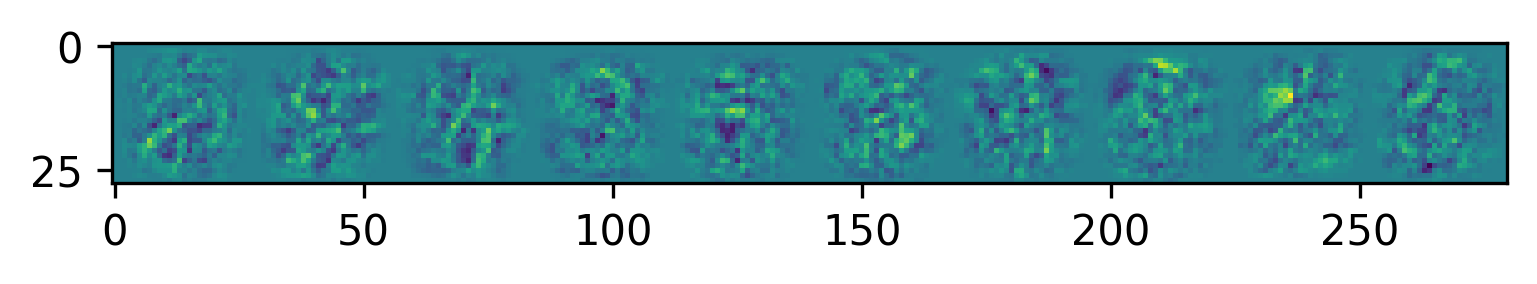

W(t+tw) permutada


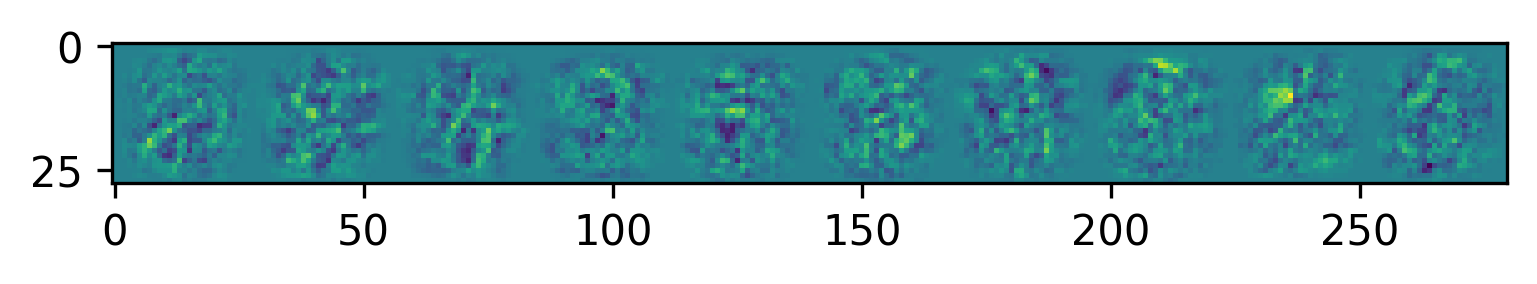

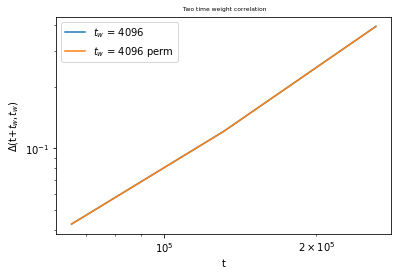

In [90]:
Nv = D.shape[0]
Nh = 800
plt.figure(dpi=150)
perm = True

ttw = 4096

alls = []
allsp = []
epw = int(ttw)


            
W_tw = torch.tensor(f['W'+str(epw)])
print('W(tw)')
plt.figure(dpi=300)
plt.imshow(transf(W_tw[10:20,:]))
plt.show()

W_tw = np.array(W_tw) #W(tw)

alltime = [ttw + 2**(16),ttw + 2**(17),ttw + 2**(18)]
allt = []
            
for t in alltime: #t=t+tw
    ep = int(t) # epoch to which retrieve the RBM

    if not(('W'+str(ep)) in f): # check for last time
        break
        
    Wt = torch.tensor(f['W'+str(ep)]) 
    
    print('W(t+tw)')
    plt.figure(dpi=300)
    plt.imshow(transf(Wt[10:20,:]))
    plt.show()
    
    Wt = np.array(Wt) #W(t+tw)

    W = PermMatrix(W_tw,Wt) 
    
    print('W(t+tw) permutada')
    plt.figure(dpi=300)
    plt.imshow(transf(W[10:20,:]))
    plt.show()

 
    W = np.array(W)
    ccp = (W-W_tw)**2 #permutada

    cc = (Wt-W_tw)**2 #sin permutar


    alls.append(np.sum(cc)/(Nh*Nv))
    allsp.append(np.sum(ccp)/(Nh*Nv))
    allt.append(ep-ttw)

        
allt = np.array(allt)

plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
plt.loglog(np.array(allt),allsp,label='$t_w$ = {} perm'.format(ttw))
    
plt.legend()
plt.title(' Two time weight correlation', fontsize = 6)
plt.xlabel('t')
plt.ylabel('$\Delta$(t+$t_w$,$t_w$)')
plt.show()
        

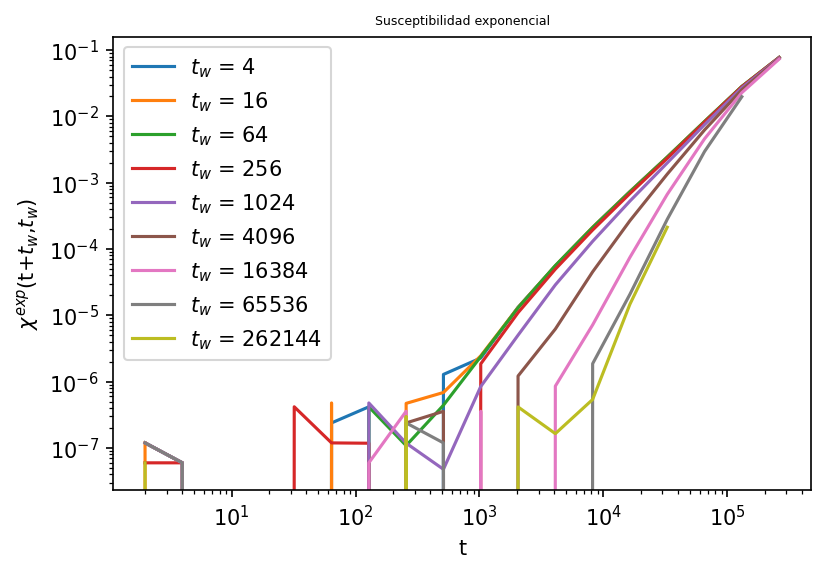

In [73]:
plt.figure(dpi=150)
filename = 'files/RDM_n800_b100_l01_k10_e3k.h5'

f = h5py.File(filename,'r')

Nh=800
Nv=784
timew = []

for n in range (1,30):
    tw = 2**(2*n) #para coger un medio de los tw
    timew.append(tw)    
    
timew = np.array(list(set(timew)))
timew = np.sort(timew)  

for ttw in timew:
    alls = []
    epw = int(ttw)
    
    if not(('W'+str(epw)) in f): # check for last time
        break    
            
    W_tw = torch.tensor(f['W'+str(epw)]) 
    W_tw = np.array(W_tw) #W(tw)
    
    alltime = []
    allt = []
            
    for m in range (1,30):
        tt = ttw + 2**m
        alltime.append(tt) 
                
    alltime = np.array(list(set(alltime)))
    alltime = np.sort(alltime)
    
    for t in alltime: #t=t+tw
        ep = int(t) # epoch to which retrieve the RBM

        if not(('W'+str(ep)) in f): # check for last time
            break
        
        Wt = torch.tensor(f['W'+str(ep)]) 
        Wt = np.array(Wt) #W(t+tw)
        W = Wt
 
        c = np.exp(-(W-W_tw)**2) #c_{ia}
        xi = np.mean(c**2)-np.mean(c)**2

        alls.append(xi)
        allt.append(ep-ttw)
        
    allt = np.array(allt)

    plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
    
plt.legend()
plt.title('Susceptibilidad exponencial', fontsize = 6)
plt.xlabel('t')
plt.ylabel('$\chi^{exp}$(t+$t_w$,$t_w$)')
plt.show()

-  Quizas no está permutando correctamente por estar usando minibatches. Si hago el tamaño del batch del número de hidden nodes cambia algo?

In [1]:
import torch
import numpy as np
import torchvision.datasets as datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import h5py
import rbm
from plyer import notification
from scipy.optimize import linear_sum_assignment


In [2]:
Ns = 10000
device = 'cpu'
mnist_trainset = datasets.MNIST('dataset/', train=True, download=True)
D = mnist_trainset.data[:Ns,:,:].reshape(Ns,28*28).float().to(device) / 255.0
D = (D > 0.3) * 1.0
D = D.t()
time = [0,1,2]
for n in range (1,40):
    for m in range (1,40):
        t = 2**n + 2**m
        time.append(t)

time = np.array(list(set(time)))
time = np.sort(time)


In [8]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 100
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 5000
T = 0

filename = 'files/RDM_n800_b150_l01_k10_e5k.h5'
f = h5py.File(filename,'w') #w - escribir
f.create_dataset('alltime',data=time)
f.close()

myRBM_RDM = rbm.RBM(n_vis,n_hid,dtype,batch_size,time,rdm,regu,T,filename,lr,gibbs_steps,epoch_max)

In [9]:
myRBM_RDM.SetVisBias(D)

myRBM_RDM.train(D)

It =  0 loss tensor(18.3333)
It =  1 loss tensor(9.1812)
It =  2 loss tensor(6.0959)
It =  3 loss tensor(4.5741)
It =  4 loss tensor(3.6565)
It =  5 loss tensor(3.0477)
It =  6 loss tensor(2.6115)
It =  7 loss tensor(2.2835)
It =  8 loss tensor(2.0314)
It =  9 loss tensor(1.8329)
It =  10 loss tensor(1.6629)
It =  11 loss tensor(1.5200)
It =  12 loss tensor(1.4072)
It =  13 loss tensor(1.3071)
It =  14 loss tensor(1.2205)
It =  15 loss tensor(1.1433)
It =  16 loss tensor(1.0761)
It =  17 loss tensor(1.0146)
It =  18 loss tensor(0.9620)
It =  19 loss tensor(0.9165)
It =  20 loss tensor(0.8692)
It =  21 loss tensor(0.8303)
It =  22 loss tensor(0.7937)
It =  23 loss tensor(0.7625)
It =  24 loss tensor(0.7317)
It =  25 loss tensor(0.7029)
It =  26 loss tensor(0.6775)
It =  27 loss tensor(0.6531)
It =  28 loss tensor(0.6312)
It =  29 loss tensor(0.6089)
It =  30 loss tensor(0.5905)
It =  31 loss tensor(0.5715)
It =  32 loss tensor(0.5537)
It =  33 loss tensor(0.5380)
It =  34 loss tensor(0.

It =  277 loss tensor(0.0658)
It =  278 loss tensor(0.0656)
It =  279 loss tensor(0.0654)
It =  280 loss tensor(0.0653)
It =  281 loss tensor(0.0648)
It =  282 loss tensor(0.0646)
It =  283 loss tensor(0.0646)
It =  284 loss tensor(0.0644)
It =  285 loss tensor(0.0641)
It =  286 loss tensor(0.0639)
It =  287 loss tensor(0.0636)
It =  288 loss tensor(0.0633)
It =  289 loss tensor(0.0635)
It =  290 loss tensor(0.0630)
It =  291 loss tensor(0.0627)
It =  292 loss tensor(0.0623)
It =  293 loss tensor(0.0621)
It =  294 loss tensor(0.0624)
It =  295 loss tensor(0.0621)
It =  296 loss tensor(0.0616)
It =  297 loss tensor(0.0616)
It =  298 loss tensor(0.0613)
It =  299 loss tensor(0.0612)
It =  300 loss tensor(0.0609)
It =  301 loss tensor(0.0607)
It =  302 loss tensor(0.0606)
It =  303 loss tensor(0.0601)
It =  304 loss tensor(0.0600)
It =  305 loss tensor(0.0599)
It =  306 loss tensor(0.0596)
It =  307 loss tensor(0.0595)
It =  308 loss tensor(0.0593)
It =  309 loss tensor(0.0591)
It =  310 

It =  551 loss tensor(0.0333)
It =  552 loss tensor(0.0332)
It =  553 loss tensor(0.0332)
It =  554 loss tensor(0.0331)
It =  555 loss tensor(0.0329)
It =  556 loss tensor(0.0330)
It =  557 loss tensor(0.0329)
It =  558 loss tensor(0.0328)
It =  559 loss tensor(0.0327)
It =  560 loss tensor(0.0328)
It =  561 loss tensor(0.0327)
It =  562 loss tensor(0.0326)
It =  563 loss tensor(0.0326)
It =  564 loss tensor(0.0324)
It =  565 loss tensor(0.0324)
It =  566 loss tensor(0.0323)
It =  567 loss tensor(0.0323)
It =  568 loss tensor(0.0323)
It =  569 loss tensor(0.0322)
It =  570 loss tensor(0.0321)
It =  571 loss tensor(0.0321)
It =  572 loss tensor(0.0320)
It =  573 loss tensor(0.0320)
It =  574 loss tensor(0.0319)
It =  575 loss tensor(0.0318)
It =  576 loss tensor(0.0318)
It =  577 loss tensor(0.0317)
It =  578 loss tensor(0.0316)
It =  579 loss tensor(0.0316)
It =  580 loss tensor(0.0315)
It =  581 loss tensor(0.0315)
It =  582 loss tensor(0.0314)
It =  583 loss tensor(0.0315)
It =  584 

It =  825 loss tensor(0.0222)
It =  826 loss tensor(0.0221)
It =  827 loss tensor(0.0222)
It =  828 loss tensor(0.0221)
It =  829 loss tensor(0.0221)
It =  830 loss tensor(0.0221)
It =  831 loss tensor(0.0221)
It =  832 loss tensor(0.0221)
It =  833 loss tensor(0.0220)
It =  834 loss tensor(0.0220)
It =  835 loss tensor(0.0219)
It =  836 loss tensor(0.0219)
It =  837 loss tensor(0.0218)
It =  838 loss tensor(0.0219)
It =  839 loss tensor(0.0218)
It =  840 loss tensor(0.0218)
It =  841 loss tensor(0.0218)
It =  842 loss tensor(0.0217)
It =  843 loss tensor(0.0218)
It =  844 loss tensor(0.0218)
It =  845 loss tensor(0.0217)
It =  846 loss tensor(0.0217)
It =  847 loss tensor(0.0216)
It =  848 loss tensor(0.0216)
It =  849 loss tensor(0.0216)
It =  850 loss tensor(0.0215)
It =  851 loss tensor(0.0216)
It =  852 loss tensor(0.0215)
It =  853 loss tensor(0.0215)
It =  854 loss tensor(0.0214)
It =  855 loss tensor(0.0214)
It =  856 loss tensor(0.0214)
It =  857 loss tensor(0.0214)
It =  858 

It =  1095 loss tensor(0.0167)
It =  1096 loss tensor(0.0167)
It =  1097 loss tensor(0.0167)
It =  1098 loss tensor(0.0167)
It =  1099 loss tensor(0.0167)
It =  1100 loss tensor(0.0167)
It =  1101 loss tensor(0.0167)
It =  1102 loss tensor(0.0166)
It =  1103 loss tensor(0.0166)
It =  1104 loss tensor(0.0166)
It =  1105 loss tensor(0.0166)
It =  1106 loss tensor(0.0166)
It =  1107 loss tensor(0.0166)
It =  1108 loss tensor(0.0165)
It =  1109 loss tensor(0.0166)
It =  1110 loss tensor(0.0165)
It =  1111 loss tensor(0.0165)
It =  1112 loss tensor(0.0165)
It =  1113 loss tensor(0.0165)
It =  1114 loss tensor(0.0165)
It =  1115 loss tensor(0.0165)
It =  1116 loss tensor(0.0165)
It =  1117 loss tensor(0.0165)
It =  1118 loss tensor(0.0164)
It =  1119 loss tensor(0.0164)
It =  1120 loss tensor(0.0164)
It =  1121 loss tensor(0.0163)
It =  1122 loss tensor(0.0163)
It =  1123 loss tensor(0.0163)
It =  1124 loss tensor(0.0163)
It =  1125 loss tensor(0.0163)
It =  1126 loss tensor(0.0163)
It =  11

It =  1360 loss tensor(0.0135)
It =  1361 loss tensor(0.0135)
It =  1362 loss tensor(0.0135)
It =  1363 loss tensor(0.0134)
It =  1364 loss tensor(0.0134)
It =  1365 loss tensor(0.0135)
It =  1366 loss tensor(0.0134)
It =  1367 loss tensor(0.0134)
It =  1368 loss tensor(0.0134)
It =  1369 loss tensor(0.0134)
It =  1370 loss tensor(0.0134)
It =  1371 loss tensor(0.0134)
It =  1372 loss tensor(0.0133)
It =  1373 loss tensor(0.0134)
It =  1374 loss tensor(0.0133)
It =  1375 loss tensor(0.0133)
It =  1376 loss tensor(0.0133)
It =  1377 loss tensor(0.0133)
It =  1378 loss tensor(0.0133)
It =  1379 loss tensor(0.0133)
It =  1380 loss tensor(0.0133)
It =  1381 loss tensor(0.0133)
It =  1382 loss tensor(0.0132)
It =  1383 loss tensor(0.0133)
It =  1384 loss tensor(0.0132)
It =  1385 loss tensor(0.0132)
It =  1386 loss tensor(0.0132)
It =  1387 loss tensor(0.0132)
It =  1388 loss tensor(0.0132)
It =  1389 loss tensor(0.0132)
It =  1390 loss tensor(0.0132)
It =  1391 loss tensor(0.0132)
It =  13

It =  1625 loss tensor(0.0113)
It =  1626 loss tensor(0.0113)
It =  1627 loss tensor(0.0113)
It =  1628 loss tensor(0.0113)
It =  1629 loss tensor(0.0113)
It =  1630 loss tensor(0.0113)
It =  1631 loss tensor(0.0113)
It =  1632 loss tensor(0.0113)
It =  1633 loss tensor(0.0113)
It =  1634 loss tensor(0.0112)
It =  1635 loss tensor(0.0112)
It =  1636 loss tensor(0.0112)
It =  1637 loss tensor(0.0112)
It =  1638 loss tensor(0.0112)
It =  1639 loss tensor(0.0112)
It =  1640 loss tensor(0.0112)
It =  1641 loss tensor(0.0112)
It =  1642 loss tensor(0.0112)
It =  1643 loss tensor(0.0112)
It =  1644 loss tensor(0.0112)
It =  1645 loss tensor(0.0112)
It =  1646 loss tensor(0.0111)
It =  1647 loss tensor(0.0111)
It =  1648 loss tensor(0.0112)
It =  1649 loss tensor(0.0111)
It =  1650 loss tensor(0.0111)
It =  1651 loss tensor(0.0111)
It =  1652 loss tensor(0.0111)
It =  1653 loss tensor(0.0111)
It =  1654 loss tensor(0.0111)
It =  1655 loss tensor(0.0111)
It =  1656 loss tensor(0.0111)
It =  16

It =  1890 loss tensor(0.0097)
It =  1891 loss tensor(0.0097)
It =  1892 loss tensor(0.0097)
It =  1893 loss tensor(0.0097)
It =  1894 loss tensor(0.0097)
It =  1895 loss tensor(0.0097)
It =  1896 loss tensor(0.0097)
It =  1897 loss tensor(0.0097)
It =  1898 loss tensor(0.0097)
It =  1899 loss tensor(0.0097)
It =  1900 loss tensor(0.0097)
It =  1901 loss tensor(0.0097)
It =  1902 loss tensor(0.0097)
It =  1903 loss tensor(0.0096)
It =  1904 loss tensor(0.0096)
It =  1905 loss tensor(0.0096)
It =  1906 loss tensor(0.0096)
It =  1907 loss tensor(0.0096)
It =  1908 loss tensor(0.0096)
It =  1909 loss tensor(0.0096)
It =  1910 loss tensor(0.0096)
It =  1911 loss tensor(0.0096)
It =  1912 loss tensor(0.0096)
It =  1913 loss tensor(0.0096)
It =  1914 loss tensor(0.0096)
It =  1915 loss tensor(0.0096)
It =  1916 loss tensor(0.0096)
It =  1917 loss tensor(0.0096)
It =  1918 loss tensor(0.0096)
It =  1919 loss tensor(0.0096)
It =  1920 loss tensor(0.0095)
It =  1921 loss tensor(0.0095)
It =  19

It =  2155 loss tensor(0.0085)
It =  2156 loss tensor(0.0085)
It =  2157 loss tensor(0.0085)
It =  2158 loss tensor(0.0085)
It =  2159 loss tensor(0.0085)
It =  2160 loss tensor(0.0085)
It =  2161 loss tensor(0.0085)
It =  2162 loss tensor(0.0085)
It =  2163 loss tensor(0.0085)
It =  2164 loss tensor(0.0085)
It =  2165 loss tensor(0.0085)
It =  2166 loss tensor(0.0085)
It =  2167 loss tensor(0.0085)
It =  2168 loss tensor(0.0085)
It =  2169 loss tensor(0.0085)
It =  2170 loss tensor(0.0084)
It =  2171 loss tensor(0.0085)
It =  2172 loss tensor(0.0085)
It =  2173 loss tensor(0.0085)
It =  2174 loss tensor(0.0085)
It =  2175 loss tensor(0.0085)
It =  2176 loss tensor(0.0084)
It =  2177 loss tensor(0.0084)
It =  2178 loss tensor(0.0084)
It =  2179 loss tensor(0.0085)
It =  2180 loss tensor(0.0084)
It =  2181 loss tensor(0.0084)
It =  2182 loss tensor(0.0085)
It =  2183 loss tensor(0.0084)
It =  2184 loss tensor(0.0084)
It =  2185 loss tensor(0.0084)
It =  2186 loss tensor(0.0084)
It =  21

It =  2420 loss tensor(0.0076)
It =  2421 loss tensor(0.0076)
It =  2422 loss tensor(0.0076)
It =  2423 loss tensor(0.0076)
It =  2424 loss tensor(0.0076)
It =  2425 loss tensor(0.0076)
It =  2426 loss tensor(0.0076)
It =  2427 loss tensor(0.0076)
It =  2428 loss tensor(0.0076)
It =  2429 loss tensor(0.0076)
It =  2430 loss tensor(0.0076)
It =  2431 loss tensor(0.0076)
It =  2432 loss tensor(0.0076)
It =  2433 loss tensor(0.0076)
It =  2434 loss tensor(0.0076)
It =  2435 loss tensor(0.0075)
It =  2436 loss tensor(0.0075)
It =  2437 loss tensor(0.0075)
It =  2438 loss tensor(0.0075)
It =  2439 loss tensor(0.0075)
It =  2440 loss tensor(0.0075)
It =  2441 loss tensor(0.0075)
It =  2442 loss tensor(0.0075)
It =  2443 loss tensor(0.0075)
It =  2444 loss tensor(0.0075)
It =  2445 loss tensor(0.0075)
It =  2446 loss tensor(0.0075)
It =  2447 loss tensor(0.0075)
It =  2448 loss tensor(0.0075)
It =  2449 loss tensor(0.0075)
It =  2450 loss tensor(0.0075)
It =  2451 loss tensor(0.0075)
It =  24

It =  2685 loss tensor(0.0068)
It =  2686 loss tensor(0.0068)
It =  2687 loss tensor(0.0068)
It =  2688 loss tensor(0.0068)
It =  2689 loss tensor(0.0068)
It =  2690 loss tensor(0.0068)
It =  2691 loss tensor(0.0068)
It =  2692 loss tensor(0.0068)
It =  2693 loss tensor(0.0069)
It =  2694 loss tensor(0.0068)
It =  2695 loss tensor(0.0068)
It =  2696 loss tensor(0.0068)
It =  2697 loss tensor(0.0068)
It =  2698 loss tensor(0.0068)
It =  2699 loss tensor(0.0068)
It =  2700 loss tensor(0.0068)
It =  2701 loss tensor(0.0068)
It =  2702 loss tensor(0.0068)
It =  2703 loss tensor(0.0068)
It =  2704 loss tensor(0.0068)
It =  2705 loss tensor(0.0068)
It =  2706 loss tensor(0.0068)
It =  2707 loss tensor(0.0068)
It =  2708 loss tensor(0.0068)
It =  2709 loss tensor(0.0068)
It =  2710 loss tensor(0.0068)
It =  2711 loss tensor(0.0068)
It =  2712 loss tensor(0.0068)
It =  2713 loss tensor(0.0068)
It =  2714 loss tensor(0.0068)
It =  2715 loss tensor(0.0068)
It =  2716 loss tensor(0.0068)
It =  27

It =  2950 loss tensor(0.0062)
It =  2951 loss tensor(0.0062)
It =  2952 loss tensor(0.0062)
It =  2953 loss tensor(0.0062)
It =  2954 loss tensor(0.0062)
It =  2955 loss tensor(0.0062)
It =  2956 loss tensor(0.0062)
It =  2957 loss tensor(0.0062)
It =  2958 loss tensor(0.0062)
It =  2959 loss tensor(0.0062)
It =  2960 loss tensor(0.0062)
It =  2961 loss tensor(0.0062)
It =  2962 loss tensor(0.0062)
It =  2963 loss tensor(0.0062)
It =  2964 loss tensor(0.0062)
It =  2965 loss tensor(0.0062)
It =  2966 loss tensor(0.0062)
It =  2967 loss tensor(0.0062)
It =  2968 loss tensor(0.0062)
It =  2969 loss tensor(0.0062)
It =  2970 loss tensor(0.0062)
It =  2971 loss tensor(0.0062)
It =  2972 loss tensor(0.0062)
It =  2973 loss tensor(0.0062)
It =  2974 loss tensor(0.0062)
It =  2975 loss tensor(0.0062)
It =  2976 loss tensor(0.0062)
It =  2977 loss tensor(0.0062)
It =  2978 loss tensor(0.0062)
It =  2979 loss tensor(0.0061)
It =  2980 loss tensor(0.0062)
It =  2981 loss tensor(0.0062)
It =  29

It =  3215 loss tensor(0.0057)
It =  3216 loss tensor(0.0057)
It =  3217 loss tensor(0.0057)
It =  3218 loss tensor(0.0057)
It =  3219 loss tensor(0.0057)
It =  3220 loss tensor(0.0057)
It =  3221 loss tensor(0.0057)
It =  3222 loss tensor(0.0057)
It =  3223 loss tensor(0.0057)
It =  3224 loss tensor(0.0057)
It =  3225 loss tensor(0.0057)
It =  3226 loss tensor(0.0057)
It =  3227 loss tensor(0.0057)
It =  3228 loss tensor(0.0057)
It =  3229 loss tensor(0.0057)
It =  3230 loss tensor(0.0057)
It =  3231 loss tensor(0.0057)
It =  3232 loss tensor(0.0057)
It =  3233 loss tensor(0.0057)
It =  3234 loss tensor(0.0057)
It =  3235 loss tensor(0.0057)
It =  3236 loss tensor(0.0057)
It =  3237 loss tensor(0.0057)
It =  3238 loss tensor(0.0057)
It =  3239 loss tensor(0.0057)
It =  3240 loss tensor(0.0057)
It =  3241 loss tensor(0.0057)
It =  3242 loss tensor(0.0057)
It =  3243 loss tensor(0.0057)
It =  3244 loss tensor(0.0057)
It =  3245 loss tensor(0.0057)
It =  3246 loss tensor(0.0056)
It =  32

It =  3480 loss tensor(0.0053)
It =  3481 loss tensor(0.0053)
It =  3482 loss tensor(0.0053)
It =  3483 loss tensor(0.0053)
It =  3484 loss tensor(0.0053)
It =  3485 loss tensor(0.0053)
It =  3486 loss tensor(0.0053)
It =  3487 loss tensor(0.0053)
It =  3488 loss tensor(0.0053)
It =  3489 loss tensor(0.0053)
It =  3490 loss tensor(0.0053)
It =  3491 loss tensor(0.0053)
It =  3492 loss tensor(0.0053)
It =  3493 loss tensor(0.0053)
It =  3494 loss tensor(0.0053)
It =  3495 loss tensor(0.0052)
It =  3496 loss tensor(0.0053)
It =  3497 loss tensor(0.0053)
It =  3498 loss tensor(0.0052)
It =  3499 loss tensor(0.0053)
It =  3500 loss tensor(0.0053)
It =  3501 loss tensor(0.0052)
It =  3502 loss tensor(0.0052)
It =  3503 loss tensor(0.0053)
It =  3504 loss tensor(0.0053)
It =  3505 loss tensor(0.0053)
It =  3506 loss tensor(0.0052)
It =  3507 loss tensor(0.0052)
It =  3508 loss tensor(0.0052)
It =  3509 loss tensor(0.0052)
It =  3510 loss tensor(0.0052)
It =  3511 loss tensor(0.0052)
It =  35

It =  3745 loss tensor(0.0049)
It =  3746 loss tensor(0.0049)
It =  3747 loss tensor(0.0049)
It =  3748 loss tensor(0.0049)
It =  3749 loss tensor(0.0049)
It =  3750 loss tensor(0.0049)
It =  3751 loss tensor(0.0049)
It =  3752 loss tensor(0.0049)
It =  3753 loss tensor(0.0049)
It =  3754 loss tensor(0.0049)
It =  3755 loss tensor(0.0049)
It =  3756 loss tensor(0.0049)
It =  3757 loss tensor(0.0049)
It =  3758 loss tensor(0.0049)
It =  3759 loss tensor(0.0049)
It =  3760 loss tensor(0.0049)
It =  3761 loss tensor(0.0049)
It =  3762 loss tensor(0.0049)
It =  3763 loss tensor(0.0049)
It =  3764 loss tensor(0.0049)
It =  3765 loss tensor(0.0049)
It =  3766 loss tensor(0.0049)
It =  3767 loss tensor(0.0049)
It =  3768 loss tensor(0.0049)
It =  3769 loss tensor(0.0049)
It =  3770 loss tensor(0.0049)
It =  3771 loss tensor(0.0049)
It =  3772 loss tensor(0.0049)
It =  3773 loss tensor(0.0049)
It =  3774 loss tensor(0.0049)
It =  3775 loss tensor(0.0049)
It =  3776 loss tensor(0.0049)
It =  37

It =  4010 loss tensor(0.0046)
It =  4011 loss tensor(0.0046)
It =  4012 loss tensor(0.0046)
It =  4013 loss tensor(0.0046)
It =  4014 loss tensor(0.0046)
It =  4015 loss tensor(0.0046)
It =  4016 loss tensor(0.0046)
It =  4017 loss tensor(0.0046)
It =  4018 loss tensor(0.0046)
It =  4019 loss tensor(0.0046)
It =  4020 loss tensor(0.0046)
It =  4021 loss tensor(0.0046)
It =  4022 loss tensor(0.0046)
It =  4023 loss tensor(0.0046)
It =  4024 loss tensor(0.0046)
It =  4025 loss tensor(0.0046)
It =  4026 loss tensor(0.0046)
It =  4027 loss tensor(0.0046)
It =  4028 loss tensor(0.0046)
It =  4029 loss tensor(0.0046)
It =  4030 loss tensor(0.0046)
It =  4031 loss tensor(0.0045)
It =  4032 loss tensor(0.0045)
It =  4033 loss tensor(0.0046)
It =  4034 loss tensor(0.0046)
It =  4035 loss tensor(0.0046)
It =  4036 loss tensor(0.0046)
It =  4037 loss tensor(0.0045)
It =  4038 loss tensor(0.0046)
It =  4039 loss tensor(0.0046)
It =  4040 loss tensor(0.0045)
It =  4041 loss tensor(0.0045)
It =  40

It =  4275 loss tensor(0.0043)
It =  4276 loss tensor(0.0043)
It =  4277 loss tensor(0.0043)
It =  4278 loss tensor(0.0043)
It =  4279 loss tensor(0.0043)
It =  4280 loss tensor(0.0043)
It =  4281 loss tensor(0.0043)
It =  4282 loss tensor(0.0043)
It =  4283 loss tensor(0.0043)
It =  4284 loss tensor(0.0043)
It =  4285 loss tensor(0.0043)
It =  4286 loss tensor(0.0043)
It =  4287 loss tensor(0.0043)
It =  4288 loss tensor(0.0043)
It =  4289 loss tensor(0.0043)
It =  4290 loss tensor(0.0043)
It =  4291 loss tensor(0.0043)
It =  4292 loss tensor(0.0043)
It =  4293 loss tensor(0.0043)
It =  4294 loss tensor(0.0043)
It =  4295 loss tensor(0.0043)
It =  4296 loss tensor(0.0043)
It =  4297 loss tensor(0.0043)
It =  4298 loss tensor(0.0043)
It =  4299 loss tensor(0.0043)
It =  4300 loss tensor(0.0043)
It =  4301 loss tensor(0.0043)
It =  4302 loss tensor(0.0043)
It =  4303 loss tensor(0.0043)
It =  4304 loss tensor(0.0043)
It =  4305 loss tensor(0.0043)
It =  4306 loss tensor(0.0043)
It =  43

KeyboardInterrupt: 

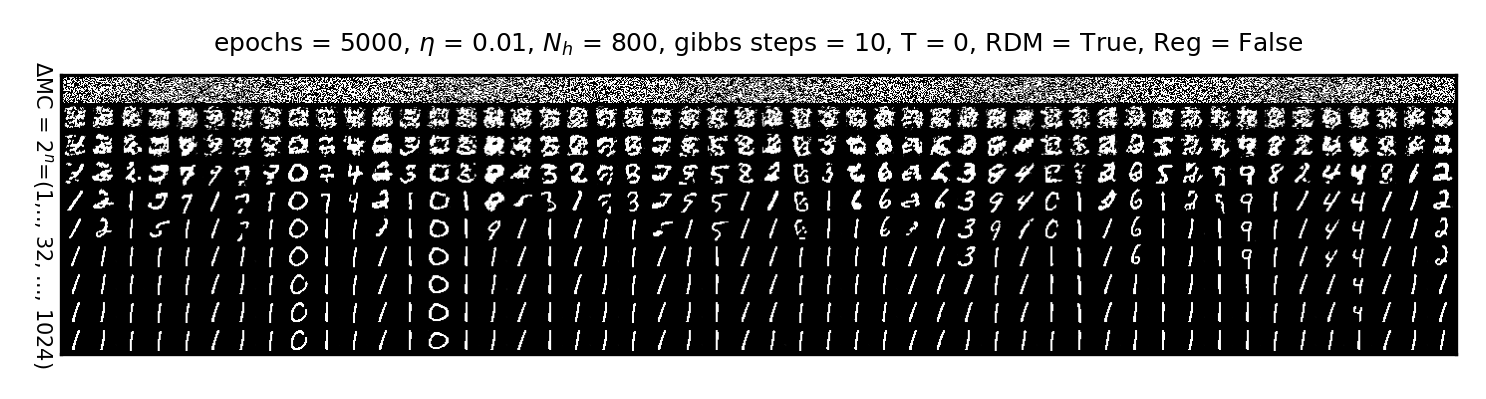

In [10]:
myRBM_RDM.PlotSampling(10)

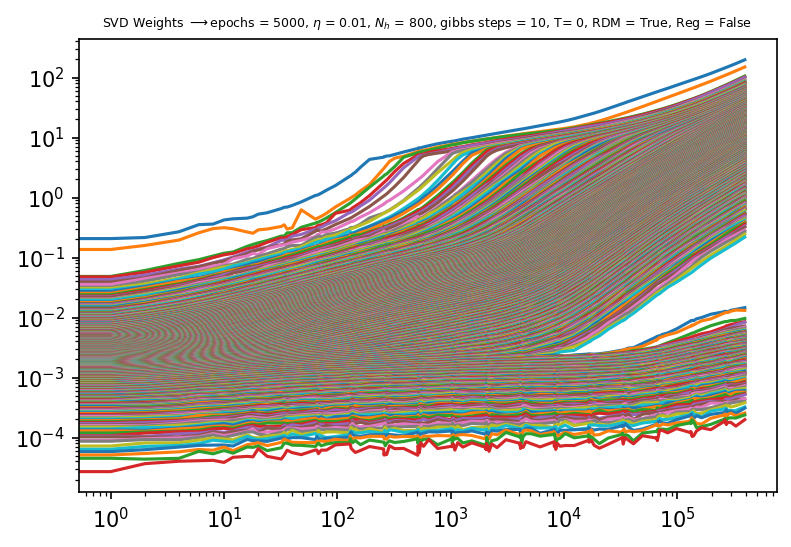

In [11]:
myRBM_RDM.PlotW()

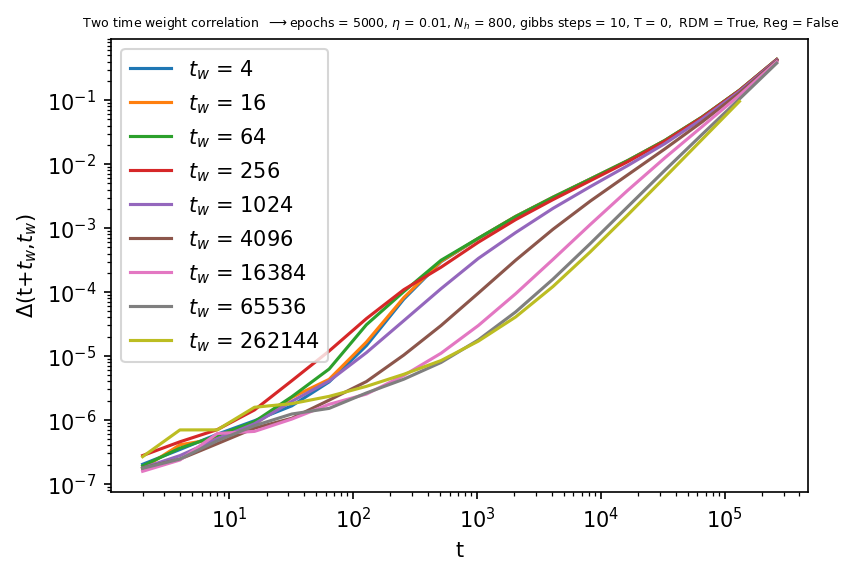

In [12]:
myRBM_RDM.PlotMSDW(False)

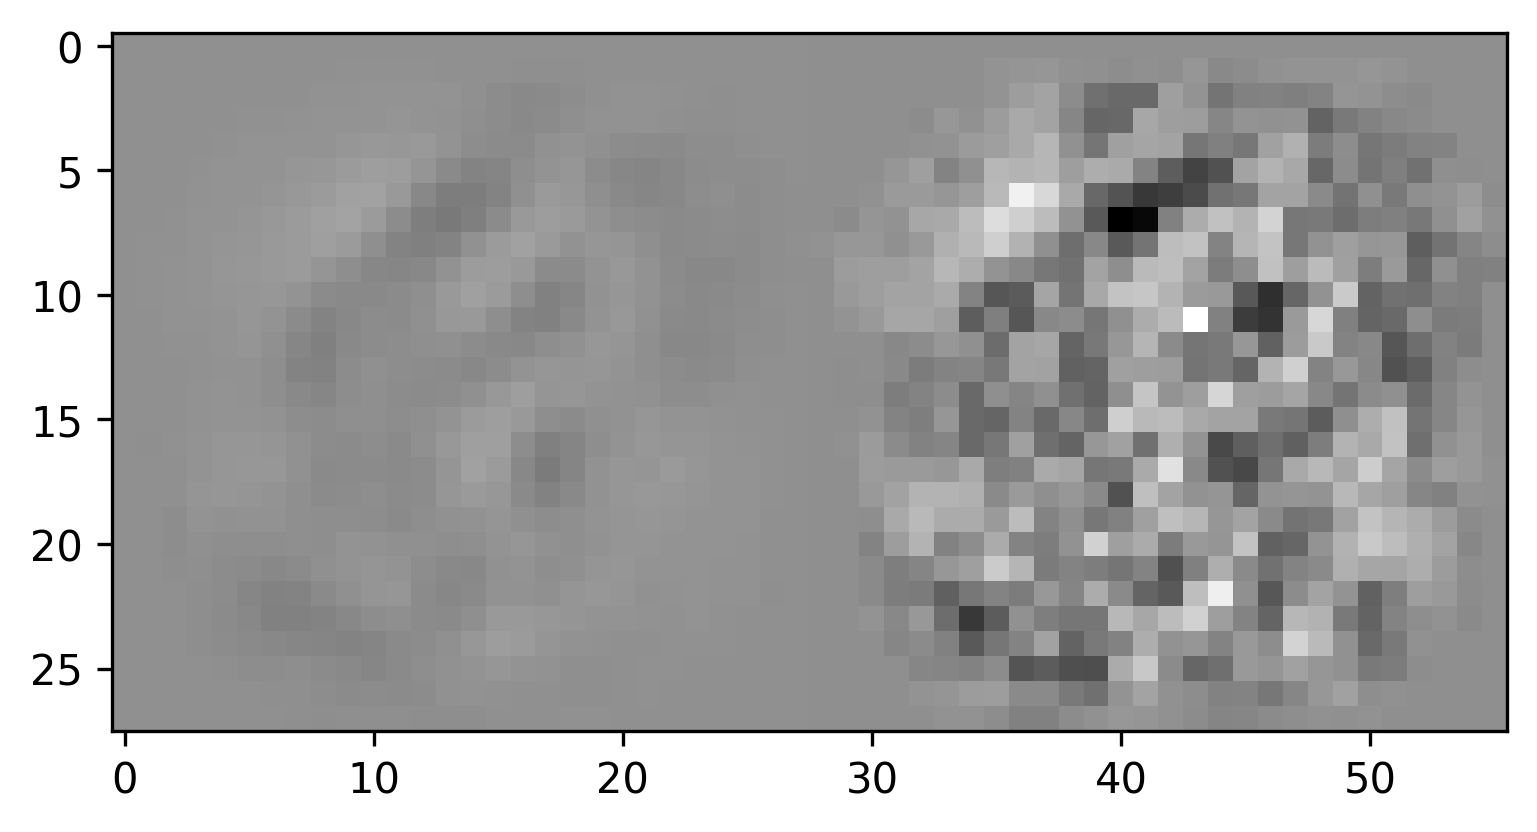

In [19]:
n_vis = D.shape[0]
n_hid = 800
dtype = torch.float
batch_size = 100
rdm = True
regu = False
lr = 0.01
gibbs_steps = 10
epoch_max = 5000
T = 0

filename = 'files/RDM_n800_b150_l01_k10_e5k.h5'
f = h5py.File(filename,'r')
 
plt.figure(dpi=300)
columnas = [1]
nc = len(columnas)
col = 10
time = [16384,16384+2**(18)]
allt = []
W = []
for t in time:
    ep = int(t) # epoch to which retrieve the RBM
    if not(('W'+str(ep)) in f): # check for last time
        break
    W_t = np.array(f['W'+str(t)])
    #Wtw = np.array(f['W'+str(time[0])])
    W.append(W_t[col,:])
    allt.append(t)
    

#r = ImConcat(torch.tensor(W),ncol=len(columnas),nrow=nr)
nr = int(np.shape(W)[0]/len(columnas)) #nrow - nro tiempos válidos    		
r = myRBM_RDM.ImConcat(torch.tensor(W),ncol=nc,nrow=nr)
#vmin = 0.00001
#vmax = 0.01

plt.imshow(r,cmap = 'gray')

W(tw)


<Figure size 900x600 with 0 Axes>

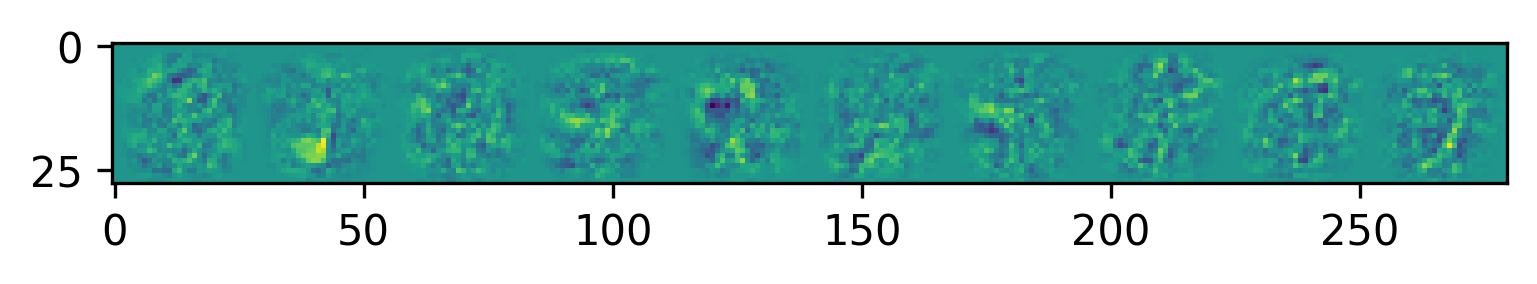

W(t+tw)


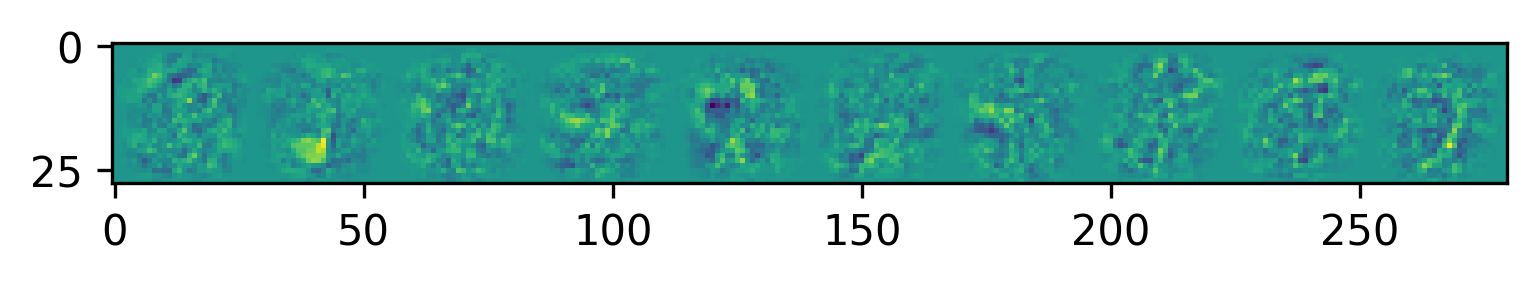

W(t+tw) permutada


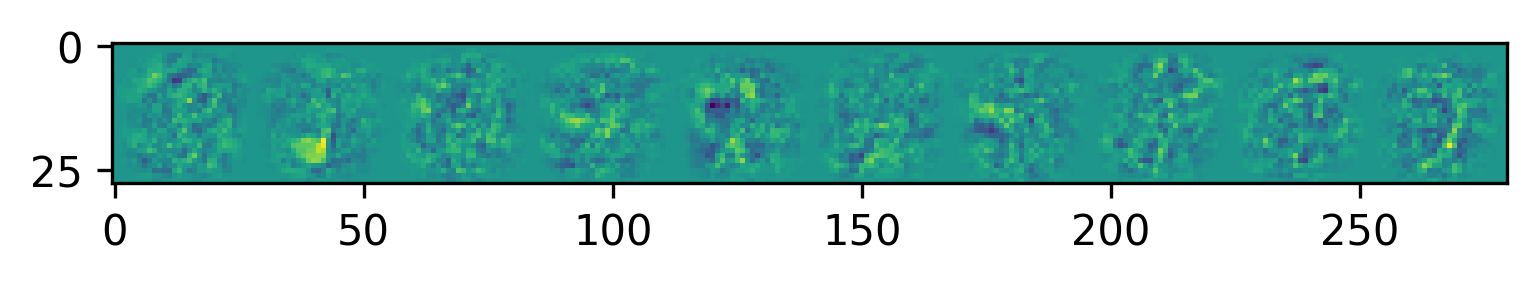

W(t+tw)


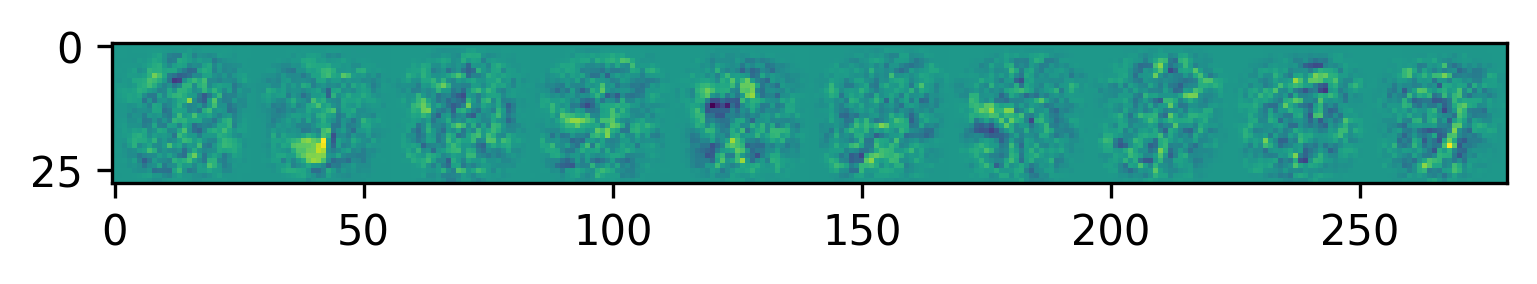

W(t+tw) permutada


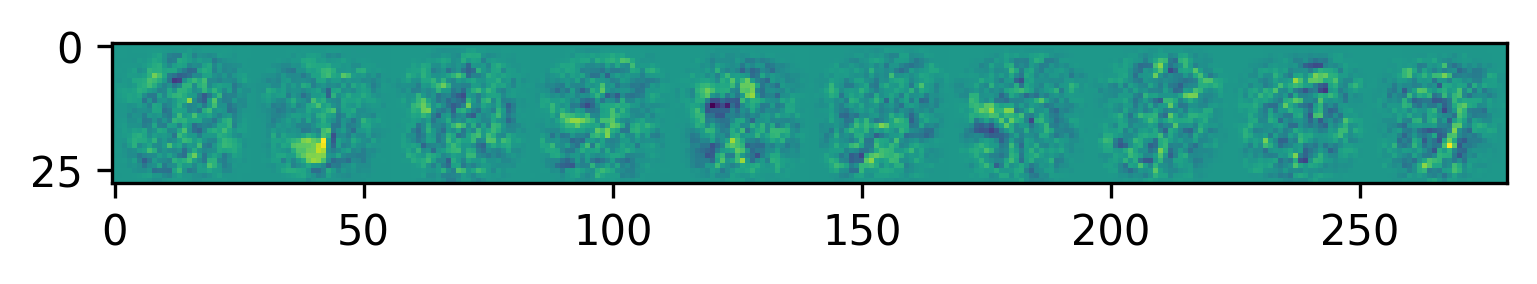

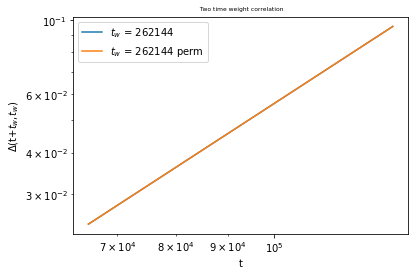

In [22]:
Nv = D.shape[0]
Nh = 800
plt.figure(dpi=150)
perm = True

ttw =  262144

alls = []
allsp = []
epw = int(ttw)


            
W_tw = torch.tensor(f['W'+str(epw)])
print('W(tw)')
plt.figure(dpi=300)
plt.imshow(transf(W_tw[10:20,:]))
plt.show()

W_tw = np.array(W_tw) #W(tw)

alltime = [ttw + 2**(16),ttw + 2**(17),ttw + 2**(18)]
allt = []
            
for t in alltime: #t=t+tw
    ep = int(t) # epoch to which retrieve the RBM

    if not(('W'+str(ep)) in f): # check for last time
        break
        
    Wt = torch.tensor(f['W'+str(ep)]) 
    
    print('W(t+tw)')
    plt.figure(dpi=300)
    plt.imshow(transf(Wt[10:20,:]))
    plt.show()
    
    Wt = np.array(Wt) #W(t+tw)

    W = PermMatrix(W_tw,Wt) 
    
    print('W(t+tw) permutada')
    plt.figure(dpi=300)
    plt.imshow(transf(W[10:20,:]))
    plt.show()

 
    W = np.array(W)
    ccp = (W-W_tw)**2 #permutada

    cc = (Wt-W_tw)**2 #sin permutar


    alls.append(np.sum(cc)/(Nh*Nv))
    allsp.append(np.sum(ccp)/(Nh*Nv))
    allt.append(ep-ttw)

        
allt = np.array(allt)

plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
plt.loglog(np.array(allt),allsp,label='$t_w$ = {} perm'.format(ttw))
    
plt.legend()
plt.title(' Two time weight correlation', fontsize = 6)
plt.xlabel('t')
plt.ylabel('$\Delta$(t+$t_w$,$t_w$)')
plt.show()
        

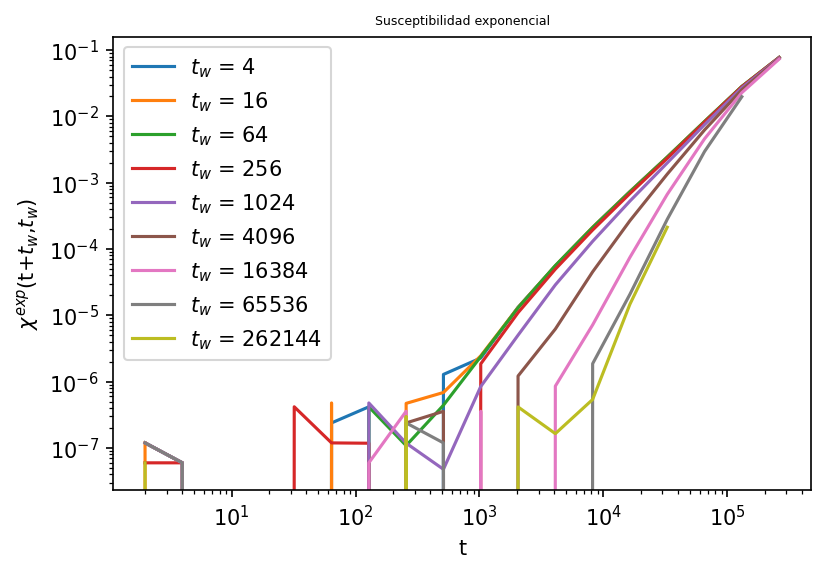

In [17]:
plt.figure(dpi=150)
filename = 'files/RDM_n800_b100_l01_k10_e3k.h5'

f = h5py.File(filename,'r')

Nh=800
Nv=784
timew = []

for n in range (1,30):
    tw = 2**(2*n) #para coger un medio de los tw
    timew.append(tw)    
    
timew = np.array(list(set(timew)))
timew = np.sort(timew)  

for ttw in timew:
    alls = []
    epw = int(ttw)
    
    if not(('W'+str(epw)) in f): # check for last time
        break    
            
    W_tw = torch.tensor(f['W'+str(epw)]) 
    W_tw = np.array(W_tw) #W(tw)
    
    alltime = []
    allt = []
            
    for m in range (1,30):
        tt = ttw + 2**m
        alltime.append(tt) 
                
    alltime = np.array(list(set(alltime)))
    alltime = np.sort(alltime)
    
    for t in alltime: #t=t+tw
        ep = int(t) # epoch to which retrieve the RBM

        if not(('W'+str(ep)) in f): # check for last time
            break
        
        Wt = torch.tensor(f['W'+str(ep)]) 
        Wt = np.array(Wt) #W(t+tw)
        W = Wt
 
        c = np.exp(-(W-W_tw)**2) #c_{ia}
        xi = np.mean(c**2)-np.mean(c)**2

        alls.append(xi)
        allt.append(ep-ttw)
        
    allt = np.array(allt)

    plt.loglog(np.array(allt),alls,label='$t_w$ = {}'.format(ttw))
    
plt.legend()
plt.title('Susceptibilidad exponencial', fontsize = 6)
plt.xlabel('t')
plt.ylabel('$\chi^{exp}$(t+$t_w$,$t_w$)')
plt.show()